In [131]:
import xgboost
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score

In [11]:
trainData = pd.read_csv('train_AUpWtIz/train.csv')

In [12]:
testData = pd.read_csv('test_QyjYwdj.csv')

In [724]:
mergedDataFull = pd.read_csv('CreatedMergedDataFull.csv')

In [738]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth',100)
pd.options.display.float_format = '{:.2f}'.format

In [739]:
mergedDataFull.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,active_days_num,start_date_day,start_date_month,start_date_year,start_date_weekDay,start_date_week,end_date_day,end_date_month,end_date_year,end_date_weekDay,end_date_week,brand_type_Established,brand_type_Local,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut),item_price,brand,coupon_item_count,num_categories,tot_item_id,tot_quantity,avg_item_price,last_active,tot_item_id_coupon,tot_quantity_coupon,avg_item_price_coupon,age_range,marital_status,rented,family_size,no_of_children,income_bracket,marital_status_null,no_of_children_null,no_of_adults,last_active_interval,customer_demographic_null,age_range_le,family_size_le,no_of_children_le,campaign_type_le,marital_status_le
0,1,13,27,1053,0.00,X,2013-05-19,2013-07-05,47,19,5,2013,6,20,5,7,2013,4,27,125.00,0.00,0,0.00,0.00,0,125.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,118.41,2.00,125,1,72661.00,192.00,159.03,2013-02-10,89.00,118.00,167.73,46-55,Single,0.00,1,0,5.00,1.00,1.00,1.00,98.00,0,3,0,0,0,1
1,2,13,116,48,0.00,X,2013-05-19,2013-07-05,47,19,5,2013,6,20,5,7,2013,4,27,0.00,3.00,0,0.00,0.00,0,3.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,70.89,1.00,3,1,12029.00,308.00,198.82,2013-02-10,168.00,224.00,116.80,36-45,Married,0.00,2,0,3.00,0.00,1.00,2.00,98.00,0,2,1,0,0,0
2,6,9,635,205,0.00,Y,2013-03-11,2013-04-12,32,11,3,2013,0,11,12,4,2013,4,15,67.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,67.00,0,0,0,0.00,0.00,0,0,345.10,1.00,67,1,1027.00,711.00,111.21,2013-02-15,464.00,687.00,117.14,46-55,Married,0.00,2,0,7.00,0.00,1.00,2.00,24.00,0,3,1,0,1,0
3,7,13,644,1050,0.00,X,2013-05-19,2013-07-05,47,19,5,2013,6,20,5,7,2013,4,27,4.00,0.00,0,0.00,0.00,0,4.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,93.15,1.00,4,1,266.00,207.00,99.80,2013-02-03,108.00,150.00,105.89,46-55,Single,0.00,2,0,5.00,1.00,1.00,2.00,105.00,1,3,1,0,0,1
4,9,8,1017,1489,0.00,X,2013-02-16,2013-04-05,48,16,2,2013,5,7,5,4,2013,4,14,32.00,0.00,0,0.00,0.00,0,32.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,201.15,1.00,32,1,111725.00,411.00,88.14,2013-02-11,216.00,381.00,82.47,46-55,Married,0.00,2,0,3.00,0.00,1.00,2.00,5.00,0,3,1,0,0,0


In [727]:
mergedDataFull.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status', 'campaign_type', 'start_date', 'end_date', 'active_days_num', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_weekDay', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_weekDay', 'end_date_week', 'brand_type_Established', 'brand_type_Local', 'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)', 'item_price', 'brand', 'coupon_item_count', 'num_categories', 'tot_item_id', 'tot_quantity', 'avg_item_price', 'last_active', 'tot_item_id_coupon', 'tot_quantity_coupon', 'avg_item_price_coupon', 'age_range', 'marita

In [732]:
mergedDataFullOneHot = mergedDataFull.drop(['age_range_le', 'family_size_le', 'no_of_children_le', 'campaign_type_le', 'marital_status_le', 
                                            'start_date', 'end_date', 'last_active'], axis = 1)

In [733]:
mergedDataFullOneHot = pd.get_dummies(mergedDataFullOneHot)

In [734]:
mergedDataFullOneHot.to_csv('mergedDataFullOneHot.csv')

In [740]:
mergedDataFullOneHot.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,active_days_num,start_date_day,start_date_month,start_date_year,start_date_weekDay,start_date_week,end_date_day,end_date_month,end_date_year,end_date_weekDay,end_date_week,brand_type_Established,brand_type_Local,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut),item_price,brand,coupon_item_count,num_categories,tot_item_id,tot_quantity,avg_item_price,tot_item_id_coupon,tot_quantity_coupon,avg_item_price_coupon,rented,no_of_children,income_bracket,marital_status_null,no_of_children_null,no_of_adults,last_active_interval,customer_demographic_null,campaign_type_X,campaign_type_Y,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5+
0,1,13,27,1053,0.00,47,19,5,2013,6,20,5,7,2013,4,27,125.00,0.00,0,0.00,0.00,0,125.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,118.41,2.00,125,1,72661.00,192.00,159.03,89.00,118.00,167.73,0.00,0,5.00,1.00,1.00,1.00,98.00,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0
1,2,13,116,48,0.00,47,19,5,2013,6,20,5,7,2013,4,27,0.00,3.00,0,0.00,0.00,0,3.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,70.89,1.00,3,1,12029.00,308.00,198.82,168.00,224.00,116.80,0.00,0,3.00,0.00,1.00,2.00,98.00,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
2,6,9,635,205,0.00,32,11,3,2013,0,11,12,4,2013,4,15,67.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,67.00,0,0,0,0.00,0.00,0,0,345.10,1.00,67,1,1027.00,711.00,111.21,464.00,687.00,117.14,0.00,0,7.00,0.00,1.00,2.00,24.00,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
3,7,13,644,1050,0.00,47,19,5,2013,6,20,5,7,2013,4,27,4.00,0.00,0,0.00,0.00,0,4.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,93.15,1.00,4,1,266.00,207.00,99.80,108.00,150.00,105.89,0.00,0,5.00,1.00,1.00,2.00,105.00,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,9,8,1017,1489,0.00,48,16,2,2013,5,7,5,4,2013,4,14,32.00,0.00,0,0.00,0.00,0,32.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,201.15,1.00,32,1,111725.00,411.00,88.14,216.00,381.00,82.47,0.00,0,3.00,0.00,1.00,2.00,5.00,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [735]:
mergedDataFullLe = mergedDataFull.drop(['age_range','family_size','no_of_children','marital_status','campaign_type',
                                       'start_date', 'end_date', 'last_active'], axis = 1)

In [736]:
mergedDataFullLe.to_csv('mergedDataFullLe.csv')

In [405]:
mergedDataFullLe.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,start_date,end_date,active_days_num,start_date_day,start_date_month,start_date_year,start_date_weekDay,start_date_week,end_date_day,end_date_month,end_date_year,end_date_weekDay,end_date_week,brand_type_Established,brand_type_Local,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut),item_price,brand,coupon_item_count,num_categories,tot_item_id,tot_quantity,avg_item_price,tot_item_id_coupon,tot_quantity_coupon,avg_item_price_coupon,rented,income_bracket,marital_status_null,no_of_children_null,no_of_adults,customer_demographic_null,age_range_le,family_size_le,no_of_children_le,campaign_type_le,marital_status_le
0,1,13,27,1053,0.0,2013-05-19,2013-07-05,47,19,5,2013,6,20,5,7,2013,4,27,125.0,0.0,0,0.0,0.0,0,125.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,118.409803,2.0,125,1,105551,310,164.254084,139,208,167.214874,0.0,5.0,1.0,1.0,1.0,0,3,0,0,0,1
1,2,13,116,48,0.0,2013-05-19,2013-07-05,47,19,5,2013,6,20,5,7,2013,4,27,0.0,3.0,0,0.0,0.0,0,3.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,70.885046,1.0,3,1,12143,385,190.743279,210,291,114.121783,0.0,3.0,0.0,1.0,2.0,0,2,1,0,0,0
2,6,9,635,205,0.0,2013-03-11,2013-04-12,32,11,3,2013,0,11,12,4,2013,4,15,67.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,67.0,0,0,0,0.0,0.0,0,0,345.102128,1.0,67,1,1351,970,113.786335,652,932,119.033674,0.0,7.0,0.0,1.0,2.0,0,3,1,0,1,0
3,7,13,644,1050,0.0,2013-05-19,2013-07-05,47,19,5,2013,6,20,5,7,2013,4,27,4.0,0.0,0,0.0,0.0,0,4.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,93.147403,1.0,4,1,306,237,101.084866,128,178,108.676452,0.0,5.0,1.0,1.0,2.0,1,3,1,0,0,1
4,9,8,1017,1489,0.0,2013-02-16,2013-04-05,48,16,2,2013,5,7,5,4,2013,4,14,32.0,0.0,0,0.0,0.0,0,32.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,201.153373,1.0,32,1,139063,562,85.417126,283,466,85.311708,0.0,3.0,0.0,1.0,2.0,0,3,1,0,0,0


In [624]:
trainLe = mergedDataFullLe.iloc[:trainData.shape[0],:]
testLe = mergedDataFullLe.iloc[trainData.shape[0]:,:]

In [329]:
trainLe.shape, testLe.shape

((78369, 57), (50226, 57))

In [10]:
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

In [16]:
xgb_clf.fit(trainLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1), 
              trainLe['redemption_status'])

[13:24:28] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=15
[13:24:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=15
[13:24:30] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=15
[13:24:30] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=16
[13:24:31] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 0 pruned nodes, max_depth=17
[13:24:32] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_d

[13:25:28] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 598 extra nodes, 0 pruned nodes, max_depth=30
[13:25:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 630 extra nodes, 0 pruned nodes, max_depth=23
[13:25:31] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 616 extra nodes, 0 pruned nodes, max_depth=20
[13:25:32] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 632 extra nodes, 0 pruned nodes, max_depth=21
[13:25:33] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 604 extra nodes, 0 pruned nodes, max_depth=22
[13:25:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 614 extra nodes, 0 pruned nodes, max_d

[13:26:43] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 0 pruned nodes, max_depth=26
[13:26:44] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 0 pruned nodes, max_depth=28
[13:26:46] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 0 pruned nodes, max_depth=30
[13:26:47] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 0 pruned nodes, max_depth=30
[13:26:48] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=23
[13:26:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 316 extra nodes, 0 pruned nodes, max_d

[13:27:44] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=17
[13:27:46] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=20
[13:27:47] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=22
[13:27:48] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=26
[13:27:49] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=21
[13:27:51] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_d

[13:28:45] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=19
[13:28:46] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=18
[13:28:48] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=25
[13:28:49] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=19
[13:28:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=19
[13:28:51] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_d

[13:29:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=23
[13:29:39] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=18
[13:29:40] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=17
[13:29:41] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=15
[13:29:42] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=17
[13:29:44] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_d

[13:30:32] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[13:30:33] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=17
[13:30:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=13
[13:30:36] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=15
[13:30:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=17
[13:30:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_d

[13:31:26] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=18
[13:31:27] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=20
[13:31:28] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=15
[13:31:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=16
[13:31:30] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=11
[13:31:31] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=1

[13:32:14] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=12
[13:32:15] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=15
[13:32:16] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=14
[13:32:17] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=10
[13:32:18] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=19
[13:32:19] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=1

[13:32:59] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=17
[13:33:00] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=13
[13:33:01] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[13:33:02] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=18
[13:33:03] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=9
[13:33:04] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=15

[13:33:42] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=15
[13:33:42] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=12
[13:33:43] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=11
[13:33:44] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=16
[13:33:45] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[13:33:45] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=1

[13:34:22] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=15
[13:34:23] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=15
[13:34:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=9
[13:34:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=10
[13:34:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=14
[13:34:26] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=13

[13:35:01] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=12
[13:35:02] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=15
[13:35:03] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=10
[13:35:04] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=12
[13:35:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=14
[13:35:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=1

[13:35:40] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=9
[13:35:40] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=13
[13:35:41] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=11
[13:35:42] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=11
[13:35:43] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=13
[13:35:43] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=10

[13:36:17] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=12
[13:36:17] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[13:36:18] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=10
[13:36:19] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=11
[13:36:19] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[13:36:20] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=8


[13:36:55] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=14
[13:36:56] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=13
[13:36:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=12
[13:36:58] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=10
[13:36:59] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=10
[13:36:59] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=1

[13:37:32] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=14
[13:37:33] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=11
[13:37:33] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=11
[13:37:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=8
[13:37:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=9
[13:37:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=7
[

[13:38:45] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=13
[13:38:47] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=11
[13:38:48] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=12
[13:38:50] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=13
[13:38:52] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=9
[13:38:54] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=11

[13:39:58] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=13
[13:39:59] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=11
[13:40:01] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[13:40:02] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=8
[13:40:03] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=11
[13:40:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=11

[13:41:02] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=9
[13:41:04] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=14
[13:41:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=9
[13:41:07] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=13
[13:41:08] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=11
[13:41:10] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[

[13:42:08] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=11
[13:42:09] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=11
[13:42:11] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=9
[13:42:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=9
[13:42:13] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[13:42:14] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=9
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

In [86]:
sorted(list(zip(xgb_clf.feature_importances_, trainLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1).columns)), 
      key=lambda x: x[0])

[(0.0, 'start_date_year'),
 (0.0, 'end_date_year'),
 (0.0, 'category_Flowers & Plants'),
 (0.0, 'category_Garden'),
 (0.0, 'category_Restauarant'),
 (0.0, 'category_Salads'),
 (0.0, 'category_Travel'),
 (0.0, 'category_Vegetables (cut)'),
 (0.0053372793, 'end_date_week'),
 (0.0074716136, 'item_id'),
 (0.008534011, 'end_date_month'),
 (0.008665305, 'start_date_week'),
 (0.011352965, 'category_Miscellaneous'),
 (0.0126755815, 'category_Prepared Food'),
 (0.0140133, 'id'),
 (0.0143483225, 'category_Packaged Meat'),
 (0.01474705, 'start_date_day'),
 (0.015160861, 'start_date_month'),
 (0.016985197, 'item_price_x'),
 (0.017317437, 'coupon_id'),
 (0.017342262, 'end_date_day'),
 (0.01862346, 'category_Seafood'),
 (0.019165017, 'marital_status_null'),
 (0.019726, 'item_price_y'),
 (0.020025374, 'marital_status_le'),
 (0.020098154, 'end_date_weekDay'),
 (0.021316728, 'family_size_le'),
 (0.021454591, 'customer_id'),
 (0.021480968, 'age_range_le'),
 (0.022316674, 'rented'),
 (0.022448618, 'activ

In [17]:
preds = xgb_clf.predict(testLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1))

In [625]:
finalTrainLeCvData = trainLe[(trainLe['campaign_id'].isin([11,12,13,27])) |
                                  (trainLe['coupon_id'].isin([i for i in range(100,150)]))]

partialTrainData = trainLe[(~trainLe['campaign_id'].isin([11,12,13,27])) &
                                  (~trainLe['coupon_id'].isin([i for i in range(100,150)]))]

In [336]:
partialTrainData.shape, finalTrainLeCvData.shape

((49309, 57), (29060, 57))

In [66]:
partialTrainData.isna().sum()

id                                 0
campaign_id                        0
coupon_id                          0
customer_id                        0
redemption_status                  0
start_date                         0
end_date                           0
active_days_num                    0
start_date_day                     0
start_date_month                   0
start_date_year                    0
start_date_weekDay                 0
start_date_week                    0
end_date_day                       0
end_date_month                     0
end_date_year                      0
end_date_weekDay                   0
end_date_week                      0
brand_type_Established             0
brand_type_Local                   0
category_Bakery                    0
category_Dairy, Juices & Snacks    0
category_Flowers & Plants          0
category_Garden                    0
category_Grocery                   0
category_Meat                      0
category_Miscellaneous             0
c

In [100]:
LogisticRegressionCV?

In [106]:
#best performer
params = {"Cs":[1,5,10]}
lr_clf = LogisticRegressionCV(scoring = "roc_auc", max_iter=1000, n_jobs=-1, class_weight="balanced", random_state=42,
                          verbose=2, refit=True)

In [160]:
partialTrainData['redemption_status'].value_counts()

0.0    48945
1.0      364
Name: redemption_status, dtype: int64

In [151]:
rbsFull = RobustScaler()
grd_lr_clf = GridSearchCV(lr_clf, params)
grd_lr_clf.fit(rbsFull.fit_transform(partialTrainData.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)),
                                     partialTrainData['redemption_status'])

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.4s finished
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegressionCV(Cs=10, class_weight='balanced',
                                            cv='warn', dual=False,
                                            fit_intercept=True,
                                            intercept_scaling=1.0,
                                            l1_ratios=None, max_iter=1000,
                                            multi_class='warn', n_jobs=-1,
                                            penalty='l2', random_state=42,
                                            refit=True, scoring='roc_auc',
                                            solver='lbfgs', tol=0.0001,
                                            verbose=2),
             iid='warn', n_jobs=None, param_grid={'Cs': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [154]:
rbsFull = RobustScaler()
grd_lr_clf = GridSearchCV(lr_clf, params)
grd_lr_clf.fit(rbsFull.fit_transform(trainLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)),
                                     trainLe['redemption_status'])

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.5s finished
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.2s finished
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegressionCV(Cs=10, class_weight='balanced',
                                            cv='warn', dual=False,
                                            fit_intercept=True,
                                            intercept_scaling=1.0,
                                            l1_ratios=None, max_iter=1000,
                                            multi_class='warn', n_jobs=-1,
                                            penalty='l2', random_state=42,
                                            refit=True, scoring='roc_auc',
                                            solver='lbfgs', tol=0.0001,
                                            verbose=2),
             iid='warn', n_jobs=None, param_grid={'Cs': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
rbsFull = RobustScaler()

In [155]:
grd_lr_clf.best_estimator_

LogisticRegressionCV(Cs=5, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=2)

In [94]:
list(zip(lr_clf.coef_[0], finalTrainLeCvData.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)))

[(2.0303311350400323e-06, 'id'),
 (-0.0002571135836163277, 'campaign_id'),
 (0.0010901343534085407, 'coupon_id'),
 (0.0003861164322673376, 'customer_id'),
 (3.477894494097713e-05, 'active_days_num'),
 (0.00017787270547012956, 'start_date_day'),
 (-0.0001240058688411458, 'start_date_month'),
 (-0.0015265620498272122, 'start_date_year'),
 (9.350377378930389e-05, 'start_date_weekDay'),
 (-0.0005198899874386476, 'start_date_week'),
 (-0.00030073462356177213, 'end_date_day'),
 (-3.350874738866948e-05, 'end_date_month'),
 (-0.0015325921314786246, 'end_date_year'),
 (-3.7799979040055873e-06, 'end_date_weekDay'),
 (-0.0001874596416496543, 'end_date_week'),
 (-0.001520605639164451, 'brand_type_Established'),
 (0.002046431818081372, 'brand_type_Local'),
 (-1.385167866259504e-06, 'category_Bakery'),
 (-0.0015415582269887784, 'category_Dairy, Juices & Snacks'),
 (-0.00029854054759687314, 'category_Flowers & Plants'),
 (-4.3401926471667e-05, 'category_Garden'),
 (0.0017607726448808873, 'category_Gr

In [153]:
from sklearn.metrics import roc_auc_score
roc_auc_score(finalTrainLeCvData['redemption_status'],grd_lr_clf.best_estimator_.predict_proba(
    rbsFull.transform(finalTrainLeCvData.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)))[:,1])

0.8074205090381361

In [97]:
finalTrainLeCvData['redemption_status'].value_counts()

0.0    28695
1.0      365
Name: redemption_status, dtype: int64

In [166]:
preds = grd_lr_clf.predict_proba(rbsFull.transform(testLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)))[:,1]

In [168]:
preds

array([0.93022478, 0.16751039, 0.8607208 , ..., 0.93305536, 0.97929534,
       0.76933146])

In [121]:
len(preds[preds==0])

33087

In [169]:
testLe['redemption_status'] = preds
testLe[['id','redemption_status']].to_csv('SubmissionLeLrScaledDirect.csv', index=False)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
trainData['redemption_status'].value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

### Train Test Split

In [124]:
train_test_split?

In [126]:

X_train, X_test, Y_train, Y_test = train_test_split(trainLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1), 
                           trainLe['redemption_status'], test_size = 0.2, random_state=42)

In [331]:
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X_train, Y_train)

In [128]:
Y_train.value_counts(), Y_test.value_counts()

(0.0    62090
 1.0      605
 Name: redemption_status, dtype: int64, 0.0    15550
 1.0      124
 Name: redemption_status, dtype: int64)

In [141]:
from sklearn.preprocessing import RobustScaler


In [332]:
rbs = RobustScaler()
params = {"Cs": [1,5,10], "max_iter": [3000,2000]}

lr_split_clf = LogisticRegressionCV(scoring = "roc_auc", n_jobs=-1, class_weight="balanced", random_state=42,
                          verbose=2, refit=True)
grd_clf_split = GridSearchCV(lr_split_clf, params)
grd_clf_split.fit(rbs.fit_transform(X_res), Y_res)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.0s finished
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accur

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegressionCV(Cs=10, class_weight='balanced',
                                            cv='warn', dual=False,
                                            fit_intercept=True,
                                            intercept_scaling=1.0,
                                            l1_ratios=None, max_iter=100,
                                            multi_class='warn', n_jobs=-1,
                                            penalty='l2', random_state=42,
                                            refit=True, scoring='roc_auc',
                                            solver='lbfgs', tol=0.0001,
                                            verbose=2),
             iid='warn', n_jobs=None,
             param_grid={'Cs': [1, 5, 10], 'max_iter': [3000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [176]:
lr_split_clf

LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=2)

In [182]:
rbsFull = RobustScaler()
lrTrainFull_clf = LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=2).fit(rbsFull.fit_transform(trainLe.drop(['redemption_status', 
                     'start_date', 'end_date'], axis = 1)), trainLe['redemption_status'])

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.5s finished
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [333]:
grd_clf_split.best_estimator_

LogisticRegressionCV(Cs=5, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=3000, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=2)

In [334]:
roc_auc_score(Y_test, grd_clf_split.best_estimator_.predict_proba(rbs.transform(X_test))[:,1])

0.7892028835183074

In [172]:
preds = lr_split_clf.predict_proba(rbs.transform(testLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)))[:,1]

In [173]:
preds.sum()

784.2580395533314

In [183]:
preds = lrTrainFull_clf.predict_proba(rbs.transform(testLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)))[:,1]

In [184]:
preds.sum()

23933.04429011271

In [185]:
preds = lr_split_clf.predict_proba(rbs.transform(testLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)))[:,1]
preds.sum()
testLe['redemption_status'] = preds
testLe[['id','redemption_status']].to_csv('SubmissionLeLrTrainTestDirect2.csv', index=False)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [161]:
trainData.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status'], dtype='object')

In [ ]:
trainData[]

### SMOTE, Undersampling, Remove non required features, check for lesser number of features

In [199]:
from imblearn.over_sampling import SMOTE

In [197]:
# UnderSampling
dataToOverSample = pd.concat([X_train, Y_train], axis = 1)
# underSampled = dataToUnderSample.sample(frac = 1)[]

In [198]:
dataToOverSample["redemption_status"].value_counts()

0.0    62090
1.0      605
Name: redemption_status, dtype: int64

In [204]:
X_train.head()

,id,campaign_id,coupon_id,customer_id,active_days_num,start_date_day,start_date_month,start_date_year,start_date_weekDay,start_date_week,...,income_bracket,marital_status_null,no_of_children_null,no_of_adults,customer_demographic_null,age_range_le,family_size_le,no_of_children_le,campaign_type_le,marital_status_le
33752,55309,8,727,316,48,16,2,2013,5,7,...,9.0,1.0,1.0,1.0,0,4,0,0,0,1
59685,98055,13,172,1052,47,19,5,2013,6,20,...,5.0,1.0,1.0,2.0,1,3,1,0,0,1
55005,90411,13,692,668,47,19,5,2013,6,20,...,1.0,0.0,1.0,2.0,0,1,1,0,0,0
37692,61880,8,1015,60,48,16,2,2013,5,7,...,5.0,1.0,1.0,2.0,1,3,1,0,0,1
58490,96107,8,76,1546,48,16,2,2013,5,7,...,3.0,0.0,1.0,2.0,0,2,1,0,0,0


In [210]:
sm = SMOTE(sampling_strategy="minority", random_state=42)
X_res, Y_res = sm.fit_resample(trainLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1), 
                           trainLe['redemption_status'])

# underSampled = pd.concat([dataToUnderSample[dataToUnderSample["redemption_status"] == 1], 
# dataToUnderSample[dataToUnderSample["redemption_status"] == 0].sample(n=dataToUnderSample[dataToUnderSample["redemption_status"] == 1].shape[0])], axis = 0).sample(frac=1)

In [222]:
rbsFull = RobustScaler()
lrTrainFull_clf = LogisticRegressionCV(Cs=5, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=2000, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=2) #.fit(rbsFull.fit_transform(X_res), Y_res)

In [223]:
rbsFull = RobustScaler()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrTrainFull_clf, rbsFull.fit_transform(X_res), Y_res, scoring="roc_auc", cv=10) 

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: 

In [224]:
scores

array([0.81543731, 0.83524955, 0.83544297, 0.83552447, 0.84473487,
       0.8345241 , 0.83733048, 0.83149474, 0.82519927, 0.81261228])

In [221]:
lrTrainFull_clf

LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=42, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=2)

In [207]:
roc_auc_score(Y_test, lrTrainFull_clf.predict_proba(rbs.transform(X_test))[:,1])

0.8013950834975625

In [ ]:
preds = lrTrainFull_clf.predict_proba(rbs.transform(testLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)))[:,1]
print(preds.sum())
testLe['redemption_status'] = preds
testLe[['id','redemption_status']].to_csv('SubmissionLeLrTrainTestSmote.csv', index=False)

In [208]:
rbsFull = RobustScaler()
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2).fit(rbsFull.fit_transform(X_res), Y_res)

[23:51:23] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1346 extra nodes, 0 pruned nodes, max_depth=30
[23:51:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1272 extra nodes, 0 pruned nodes, max_depth=30
[23:51:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1318 extra nodes, 0 pruned nodes, max_depth=30
[23:51:27] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1404 extra nodes, 0 pruned nodes, max_depth=30
[23:51:28] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1346 extra nodes, 0 pruned nodes, max_depth=28
[23:51:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 1394 extra nodes, 0 pruned nodes,

[23:52:28] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 744 extra nodes, 0 pruned nodes, max_depth=23
[23:52:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 0 pruned nodes, max_depth=24
[23:52:31] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 716 extra nodes, 0 pruned nodes, max_depth=22
[23:52:33] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 692 extra nodes, 0 pruned nodes, max_depth=23
[23:52:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 686 extra nodes, 0 pruned nodes, max_depth=24
[23:52:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 0 pruned nodes, max_d

[23:53:32] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=22
[23:53:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 312 extra nodes, 0 pruned nodes, max_depth=23
[23:53:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=16
[23:53:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 300 extra nodes, 0 pruned nodes, max_depth=26
[23:53:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 296 extra nodes, 0 pruned nodes, max_depth=20
[23:53:39] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 0 pruned nodes, max_d

[23:54:32] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=12
[23:54:33] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=21
[23:54:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=22
[23:54:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=20
[23:54:36] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=15
[23:54:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_d

KeyboardInterrupt: 

[23:55:18] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=12
[23:55:20] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=15
[23:55:21] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=14
[23:55:22] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=16
[23:55:23] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=22
[23:55:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_d

KeyboardInterrupt: 

[23:55:33] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=22
[23:55:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=14
[23:55:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=13
[23:55:36] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=18
[23:55:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=17
[23:55:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_d

[23:56:22] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=16
[23:56:23] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=15
[23:56:24] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=12
[23:56:25] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=19
[23:56:26] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=15
[23:56:27] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_d

[23:57:08] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=10
[23:57:09] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=14
[23:57:10] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=11
[23:57:11] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=11
[23:57:12] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=17
[23:57:13] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=1

[23:57:51] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=11
[23:57:51] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=12
[23:57:52] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=15
[23:57:53] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=11
[23:57:54] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=13
[23:57:55] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=1

[23:58:30] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=12
[23:58:30] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=11
[23:58:31] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=14
[23:58:32] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=14
[23:58:33] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=10
[23:58:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=1

[23:59:08] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=12
[23:59:09] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=17
[23:59:09] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=11
[23:59:10] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=12
[23:59:11] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=12
[23:59:11] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=9

[23:59:43] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=14
[23:59:44] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=9
[23:59:45] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=15
[23:59:46] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=14
[23:59:46] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=12
[23:59:47] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=13

[00:00:17] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=12
[00:00:18] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=12
[00:00:18] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=11
[00:00:19] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[00:00:20] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=11
[00:00:20] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=9


[00:00:51] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=13
[00:00:52] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=11
[00:00:52] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=9
[00:00:53] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=12
[00:00:54] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=14
[00:00:54] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=12

[00:01:26] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=11
[00:01:27] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=13
[00:01:28] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[00:01:28] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=10
[00:01:29] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=11
[00:01:30] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=13

[00:02:01] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=11
[00:02:02] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=9
[00:02:02] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[00:02:03] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[00:02:04] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=12
[00:02:04] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=8
[0

[00:02:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=12
[00:02:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[00:02:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=8
[00:02:36] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=10
[00:02:36] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=11
[00:02:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=8


[00:03:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=9
[00:03:05] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[00:03:06] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[00:03:06] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[00:03:07] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=10
[00:03:07] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=9
[0

[00:03:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=10
[00:03:36] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=12
[00:03:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=12
[00:03:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[00:03:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[00:03:39] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=13


[00:04:06] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=9
[00:04:07] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[00:04:07] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=11
[00:04:08] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[00:04:08] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=8
[00:04:09] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=11
[0

[00:04:36] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=11
[00:04:36] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=9
[00:04:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=8
[00:04:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=10
[00:04:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=10
[00:04:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=7
[

In [209]:
roc_auc_score(Y_test, xgb_clf.predict_proba(rbs.transform(X_test))[:,1])

0.70458925422674

### After this use oversampled data

In [245]:
rbsFull = RobustScaler()
xgb_clf1 = xgboost.XGBClassifier(max_depth=3, n_estimators=1000)

# scores = cross_val_score(xgb_clf1, rbsFull.fit_transform(X_res), Y_res, scoring="roc_auc", cv=10) 

scores = cross_val_score(xgb_clf1, rbsFull.fit_transform(trainLe.drop(['redemption_status', 'start_date',
                    'end_date'], axis = 1)), trainLe['redemption_status'], scoring="roc_auc", cv=10) 

In [246]:
scores

array([0.91376426, 0.93145568, 0.91977021, 0.9046689 , 0.9018653 ,
       0.90585456, 0.9127621 , 0.8850596 , 0.84526053, 0.87865827])

In [244]:
list(zip(xgb_clf1.feature_importances_, trainLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1).columns))

XGBoostError: need to call fit or load_model beforehand

In [226]:
scores

array([0.91846104, 0.91369545, 0.92447757, 0.88122649, 0.90077844,
       0.92076002, 0.90346559, 0.88412624, 0.87084754, 0.8655064 ])

In [265]:
xgbClf3 = xgboost.XGBClassifier(max_depth=3, n_estimators=4000)

In [266]:
# xgbClf3.fit(rbsFull.fit_transform(trainLe.drop(['redemption_status', 'start_date',
#                      'end_date'], axis = 1)), trainLe['redemption_status'])

xgbClf3.fit(rbsFull.fit_transform(partialTrainData.drop(['redemption_status', 'start_date',
                     'end_date'], axis = 1)), partialTrainData['redemption_status'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=4000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [267]:
# roc_auc_score()
roc_auc_score(finalTrainLeCvData['redemption_status'],xgbClf3.predict_proba(
    rbsFull.transform(finalTrainLeCvData.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)))[:,1])

0.8233611411467321

In [249]:
sorted(list(zip(xgbClf3.feature_importances_, trainLe.drop(['redemption_status', 'start_date','end_date'], axis = 1).columns)),
       key=lambda x: x[0])

[(0.0, 'start_date_year'),
 (0.0, 'end_date_year'),
 (0.0, 'category_Flowers & Plants'),
 (0.0, 'category_Garden'),
 (0.0, 'category_Restauarant'),
 (0.0, 'category_Salads'),
 (0.0, 'category_Travel'),
 (0.0, 'category_Vegetables (cut)'),
 (0.010014412, 'end_date_week'),
 (0.010338194, 'item_id'),
 (0.010473788, 'category_Miscellaneous'),
 (0.012843225, 'category_Prepared Food'),
 (0.012868489, 'id'),
 (0.013566195, 'category_Packaged Meat'),
 (0.013747325, 'end_date_month'),
 (0.01547571, 'start_date_day'),
 (0.015851246, 'start_date_week'),
 (0.016076293, 'item_price_x'),
 (0.016492391, 'end_date_day'),
 (0.016954003, 'coupon_id'),
 (0.017077878, 'start_date_month'),
 (0.017929403, 'category_Dairy, Juices & Snacks'),
 (0.019175459, 'rented'),
 (0.019232476, 'marital_status_null'),
 (0.020049889, 'campaign_id'),
 (0.020105066, 'active_days_num'),
 (0.020548692, 'end_date_weekDay'),
 (0.020666305, 'item_price_y'),
 (0.020852776, 'customer_id'),
 (0.02128673, 'category_Natural Products'

In [240]:
preds = xgbClf3.predict_proba(rbs.transform(testLe.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)))[:,1]
print(preds.sum())
testLe['redemption_status'] = preds
testLe[['id','redemption_status']].to_csv('SubmissionLeXGBCV2.csv', index=False)

39.234303


c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [272]:
import lightgbm

params = {'min_data_in_leaf': 35, 'learning_rate': 0.02705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 3, 'num_leaves': 17, 'verbose_eval': True}

# lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1) # categorical_feature

In [639]:
params = {'learning_rate': 0.02705919212825226, "max_depth": 5}

In [657]:
import lightgbm
rbsFull = RobustScaler()
lgbm_clf = lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgbm_clf.fit(BayesTrainX, BayesTrainY)
# roc_auc_score()
roc_auc_score(BayesTestY,lgbm_clf.predict_proba(BayesTestX)[:,1])

0.8306396751856441

In [659]:
lgb1 = lightgbm.LGBMClassifier(max_depth=3,n_estimators=2000, 
                               min_data_in_leaf=37, learning_rate=0.007)
#                                              num_leaves=int(num_leaves),reg_alpha=reg_alpha,
#                                            reg_lambda=reg_lambda)
lgb1.fit(BayesTrainX, BayesTrainY)
print(roc_auc_score(BayesTestY, lgb1.predict_proba(BayesTestX)[:,1]))

0.8596322685208392


In [640]:
import lightgbm
rbsFull = RobustScaler()
lgbm_clf = lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgbm_clf.fit(rbsFull.fit_transform(partialTrainData.drop(['redemption_status',
                     'last_active'], axis = 1)), partialTrainData['redemption_status'])
# roc_auc_score()
roc_auc_score(finalTrainLeCvData['redemption_status'],lgbm_clf.predict_proba(
    rbsFull.transform(finalTrainLeCvData.drop(['redemption_status','last_active'], axis = 1)))[:,1])

0.8106452606176915

In [385]:
trainLe1 = trainLe.drop(['customer_freq'], axis = 1)
trainLe1.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,start_date,end_date,active_days_num,start_date_day,start_date_month,start_date_year,start_date_weekDay,start_date_week,end_date_day,end_date_month,end_date_year,end_date_weekDay,end_date_week,brand_type_Established,brand_type_Local,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut),item_price,brand,coupon_item_count,tot_item_id,tot_quantity,avg_item_price,tot_item_id_coupon,tot_quantity_coupon,avg_item_price_coupon,rented,income_bracket,marital_status_null,no_of_children_null,no_of_adults,customer_demographic_null,age_range_le,family_size_le,no_of_children_le,campaign_type_le,marital_status_le,new_year
0,1,13,27,1053,0.0,2013-05-19,2013-07-05,47,19,5,2013,6,20,5,7,2013,4,27,125.0,0.0,0,0.0,0.0,0,125.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,118.409803,2.0,125,105551,310,164.254084,139,208,167.214874,0.0,5.0,1.0,1.0,1.0,0,3,0,0,0,1,0
1,2,13,116,48,0.0,2013-05-19,2013-07-05,47,19,5,2013,6,20,5,7,2013,4,27,0.0,3.0,0,0.0,0.0,0,3.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,70.885046,1.0,3,12143,385,190.743279,210,291,114.121783,0.0,3.0,0.0,1.0,2.0,0,2,1,0,0,0,0
2,6,9,635,205,0.0,2013-03-11,2013-04-12,32,11,3,2013,0,11,12,4,2013,4,15,67.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,67.0,0,0,0,0.0,0.0,0,0,345.102128,1.0,67,1351,970,113.786335,652,932,119.033674,0.0,7.0,0.0,1.0,2.0,0,3,1,0,1,0,0
3,7,13,644,1050,0.0,2013-05-19,2013-07-05,47,19,5,2013,6,20,5,7,2013,4,27,4.0,0.0,0,0.0,0.0,0,4.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,93.147403,1.0,4,306,237,101.084866,128,178,108.676452,0.0,5.0,1.0,1.0,2.0,1,3,1,0,0,1,0
4,9,8,1017,1489,0.0,2013-02-16,2013-04-05,48,16,2,2013,5,7,5,4,2013,4,14,32.0,0.0,0,0.0,0.0,0,32.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,201.153373,1.0,32,139063,562,85.417126,283,466,85.311708,0.0,3.0,0.0,1.0,2.0,0,3,1,0,0,0,0


In [538]:
import lightgbm
rbsFull = RobustScaler()
lgbm_clf = lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgbm_clf.fit(rbsFull.fit_transform(trainLe.drop(['redemption_status', 'id', 'customer_id','campaign_id'], axis = 1)), 
             trainLe['redemption_status'])


LGBMClassifier(bagging_fraction=0.8, bagging_freq=11, boost_from_average=False,
               boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.13358144268185645, feature_fraction=0.8,
               importance_type='gain', lambda=0.1,
               learning_rate=0.00705919212825226, max_depth=10,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=35, min_split_gain=0.0,
               min_sum_hessian_in_leaf=1, n_estimators=2000, n_jobs=-1,
               nthread=4, num_leaves=17, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.9920028820065904, subsample_for_bin=200000,
               subsample_freq=0, verbose=1, ...)

In [541]:
sorted(list(zip(lgbm_clf.feature_importances_, trainLe.drop(['redemption_status', 'id', 'customer_id','campaign_id'
                                                            ], axis = 1).columns)), key=lambda x: x[0])

[(0.0, 'category_Garden'),
 (0.0, 'category_Restauarant'),
 (0.0, 'category_Salads'),
 (0.0, 'category_Travel'),
 (0.0, 'category_Vegetables (cut)'),
 (1.913409948348999, 'category_Flowers & Plants'),
 (4.0803200006484985, 'end_date_weekDay'),
 (22.951910257339478, 'end_date_year'),
 (73.19573056697845, 'category_Skin & Hair Care'),
 (131.853520154953, 'category_Bakery'),
 (151.52510023117065, 'category_Miscellaneous'),
 (207.3716902732849, 'category_Dairy, Juices & Snacks'),
 (216.04528105258942, 'category_Prepared Food'),
 (311.52454221248627, 'category_Meat'),
 (354.2917696237564, 'num_categories'),
 (376.1204801797867, 'no_of_adults'),
 (383.27139115333557, 'category_Seafood'),
 (392.6061500310898, 'marital_status_le'),
 (484.0436009168625, 'start_date_week'),
 (496.30547165870667, 'no_of_children_le'),
 (526.3571496009827, 'no_of_children_null'),
 (556.3806799650192, 'rented'),
 (648.1492421627045, 'customer_demographic_null'),
 (662.9148499965668, 'marital_status_null'),
 (711.31

In [542]:
preds = lgbm_clf.predict_proba(rbsFull.transform(testLe.drop(['redemption_status', 'id', 'customer_id','campaign_id']
                                                             , axis = 1)))[:,1]
print(preds.sum())
testLe['redemption_status'] = preds
testLe[['id','redemption_status']].to_csv('SubmissionLeLGBMCV_cus_freq_updated.csv', index=False)

395.7137451435695


c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Creating cross validation function

In [338]:
uniqueCampaignTrain = np.unique(trainLe['campaign_id'])

In [339]:
import random
random.shuffle(uniqueCampaignTrain)

In [343]:
uniqueCampaignTrain = [26, 30,  6,  8, 11,  5,  4, 12, 28,  9,  1, 29, 13, 10,  2, 27,  3,
        7]

In [342]:
n_folds = 4
import lightgbm

params = {'min_data_in_leaf': 35, 'learning_rate': 0.02705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 3, 'num_leaves': 17, 'verbose_eval': True}

# lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1) # categorical_feature


# cross_validate(uniqueCampaignTrain, n_folds, trainLe, uniqueId = "campaign_id", params)

In [344]:
uniqueCampaignTrain

[26, 30, 6, 8, 11, 5, 4, 12, 28, 9, 1, 29, 13, 10, 2, 27, 3, 7]

In [668]:
def cross_validate(columnToSplitOn, n_folds, data, uniqueId, params, model_type = "lgb"):
    numEleValidateSet = len(columnToSplitOn)// n_folds
    val_scores = []
    for i in range(n_folds):
        if(i < n_folds - 1):
            validateId = columnToSplitOn[(i * numEleValidateSet) : (i+1)*numEleValidateSet]
        else:
            validateId = columnToSplitOn[i * numEleValidateSet : ]
        trainId = [i for i in columnToSplitOn if i not in validateId]
        
        dataToTrainOn = data[data[uniqueId].isin(trainId)]
        dataToValidateOn =  data[data[uniqueId].isin(validateId)]
        rbs = RobustScaler()
        X_train_cv = rbs.fit_transform(dataToTrainOn.drop(['redemption_status','campaign_id'], axis = 1))
        Y_train_cv = dataToTrainOn['redemption_status']
        Y_valid_cv = dataToValidateOn['redemption_status']
        X_valid_cv = rbs.transform(dataToValidateOn.drop(['redemption_status','campaign_id'], axis = 1))
        if(model_type == "lgb"):
            lgb_clf = lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
            lgb_clf.fit(X_train_cv, 
                        Y_train_cv, eval_set=[(X_train_cv,Y_train_cv), (X_valid_cv, Y_valid_cv)],
                        eval_metric="roc_auc", early_stopping_rounds=400)
            val_scores.append(roc_auc_score(Y_valid_cv,
            lgb_clf.predict_proba(X_valid_cv)[:,1]))
#             print(sorted(list(zip(lgb_clf.feature_importances_, dataToValidateOn.drop(['redemption_status', 'start_date', 
#                              'end_date','campaign_id'], axis = 1).columns)), key=lambda x: x[0]))
        if(model_type == "xgb"):
            xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=4000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
            xgb_clf.fit(rbs.fit_transform(dataToTrainOn.drop(['redemption_status', 'start_date',
                         'end_date'], axis = 1)), dataToTrainOn['redemption_status'])
            val_scores.append(roc_auc_score(dataToValidateOn['redemption_status'],
            xgb_clf.predict_proba(rbs.transform(dataToValidateOn.drop(['redemption_status', 'start_date', 'end_date'], axis = 1)))[:,1]))
    return val_scores


In [358]:
n_folds = 5

params = {'min_data_in_leaf': 35, 'learning_rate': 0.00705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 10, 'num_leaves': 17, 'verbose_eval': True}

scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainLe, 
                        uniqueId = "campaign_id", params=params, model_type = "lgb")

In [359]:
print(scores) #'learning_rate': 0.00705919212825226, max_depth=10

[0.80752971385626, 0.8732194061280151, 0.7493715434891906, 0.7155212112754674, 0.8699531629209158]


In [490]:
scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainLe.drop(['id', 
                            'customer_id'],axis = 1), 
                        uniqueId = "campaign_id", params=params, model_type = "lgb")
print(scores)  #Adding customer_id freq, dropping customer_id

[0.8039833616322439, 0.8655320849924674, 0.7513197586726997, 0.7211938319843706, 0.8676183993549771]


In [491]:
scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainLe.drop(['id', 
                            'item_price', 'customer_id'],axis = 1), 
                        uniqueId = "campaign_id", params=params, model_type = "lgb")
print(scores)  #Adding customer_id freq, dropping customer_id

[0.8057678457106274, 0.8662260160620978, 0.7436777275012569, 0.7256907619313424, 0.8687834007933131]


In [ ]:
'age_range','family_size','no_of_children','marital_status','campaign_type'

In [496]:
scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainOneHot.drop(['id', 
                            'customer_id'],axis = 1), 
                        uniqueId = "campaign_id", params=params, model_type = "lgb")
print(scores)  #Adding customer_id freq, dropping customer_id

[0.8033344583310138, 0.8637465907245306, 0.7436400201106084, 0.7138815238626849, 0.8687817294875068]


In [523]:
for col in ['age_range_le','family_size_le','no_of_children_le','marital_status_le','campaign_type_le']:
    trainLe[col] = trainLe[col].astype(float)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [593]:
scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainLe.drop(['id', 
                            'customer_id'],axis = 1), uniqueId = "campaign_id", params=params, model_type = "lgb")
print(scores)  #Adding customer_id freq, dropping customer_id

[1]	valid_0's binary_logloss: 0.686326	valid_1's binary_logloss: 0.686278
Training until validation scores don't improve for 400 rounds.
[2]	valid_0's binary_logloss: 0.679871	valid_1's binary_logloss: 0.679782
[3]	valid_0's binary_logloss: 0.673498	valid_1's binary_logloss: 0.673365
[4]	valid_0's binary_logloss: 0.666944	valid_1's binary_logloss: 0.666822
[5]	valid_0's binary_logloss: 0.660702	valid_1's binary_logloss: 0.660517
[6]	valid_0's binary_logloss: 0.654321	valid_1's binary_logloss: 0.654104
[7]	valid_0's binary_logloss: 0.648074	valid_1's binary_logloss: 0.647827
[8]	valid_0's binary_logloss: 0.642417	valid_1's binary_logloss: 0.642124
[9]	valid_0's binary_logloss: 0.636533	valid_1's binary_logloss: 0.636201
[10]	valid_0's binary_logloss: 0.630514	valid_1's binary_logloss: 0.630532
[11]	valid_0's binary_logloss: 0.626125	valid_1's binary_logloss: 0.625972
[12]	valid_0's binary_logloss: 0.620225	valid_1's binary_logloss: 0.620028
[13]	valid_0's binary_logloss: 0.614686	valid_

[123]	valid_0's binary_logloss: 0.262912	valid_1's binary_logloss: 0.260376
[124]	valid_0's binary_logloss: 0.261341	valid_1's binary_logloss: 0.258784
[125]	valid_0's binary_logloss: 0.259519	valid_1's binary_logloss: 0.256941
[126]	valid_0's binary_logloss: 0.257864	valid_1's binary_logloss: 0.255276
[127]	valid_0's binary_logloss: 0.256149	valid_1's binary_logloss: 0.25353
[128]	valid_0's binary_logloss: 0.254373	valid_1's binary_logloss: 0.251733
[129]	valid_0's binary_logloss: 0.252584	valid_1's binary_logloss: 0.249965
[130]	valid_0's binary_logloss: 0.250807	valid_1's binary_logloss: 0.248161
[131]	valid_0's binary_logloss: 0.249219	valid_1's binary_logloss: 0.246547
[132]	valid_0's binary_logloss: 0.247534	valid_1's binary_logloss: 0.244842
[133]	valid_0's binary_logloss: 0.245834	valid_1's binary_logloss: 0.243115
[134]	valid_0's binary_logloss: 0.244131	valid_1's binary_logloss: 0.24139
[135]	valid_0's binary_logloss: 0.242481	valid_1's binary_logloss: 0.239714
[136]	valid_0'

[256]	valid_0's binary_logloss: 0.124707	valid_1's binary_logloss: 0.120033
[257]	valid_0's binary_logloss: 0.124171	valid_1's binary_logloss: 0.119548
[258]	valid_0's binary_logloss: 0.123544	valid_1's binary_logloss: 0.118908
[259]	valid_0's binary_logloss: 0.122906	valid_1's binary_logloss: 0.118252
[260]	valid_0's binary_logloss: 0.122262	valid_1's binary_logloss: 0.117597
[261]	valid_0's binary_logloss: 0.121916	valid_1's binary_logloss: 0.117236
[262]	valid_0's binary_logloss: 0.121331	valid_1's binary_logloss: 0.116636
[263]	valid_0's binary_logloss: 0.120795	valid_1's binary_logloss: 0.116119
[264]	valid_0's binary_logloss: 0.120226	valid_1's binary_logloss: 0.115535
[265]	valid_0's binary_logloss: 0.11961	valid_1's binary_logloss: 0.114898
[266]	valid_0's binary_logloss: 0.119006	valid_1's binary_logloss: 0.114272
[267]	valid_0's binary_logloss: 0.118441	valid_1's binary_logloss: 0.113675
[268]	valid_0's binary_logloss: 0.117835	valid_1's binary_logloss: 0.113152
[269]	valid_0

[380]	valid_0's binary_logloss: 0.0780749	valid_1's binary_logloss: 0.07257
[381]	valid_0's binary_logloss: 0.0778261	valid_1's binary_logloss: 0.0724777
[382]	valid_0's binary_logloss: 0.0775687	valid_1's binary_logloss: 0.0721993
[383]	valid_0's binary_logloss: 0.0773105	valid_1's binary_logloss: 0.0719221
[384]	valid_0's binary_logloss: 0.0772412	valid_1's binary_logloss: 0.0718018
[385]	valid_0's binary_logloss: 0.0769918	valid_1's binary_logloss: 0.0715286
[386]	valid_0's binary_logloss: 0.0767696	valid_1's binary_logloss: 0.0712871
[387]	valid_0's binary_logloss: 0.0766105	valid_1's binary_logloss: 0.0711146
[388]	valid_0's binary_logloss: 0.0764045	valid_1's binary_logloss: 0.0709052
[389]	valid_0's binary_logloss: 0.0761878	valid_1's binary_logloss: 0.0706739
[390]	valid_0's binary_logloss: 0.0759827	valid_1's binary_logloss: 0.0704553
[391]	valid_0's binary_logloss: 0.0757248	valid_1's binary_logloss: 0.0701748
[392]	valid_0's binary_logloss: 0.0758095	valid_1's binary_logloss

[494]	valid_0's binary_logloss: 0.0628846	valid_1's binary_logloss: 0.0563409
[495]	valid_0's binary_logloss: 0.0628628	valid_1's binary_logloss: 0.0563286
[496]	valid_0's binary_logloss: 0.0627511	valid_1's binary_logloss: 0.0562015
[497]	valid_0's binary_logloss: 0.0627438	valid_1's binary_logloss: 0.0562034
[498]	valid_0's binary_logloss: 0.0626976	valid_1's binary_logloss: 0.0561521
[499]	valid_0's binary_logloss: 0.0626385	valid_1's binary_logloss: 0.0561217
[500]	valid_0's binary_logloss: 0.0627239	valid_1's binary_logloss: 0.0562164
[501]	valid_0's binary_logloss: 0.0626495	valid_1's binary_logloss: 0.056147
[502]	valid_0's binary_logloss: 0.0625621	valid_1's binary_logloss: 0.0560537
[503]	valid_0's binary_logloss: 0.062447	valid_1's binary_logloss: 0.0559223
[504]	valid_0's binary_logloss: 0.0623272	valid_1's binary_logloss: 0.0557868
[505]	valid_0's binary_logloss: 0.0622443	valid_1's binary_logloss: 0.055692
[506]	valid_0's binary_logloss: 0.0621177	valid_1's binary_logloss:

[606]	valid_0's binary_logloss: 0.0570189	valid_1's binary_logloss: 0.0500366
[607]	valid_0's binary_logloss: 0.0570671	valid_1's binary_logloss: 0.0501865
[608]	valid_0's binary_logloss: 0.0570071	valid_1's binary_logloss: 0.0501125
[609]	valid_0's binary_logloss: 0.0571551	valid_1's binary_logloss: 0.050295
[610]	valid_0's binary_logloss: 0.0571418	valid_1's binary_logloss: 0.0502896
[611]	valid_0's binary_logloss: 0.0570747	valid_1's binary_logloss: 0.0502069
[612]	valid_0's binary_logloss: 0.057051	valid_1's binary_logloss: 0.0501759
[613]	valid_0's binary_logloss: 0.0570001	valid_1's binary_logloss: 0.0501159
[614]	valid_0's binary_logloss: 0.0569456	valid_1's binary_logloss: 0.0500485
[615]	valid_0's binary_logloss: 0.0568981	valid_1's binary_logloss: 0.0499897
[616]	valid_0's binary_logloss: 0.0569044	valid_1's binary_logloss: 0.0499975
[617]	valid_0's binary_logloss: 0.0568311	valid_1's binary_logloss: 0.0499159
[618]	valid_0's binary_logloss: 0.0567547	valid_1's binary_logloss

[717]	valid_0's binary_logloss: 0.0548755	valid_1's binary_logloss: 0.0479796
[718]	valid_0's binary_logloss: 0.0548518	valid_1's binary_logloss: 0.047953
[719]	valid_0's binary_logloss: 0.054826	valid_1's binary_logloss: 0.0479187
[720]	valid_0's binary_logloss: 0.0547664	valid_1's binary_logloss: 0.0478394
[721]	valid_0's binary_logloss: 0.0547555	valid_1's binary_logloss: 0.0478247
[722]	valid_0's binary_logloss: 0.0548302	valid_1's binary_logloss: 0.0479593
[723]	valid_0's binary_logloss: 0.0547947	valid_1's binary_logloss: 0.0479122
[724]	valid_0's binary_logloss: 0.0547651	valid_1's binary_logloss: 0.0478854
[725]	valid_0's binary_logloss: 0.0547307	valid_1's binary_logloss: 0.0478402
[726]	valid_0's binary_logloss: 0.0546786	valid_1's binary_logloss: 0.0477772
[727]	valid_0's binary_logloss: 0.0546367	valid_1's binary_logloss: 0.0477209
[728]	valid_0's binary_logloss: 0.054606	valid_1's binary_logloss: 0.0476798
[729]	valid_0's binary_logloss: 0.0545634	valid_1's binary_logloss:

[833]	valid_0's binary_logloss: 0.053568	valid_1's binary_logloss: 0.0466877
[834]	valid_0's binary_logloss: 0.0536324	valid_1's binary_logloss: 0.0467729
[835]	valid_0's binary_logloss: 0.053637	valid_1's binary_logloss: 0.0468089
[836]	valid_0's binary_logloss: 0.053629	valid_1's binary_logloss: 0.0467945
[837]	valid_0's binary_logloss: 0.0535869	valid_1's binary_logloss: 0.0467297
[838]	valid_0's binary_logloss: 0.0536129	valid_1's binary_logloss: 0.0467667
[839]	valid_0's binary_logloss: 0.0536162	valid_1's binary_logloss: 0.0467713
[840]	valid_0's binary_logloss: 0.0535965	valid_1's binary_logloss: 0.0467434
[841]	valid_0's binary_logloss: 0.0535838	valid_1's binary_logloss: 0.0467226
[842]	valid_0's binary_logloss: 0.0535501	valid_1's binary_logloss: 0.0466745
[843]	valid_0's binary_logloss: 0.0535203	valid_1's binary_logloss: 0.0466319
[844]	valid_0's binary_logloss: 0.0534815	valid_1's binary_logloss: 0.0465754
[845]	valid_0's binary_logloss: 0.0534939	valid_1's binary_logloss:

[953]	valid_0's binary_logloss: 0.0525446	valid_1's binary_logloss: 0.045404
[954]	valid_0's binary_logloss: 0.0525152	valid_1's binary_logloss: 0.0453575
[955]	valid_0's binary_logloss: 0.0525191	valid_1's binary_logloss: 0.0453686
[956]	valid_0's binary_logloss: 0.0525235	valid_1's binary_logloss: 0.0453756
[957]	valid_0's binary_logloss: 0.0525067	valid_1's binary_logloss: 0.0453489
[958]	valid_0's binary_logloss: 0.0525198	valid_1's binary_logloss: 0.0453696
[959]	valid_0's binary_logloss: 0.0525088	valid_1's binary_logloss: 0.0453523
[960]	valid_0's binary_logloss: 0.0524892	valid_1's binary_logloss: 0.045321
[961]	valid_0's binary_logloss: 0.052551	valid_1's binary_logloss: 0.0454191
[962]	valid_0's binary_logloss: 0.0525594	valid_1's binary_logloss: 0.0454386
[963]	valid_0's binary_logloss: 0.0525927	valid_1's binary_logloss: 0.045524
[964]	valid_0's binary_logloss: 0.0525598	valid_1's binary_logloss: 0.0454725
[965]	valid_0's binary_logloss: 0.0525261	valid_1's binary_logloss: 

[1058]	valid_0's binary_logloss: 0.0519551	valid_1's binary_logloss: 0.0447343
[1059]	valid_0's binary_logloss: 0.0519335	valid_1's binary_logloss: 0.0447037
[1060]	valid_0's binary_logloss: 0.051918	valid_1's binary_logloss: 0.0446819
[1061]	valid_0's binary_logloss: 0.0519235	valid_1's binary_logloss: 0.0446918
[1062]	valid_0's binary_logloss: 0.0519109	valid_1's binary_logloss: 0.0446699
[1063]	valid_0's binary_logloss: 0.0519096	valid_1's binary_logloss: 0.0446582
[1064]	valid_0's binary_logloss: 0.0518885	valid_1's binary_logloss: 0.0446276
[1065]	valid_0's binary_logloss: 0.0518878	valid_1's binary_logloss: 0.044637
[1066]	valid_0's binary_logloss: 0.0518778	valid_1's binary_logloss: 0.0446188
[1067]	valid_0's binary_logloss: 0.0518604	valid_1's binary_logloss: 0.0445927
[1068]	valid_0's binary_logloss: 0.0518563	valid_1's binary_logloss: 0.0445814
[1069]	valid_0's binary_logloss: 0.051856	valid_1's binary_logloss: 0.0445872
[1070]	valid_0's binary_logloss: 0.0518622	valid_1's bi

[1169]	valid_0's binary_logloss: 0.0515448	valid_1's binary_logloss: 0.0440707
[1170]	valid_0's binary_logloss: 0.0515507	valid_1's binary_logloss: 0.0440903
[1171]	valid_0's binary_logloss: 0.0515474	valid_1's binary_logloss: 0.0440876
[1172]	valid_0's binary_logloss: 0.0515343	valid_1's binary_logloss: 0.0440601
[1173]	valid_0's binary_logloss: 0.0515443	valid_1's binary_logloss: 0.0440812
[1174]	valid_0's binary_logloss: 0.0515423	valid_1's binary_logloss: 0.044083
[1175]	valid_0's binary_logloss: 0.0515281	valid_1's binary_logloss: 0.0440541
[1176]	valid_0's binary_logloss: 0.0515363	valid_1's binary_logloss: 0.0440588
[1177]	valid_0's binary_logloss: 0.0515284	valid_1's binary_logloss: 0.0440611
[1178]	valid_0's binary_logloss: 0.0515066	valid_1's binary_logloss: 0.0440143
[1179]	valid_0's binary_logloss: 0.0515055	valid_1's binary_logloss: 0.044014
[1180]	valid_0's binary_logloss: 0.0515138	valid_1's binary_logloss: 0.0440187
[1181]	valid_0's binary_logloss: 0.0515148	valid_1's b

[1276]	valid_0's binary_logloss: 0.0512051	valid_1's binary_logloss: 0.0434541
[1277]	valid_0's binary_logloss: 0.0512067	valid_1's binary_logloss: 0.0434589
[1278]	valid_0's binary_logloss: 0.0512123	valid_1's binary_logloss: 0.0434706
[1279]	valid_0's binary_logloss: 0.0511987	valid_1's binary_logloss: 0.0434506
[1280]	valid_0's binary_logloss: 0.0511947	valid_1's binary_logloss: 0.0434382
[1281]	valid_0's binary_logloss: 0.0511842	valid_1's binary_logloss: 0.043405
[1282]	valid_0's binary_logloss: 0.0511851	valid_1's binary_logloss: 0.0434077
[1283]	valid_0's binary_logloss: 0.0511866	valid_1's binary_logloss: 0.0434124
[1284]	valid_0's binary_logloss: 0.0511864	valid_1's binary_logloss: 0.0434136
[1285]	valid_0's binary_logloss: 0.0511828	valid_1's binary_logloss: 0.0434113
[1286]	valid_0's binary_logloss: 0.0511761	valid_1's binary_logloss: 0.0433897
[1287]	valid_0's binary_logloss: 0.0511815	valid_1's binary_logloss: 0.0433847
[1288]	valid_0's binary_logloss: 0.0511771	valid_1's 

[1389]	valid_0's binary_logloss: 0.0510194	valid_1's binary_logloss: 0.0427935
[1390]	valid_0's binary_logloss: 0.0510193	valid_1's binary_logloss: 0.0427952
[1391]	valid_0's binary_logloss: 0.0510204	valid_1's binary_logloss: 0.0427725
[1392]	valid_0's binary_logloss: 0.0510109	valid_1's binary_logloss: 0.0427745
[1393]	valid_0's binary_logloss: 0.0510116	valid_1's binary_logloss: 0.0427647
[1394]	valid_0's binary_logloss: 0.051013	valid_1's binary_logloss: 0.0427479
[1395]	valid_0's binary_logloss: 0.0510137	valid_1's binary_logloss: 0.0427498
[1396]	valid_0's binary_logloss: 0.0510151	valid_1's binary_logloss: 0.042736
[1397]	valid_0's binary_logloss: 0.0510185	valid_1's binary_logloss: 0.0427265
[1398]	valid_0's binary_logloss: 0.051018	valid_1's binary_logloss: 0.0427313
[1399]	valid_0's binary_logloss: 0.0510021	valid_1's binary_logloss: 0.0427062
[1400]	valid_0's binary_logloss: 0.0510007	valid_1's binary_logloss: 0.0427069
[1401]	valid_0's binary_logloss: 0.0510007	valid_1's bi

[1506]	valid_0's binary_logloss: 0.0510717	valid_1's binary_logloss: 0.0424491
[1507]	valid_0's binary_logloss: 0.0510706	valid_1's binary_logloss: 0.0424508
[1508]	valid_0's binary_logloss: 0.0510779	valid_1's binary_logloss: 0.0424396
[1509]	valid_0's binary_logloss: 0.0510876	valid_1's binary_logloss: 0.04243
[1510]	valid_0's binary_logloss: 0.0510924	valid_1's binary_logloss: 0.0424392
[1511]	valid_0's binary_logloss: 0.0510999	valid_1's binary_logloss: 0.0424292
[1512]	valid_0's binary_logloss: 0.0511061	valid_1's binary_logloss: 0.0424212
[1513]	valid_0's binary_logloss: 0.0511056	valid_1's binary_logloss: 0.0424219
[1514]	valid_0's binary_logloss: 0.051114	valid_1's binary_logloss: 0.0424389
[1515]	valid_0's binary_logloss: 0.0511251	valid_1's binary_logloss: 0.0424414
[1516]	valid_0's binary_logloss: 0.0511231	valid_1's binary_logloss: 0.0424426
[1517]	valid_0's binary_logloss: 0.0511274	valid_1's binary_logloss: 0.0424373
[1518]	valid_0's binary_logloss: 0.0511263	valid_1's bi

[1632]	valid_0's binary_logloss: 0.051477	valid_1's binary_logloss: 0.0422748
[1633]	valid_0's binary_logloss: 0.0514786	valid_1's binary_logloss: 0.0422755
[1634]	valid_0's binary_logloss: 0.0514788	valid_1's binary_logloss: 0.0422754
[1635]	valid_0's binary_logloss: 0.0514782	valid_1's binary_logloss: 0.042274
[1636]	valid_0's binary_logloss: 0.0514837	valid_1's binary_logloss: 0.0422734
[1637]	valid_0's binary_logloss: 0.0514826	valid_1's binary_logloss: 0.0422736
[1638]	valid_0's binary_logloss: 0.0514944	valid_1's binary_logloss: 0.0422724
[1639]	valid_0's binary_logloss: 0.0515136	valid_1's binary_logloss: 0.0422707
[1640]	valid_0's binary_logloss: 0.0515141	valid_1's binary_logloss: 0.0422707
[1641]	valid_0's binary_logloss: 0.0515091	valid_1's binary_logloss: 0.0422567
[1642]	valid_0's binary_logloss: 0.0515273	valid_1's binary_logloss: 0.0422572
[1643]	valid_0's binary_logloss: 0.0515415	valid_1's binary_logloss: 0.0422564
[1644]	valid_0's binary_logloss: 0.0515493	valid_1's b

[1743]	valid_0's binary_logloss: 0.0522881	valid_1's binary_logloss: 0.0423502
[1744]	valid_0's binary_logloss: 0.0523111	valid_1's binary_logloss: 0.0423568
[1745]	valid_0's binary_logloss: 0.0523284	valid_1's binary_logloss: 0.0423619
[1746]	valid_0's binary_logloss: 0.0523334	valid_1's binary_logloss: 0.0423562
[1747]	valid_0's binary_logloss: 0.0523518	valid_1's binary_logloss: 0.0423694
[1748]	valid_0's binary_logloss: 0.0523483	valid_1's binary_logloss: 0.0423683
[1749]	valid_0's binary_logloss: 0.0523714	valid_1's binary_logloss: 0.0423753
[1750]	valid_0's binary_logloss: 0.0523652	valid_1's binary_logloss: 0.0423734
[1751]	valid_0's binary_logloss: 0.0523642	valid_1's binary_logloss: 0.0423731
[1752]	valid_0's binary_logloss: 0.0523628	valid_1's binary_logloss: 0.0423715
[1753]	valid_0's binary_logloss: 0.0523614	valid_1's binary_logloss: 0.042371
[1754]	valid_0's binary_logloss: 0.05236	valid_1's binary_logloss: 0.0423706
[1755]	valid_0's binary_logloss: 0.0523598	valid_1's bi

[54]	valid_0's binary_logloss: 0.432826	valid_1's binary_logloss: 0.431087
[55]	valid_0's binary_logloss: 0.429344	valid_1's binary_logloss: 0.427583
[56]	valid_0's binary_logloss: 0.425871	valid_1's binary_logloss: 0.424085
[57]	valid_0's binary_logloss: 0.422944	valid_1's binary_logloss: 0.421119
[58]	valid_0's binary_logloss: 0.419487	valid_1's binary_logloss: 0.41764
[59]	valid_0's binary_logloss: 0.416077	valid_1's binary_logloss: 0.414207
[60]	valid_0's binary_logloss: 0.412715	valid_1's binary_logloss: 0.410825
[61]	valid_0's binary_logloss: 0.409404	valid_1's binary_logloss: 0.407497
[62]	valid_0's binary_logloss: 0.406103	valid_1's binary_logloss: 0.404177
[63]	valid_0's binary_logloss: 0.4029	valid_1's binary_logloss: 0.40096
[64]	valid_0's binary_logloss: 0.39969	valid_1's binary_logloss: 0.397728
[65]	valid_0's binary_logloss: 0.396597	valid_1's binary_logloss: 0.394631
[66]	valid_0's binary_logloss: 0.393524	valid_1's binary_logloss: 0.391537
[67]	valid_0's binary_logloss:

[170]	valid_0's binary_logloss: 0.194132	valid_1's binary_logloss: 0.190225
[171]	valid_0's binary_logloss: 0.192909	valid_1's binary_logloss: 0.188983
[172]	valid_0's binary_logloss: 0.191697	valid_1's binary_logloss: 0.187753
[173]	valid_0's binary_logloss: 0.190538	valid_1's binary_logloss: 0.186572
[174]	valid_0's binary_logloss: 0.189342	valid_1's binary_logloss: 0.185362
[175]	valid_0's binary_logloss: 0.188162	valid_1's binary_logloss: 0.184165
[176]	valid_0's binary_logloss: 0.186982	valid_1's binary_logloss: 0.182969
[177]	valid_0's binary_logloss: 0.185885	valid_1's binary_logloss: 0.181856
[178]	valid_0's binary_logloss: 0.184846	valid_1's binary_logloss: 0.1808
[179]	valid_0's binary_logloss: 0.18372	valid_1's binary_logloss: 0.179665
[180]	valid_0's binary_logloss: 0.182935	valid_1's binary_logloss: 0.178868
[181]	valid_0's binary_logloss: 0.181892	valid_1's binary_logloss: 0.177801
[182]	valid_0's binary_logloss: 0.181368	valid_1's binary_logloss: 0.177212
[183]	valid_0's

[291]	valid_0's binary_logloss: 0.107582	valid_1's binary_logloss: 0.101693
[292]	valid_0's binary_logloss: 0.107118	valid_1's binary_logloss: 0.101215
[293]	valid_0's binary_logloss: 0.106736	valid_1's binary_logloss: 0.100823
[294]	valid_0's binary_logloss: 0.106243	valid_1's binary_logloss: 0.100316
[295]	valid_0's binary_logloss: 0.105737	valid_1's binary_logloss: 0.0997991
[296]	valid_0's binary_logloss: 0.105251	valid_1's binary_logloss: 0.0993003
[297]	valid_0's binary_logloss: 0.104815	valid_1's binary_logloss: 0.0988518
[298]	valid_0's binary_logloss: 0.104448	valid_1's binary_logloss: 0.0984739
[299]	valid_0's binary_logloss: 0.104094	valid_1's binary_logloss: 0.0981041
[300]	valid_0's binary_logloss: 0.103731	valid_1's binary_logloss: 0.0977319
[301]	valid_0's binary_logloss: 0.103283	valid_1's binary_logloss: 0.0972712
[302]	valid_0's binary_logloss: 0.102822	valid_1's binary_logloss: 0.0967974
[303]	valid_0's binary_logloss: 0.102385	valid_1's binary_logloss: 0.0963463
[30

[410]	valid_0's binary_logloss: 0.0741171	valid_1's binary_logloss: 0.0667654
[411]	valid_0's binary_logloss: 0.0739277	valid_1's binary_logloss: 0.0665651
[412]	valid_0's binary_logloss: 0.0737324	valid_1's binary_logloss: 0.0663592
[413]	valid_0's binary_logloss: 0.0737302	valid_1's binary_logloss: 0.0663569
[414]	valid_0's binary_logloss: 0.0737265	valid_1's binary_logloss: 0.0663462
[415]	valid_0's binary_logloss: 0.0735855	valid_1's binary_logloss: 0.0662099
[416]	valid_0's binary_logloss: 0.0734003	valid_1's binary_logloss: 0.0660129
[417]	valid_0's binary_logloss: 0.073288	valid_1's binary_logloss: 0.0658903
[418]	valid_0's binary_logloss: 0.0731233	valid_1's binary_logloss: 0.0657157
[419]	valid_0's binary_logloss: 0.0733651	valid_1's binary_logloss: 0.0659387
[420]	valid_0's binary_logloss: 0.0731796	valid_1's binary_logloss: 0.0657425
[421]	valid_0's binary_logloss: 0.0730294	valid_1's binary_logloss: 0.0655828
[422]	valid_0's binary_logloss: 0.0729109	valid_1's binary_loglos

[530]	valid_0's binary_logloss: 0.062794	valid_1's binary_logloss: 0.0545622
[531]	valid_0's binary_logloss: 0.0626983	valid_1's binary_logloss: 0.0544556
[532]	valid_0's binary_logloss: 0.0626241	valid_1's binary_logloss: 0.054376
[533]	valid_0's binary_logloss: 0.062703	valid_1's binary_logloss: 0.0544553
[534]	valid_0's binary_logloss: 0.0626145	valid_1's binary_logloss: 0.0543575
[535]	valid_0's binary_logloss: 0.0625288	valid_1's binary_logloss: 0.0542628
[536]	valid_0's binary_logloss: 0.0624979	valid_1's binary_logloss: 0.0542286
[537]	valid_0's binary_logloss: 0.0624558	valid_1's binary_logloss: 0.0541801
[538]	valid_0's binary_logloss: 0.062344	valid_1's binary_logloss: 0.0540569
[539]	valid_0's binary_logloss: 0.0623599	valid_1's binary_logloss: 0.0540708
[540]	valid_0's binary_logloss: 0.0622643	valid_1's binary_logloss: 0.0539649
[541]	valid_0's binary_logloss: 0.0621607	valid_1's binary_logloss: 0.0538428
[542]	valid_0's binary_logloss: 0.0623285	valid_1's binary_logloss: 

[638]	valid_0's binary_logloss: 0.0589562	valid_1's binary_logloss: 0.0503634
[639]	valid_0's binary_logloss: 0.0589847	valid_1's binary_logloss: 0.0503986
[640]	valid_0's binary_logloss: 0.0589883	valid_1's binary_logloss: 0.0504003
[641]	valid_0's binary_logloss: 0.0589262	valid_1's binary_logloss: 0.0503251
[642]	valid_0's binary_logloss: 0.0589117	valid_1's binary_logloss: 0.0503073
[643]	valid_0's binary_logloss: 0.0588759	valid_1's binary_logloss: 0.0502655
[644]	valid_0's binary_logloss: 0.0588514	valid_1's binary_logloss: 0.0502365
[645]	valid_0's binary_logloss: 0.0587963	valid_1's binary_logloss: 0.0501723
[646]	valid_0's binary_logloss: 0.0587815	valid_1's binary_logloss: 0.0501553
[647]	valid_0's binary_logloss: 0.0587364	valid_1's binary_logloss: 0.0501037
[648]	valid_0's binary_logloss: 0.0587681	valid_1's binary_logloss: 0.05014
[649]	valid_0's binary_logloss: 0.058765	valid_1's binary_logloss: 0.050143
[650]	valid_0's binary_logloss: 0.0587092	valid_1's binary_logloss: 

[763]	valid_0's binary_logloss: 0.0572926	valid_1's binary_logloss: 0.0485125
[764]	valid_0's binary_logloss: 0.0573024	valid_1's binary_logloss: 0.0485182
[765]	valid_0's binary_logloss: 0.0572703	valid_1's binary_logloss: 0.048478
[766]	valid_0's binary_logloss: 0.0572862	valid_1's binary_logloss: 0.0485
[767]	valid_0's binary_logloss: 0.0572466	valid_1's binary_logloss: 0.0484527
[768]	valid_0's binary_logloss: 0.0572121	valid_1's binary_logloss: 0.0484135
[769]	valid_0's binary_logloss: 0.0571782	valid_1's binary_logloss: 0.0483834
[770]	valid_0's binary_logloss: 0.057142	valid_1's binary_logloss: 0.0483402
[771]	valid_0's binary_logloss: 0.0570975	valid_1's binary_logloss: 0.0483015
[772]	valid_0's binary_logloss: 0.0570657	valid_1's binary_logloss: 0.0482639
[773]	valid_0's binary_logloss: 0.0570626	valid_1's binary_logloss: 0.0482719
[774]	valid_0's binary_logloss: 0.0570756	valid_1's binary_logloss: 0.0482865
[775]	valid_0's binary_logloss: 0.0570429	valid_1's binary_logloss: 0

[872]	valid_0's binary_logloss: 0.0557866	valid_1's binary_logloss: 0.0467093
[873]	valid_0's binary_logloss: 0.055749	valid_1's binary_logloss: 0.0466641
[874]	valid_0's binary_logloss: 0.0557245	valid_1's binary_logloss: 0.0466338
[875]	valid_0's binary_logloss: 0.0557156	valid_1's binary_logloss: 0.0466215
[876]	valid_0's binary_logloss: 0.0557079	valid_1's binary_logloss: 0.0466111
[877]	valid_0's binary_logloss: 0.0556946	valid_1's binary_logloss: 0.0465944
[878]	valid_0's binary_logloss: 0.0556804	valid_1's binary_logloss: 0.0465804
[879]	valid_0's binary_logloss: 0.0556457	valid_1's binary_logloss: 0.0465373
[880]	valid_0's binary_logloss: 0.0555951	valid_1's binary_logloss: 0.0464743
[881]	valid_0's binary_logloss: 0.0555863	valid_1's binary_logloss: 0.0464617
[882]	valid_0's binary_logloss: 0.0555666	valid_1's binary_logloss: 0.0464324
[883]	valid_0's binary_logloss: 0.0555333	valid_1's binary_logloss: 0.0463909
[884]	valid_0's binary_logloss: 0.0555336	valid_1's binary_loglos

[994]	valid_0's binary_logloss: 0.0546573	valid_1's binary_logloss: 0.045242
[995]	valid_0's binary_logloss: 0.0546366	valid_1's binary_logloss: 0.0452141
[996]	valid_0's binary_logloss: 0.0546097	valid_1's binary_logloss: 0.0451776
[997]	valid_0's binary_logloss: 0.0545924	valid_1's binary_logloss: 0.0451541
[998]	valid_0's binary_logloss: 0.0545992	valid_1's binary_logloss: 0.0451634
[999]	valid_0's binary_logloss: 0.0546002	valid_1's binary_logloss: 0.0451648
[1000]	valid_0's binary_logloss: 0.054567	valid_1's binary_logloss: 0.0451194
[1001]	valid_0's binary_logloss: 0.0545442	valid_1's binary_logloss: 0.0450882
[1002]	valid_0's binary_logloss: 0.0545282	valid_1's binary_logloss: 0.0450662
[1003]	valid_0's binary_logloss: 0.0545031	valid_1's binary_logloss: 0.0450315
[1004]	valid_0's binary_logloss: 0.0545049	valid_1's binary_logloss: 0.045034
[1005]	valid_0's binary_logloss: 0.0544862	valid_1's binary_logloss: 0.0450125
[1006]	valid_0's binary_logloss: 0.0544865	valid_1's binary_l

[1111]	valid_0's binary_logloss: 0.0539209	valid_1's binary_logloss: 0.0442035
[1112]	valid_0's binary_logloss: 0.0539167	valid_1's binary_logloss: 0.0442024
[1113]	valid_0's binary_logloss: 0.0539004	valid_1's binary_logloss: 0.0441799
[1114]	valid_0's binary_logloss: 0.0539025	valid_1's binary_logloss: 0.0441835
[1115]	valid_0's binary_logloss: 0.0538901	valid_1's binary_logloss: 0.0441617
[1116]	valid_0's binary_logloss: 0.053879	valid_1's binary_logloss: 0.04414
[1117]	valid_0's binary_logloss: 0.0538831	valid_1's binary_logloss: 0.0441471
[1118]	valid_0's binary_logloss: 0.0538799	valid_1's binary_logloss: 0.0441417
[1119]	valid_0's binary_logloss: 0.0538706	valid_1's binary_logloss: 0.044125
[1120]	valid_0's binary_logloss: 0.0538614	valid_1's binary_logloss: 0.0441085
[1121]	valid_0's binary_logloss: 0.0538482	valid_1's binary_logloss: 0.0440843
[1122]	valid_0's binary_logloss: 0.0538465	valid_1's binary_logloss: 0.0440844
[1123]	valid_0's binary_logloss: 0.0538405	valid_1's bin

[1237]	valid_0's binary_logloss: 0.0537007	valid_1's binary_logloss: 0.0437945
[1238]	valid_0's binary_logloss: 0.0536924	valid_1's binary_logloss: 0.0437734
[1239]	valid_0's binary_logloss: 0.0536879	valid_1's binary_logloss: 0.0437702
[1240]	valid_0's binary_logloss: 0.0536902	valid_1's binary_logloss: 0.0437758
[1241]	valid_0's binary_logloss: 0.0536997	valid_1's binary_logloss: 0.0437999
[1242]	valid_0's binary_logloss: 0.053706	valid_1's binary_logloss: 0.0438024
[1243]	valid_0's binary_logloss: 0.0537013	valid_1's binary_logloss: 0.0437906
[1244]	valid_0's binary_logloss: 0.0536958	valid_1's binary_logloss: 0.0437737
[1245]	valid_0's binary_logloss: 0.0536877	valid_1's binary_logloss: 0.0437518
[1246]	valid_0's binary_logloss: 0.0536949	valid_1's binary_logloss: 0.0437577
[1247]	valid_0's binary_logloss: 0.0537033	valid_1's binary_logloss: 0.0437804
[1248]	valid_0's binary_logloss: 0.0537041	valid_1's binary_logloss: 0.0437824
[1249]	valid_0's binary_logloss: 0.0537048	valid_1's 

[1345]	valid_0's binary_logloss: 0.0535826	valid_1's binary_logloss: 0.0433486
[1346]	valid_0's binary_logloss: 0.0535821	valid_1's binary_logloss: 0.0433497
[1347]	valid_0's binary_logloss: 0.0535859	valid_1's binary_logloss: 0.0433464
[1348]	valid_0's binary_logloss: 0.0535862	valid_1's binary_logloss: 0.043346
[1349]	valid_0's binary_logloss: 0.053586	valid_1's binary_logloss: 0.0433464
[1350]	valid_0's binary_logloss: 0.0535887	valid_1's binary_logloss: 0.043341
[1351]	valid_0's binary_logloss: 0.0535981	valid_1's binary_logloss: 0.0433475
[1352]	valid_0's binary_logloss: 0.0536019	valid_1's binary_logloss: 0.0433408
[1353]	valid_0's binary_logloss: 0.0535969	valid_1's binary_logloss: 0.0433498
[1354]	valid_0's binary_logloss: 0.0535992	valid_1's binary_logloss: 0.0433455
[1355]	valid_0's binary_logloss: 0.0536016	valid_1's binary_logloss: 0.0433413
[1356]	valid_0's binary_logloss: 0.053606	valid_1's binary_logloss: 0.0433344
[1357]	valid_0's binary_logloss: 0.0536096	valid_1's bin

[1457]	valid_0's binary_logloss: 0.0539273	valid_1's binary_logloss: 0.0432671
[1458]	valid_0's binary_logloss: 0.053931	valid_1's binary_logloss: 0.0432676
[1459]	valid_0's binary_logloss: 0.0539295	valid_1's binary_logloss: 0.0432674
[1460]	valid_0's binary_logloss: 0.0539277	valid_1's binary_logloss: 0.0432669
[1461]	valid_0's binary_logloss: 0.0539272	valid_1's binary_logloss: 0.0432668
[1462]	valid_0's binary_logloss: 0.0539246	valid_1's binary_logloss: 0.0432603
[1463]	valid_0's binary_logloss: 0.0539379	valid_1's binary_logloss: 0.0432623
[1464]	valid_0's binary_logloss: 0.0539384	valid_1's binary_logloss: 0.0432656
[1465]	valid_0's binary_logloss: 0.0539383	valid_1's binary_logloss: 0.0432681
[1466]	valid_0's binary_logloss: 0.0539576	valid_1's binary_logloss: 0.0432734
[1467]	valid_0's binary_logloss: 0.053942	valid_1's binary_logloss: 0.0432706
[1468]	valid_0's binary_logloss: 0.0539405	valid_1's binary_logloss: 0.0432704
[1469]	valid_0's binary_logloss: 0.0539516	valid_1's b

[1571]	valid_0's binary_logloss: 0.0545753	valid_1's binary_logloss: 0.0435152
[1572]	valid_0's binary_logloss: 0.0545962	valid_1's binary_logloss: 0.0435247
[1573]	valid_0's binary_logloss: 0.0546163	valid_1's binary_logloss: 0.043534
[1574]	valid_0's binary_logloss: 0.054617	valid_1's binary_logloss: 0.0435376
[1575]	valid_0's binary_logloss: 0.0546381	valid_1's binary_logloss: 0.0435474
[1576]	valid_0's binary_logloss: 0.0546373	valid_1's binary_logloss: 0.0435445
[1577]	valid_0's binary_logloss: 0.054654	valid_1's binary_logloss: 0.0435523
[1578]	valid_0's binary_logloss: 0.0546679	valid_1's binary_logloss: 0.0435589
[1579]	valid_0's binary_logloss: 0.0546608	valid_1's binary_logloss: 0.0435616
[1580]	valid_0's binary_logloss: 0.0546818	valid_1's binary_logloss: 0.0435716
[1581]	valid_0's binary_logloss: 0.0546945	valid_1's binary_logloss: 0.0435811
[1582]	valid_0's binary_logloss: 0.0546651	valid_1's binary_logloss: 0.0435648
[1583]	valid_0's binary_logloss: 0.0546819	valid_1's bi

[1687]	valid_0's binary_logloss: 0.0555203	valid_1's binary_logloss: 0.0440617
[1688]	valid_0's binary_logloss: 0.0555201	valid_1's binary_logloss: 0.0440622
[1689]	valid_0's binary_logloss: 0.0555459	valid_1's binary_logloss: 0.0440772
[1690]	valid_0's binary_logloss: 0.05557	valid_1's binary_logloss: 0.0440921
[1691]	valid_0's binary_logloss: 0.0555692	valid_1's binary_logloss: 0.0440916
[1692]	valid_0's binary_logloss: 0.0555678	valid_1's binary_logloss: 0.0440908
[1693]	valid_0's binary_logloss: 0.0555678	valid_1's binary_logloss: 0.0440908
[1694]	valid_0's binary_logloss: 0.0555678	valid_1's binary_logloss: 0.0440908
[1695]	valid_0's binary_logloss: 0.0555828	valid_1's binary_logloss: 0.0441042
[1696]	valid_0's binary_logloss: 0.0556136	valid_1's binary_logloss: 0.0441239
[1697]	valid_0's binary_logloss: 0.0556289	valid_1's binary_logloss: 0.0441333
[1698]	valid_0's binary_logloss: 0.0556473	valid_1's binary_logloss: 0.0441482
[1699]	valid_0's binary_logloss: 0.0556452	valid_1's b

[69]	valid_0's binary_logloss: 0.387987	valid_1's binary_logloss: 0.385061
[70]	valid_0's binary_logloss: 0.385214	valid_1's binary_logloss: 0.382474
[71]	valid_0's binary_logloss: 0.382339	valid_1's binary_logloss: 0.379554
[72]	valid_0's binary_logloss: 0.379351	valid_1's binary_logloss: 0.376498
[73]	valid_0's binary_logloss: 0.377254	valid_1's binary_logloss: 0.373533
[74]	valid_0's binary_logloss: 0.374291	valid_1's binary_logloss: 0.370519
[75]	valid_0's binary_logloss: 0.371388	valid_1's binary_logloss: 0.367579
[76]	valid_0's binary_logloss: 0.368634	valid_1's binary_logloss: 0.364799
[77]	valid_0's binary_logloss: 0.365762	valid_1's binary_logloss: 0.361882
[78]	valid_0's binary_logloss: 0.363304	valid_1's binary_logloss: 0.359603
[79]	valid_0's binary_logloss: 0.360521	valid_1's binary_logloss: 0.356806
[80]	valid_0's binary_logloss: 0.357898	valid_1's binary_logloss: 0.354133
[81]	valid_0's binary_logloss: 0.355106	valid_1's binary_logloss: 0.351293
[82]	valid_0's binary_log

[198]	valid_0's binary_logloss: 0.169034	valid_1's binary_logloss: 0.163224
[199]	valid_0's binary_logloss: 0.168313	valid_1's binary_logloss: 0.162811
[200]	valid_0's binary_logloss: 0.167338	valid_1's binary_logloss: 0.161807
[201]	valid_0's binary_logloss: 0.166356	valid_1's binary_logloss: 0.160777
[202]	valid_0's binary_logloss: 0.165626	valid_1's binary_logloss: 0.159968
[203]	valid_0's binary_logloss: 0.164696	valid_1's binary_logloss: 0.158986
[204]	valid_0's binary_logloss: 0.163738	valid_1's binary_logloss: 0.157975
[205]	valid_0's binary_logloss: 0.162782	valid_1's binary_logloss: 0.156963
[206]	valid_0's binary_logloss: 0.161895	valid_1's binary_logloss: 0.156007
[207]	valid_0's binary_logloss: 0.160928	valid_1's binary_logloss: 0.154999
[208]	valid_0's binary_logloss: 0.159964	valid_1's binary_logloss: 0.153985
[209]	valid_0's binary_logloss: 0.159129	valid_1's binary_logloss: 0.153129
[210]	valid_0's binary_logloss: 0.158227	valid_1's binary_logloss: 0.152205
[211]	valid_

[307]	valid_0's binary_logloss: 0.103767	valid_1's binary_logloss: 0.0940798
[308]	valid_0's binary_logloss: 0.103376	valid_1's binary_logloss: 0.0936802
[309]	valid_0's binary_logloss: 0.102916	valid_1's binary_logloss: 0.0931863
[310]	valid_0's binary_logloss: 0.102463	valid_1's binary_logloss: 0.0926796
[311]	valid_0's binary_logloss: 0.101973	valid_1's binary_logloss: 0.0921507
[312]	valid_0's binary_logloss: 0.101508	valid_1's binary_logloss: 0.091647
[313]	valid_0's binary_logloss: 0.101062	valid_1's binary_logloss: 0.0911471
[314]	valid_0's binary_logloss: 0.100645	valid_1's binary_logloss: 0.0907008
[315]	valid_0's binary_logloss: 0.100274	valid_1's binary_logloss: 0.0903458
[316]	valid_0's binary_logloss: 0.0998661	valid_1's binary_logloss: 0.0899015
[317]	valid_0's binary_logloss: 0.0999098	valid_1's binary_logloss: 0.0901566
[318]	valid_0's binary_logloss: 0.099535	valid_1's binary_logloss: 0.0897531
[319]	valid_0's binary_logloss: 0.0991002	valid_1's binary_logloss: 0.08928

[413]	valid_0's binary_logloss: 0.0752375	valid_1's binary_logloss: 0.0629634
[414]	valid_0's binary_logloss: 0.0751952	valid_1's binary_logloss: 0.0629164
[415]	valid_0's binary_logloss: 0.0750175	valid_1's binary_logloss: 0.0626765
[416]	valid_0's binary_logloss: 0.0748125	valid_1's binary_logloss: 0.0624466
[417]	valid_0's binary_logloss: 0.0746835	valid_1's binary_logloss: 0.0623167
[418]	valid_0's binary_logloss: 0.0744707	valid_1's binary_logloss: 0.0620807
[419]	valid_0's binary_logloss: 0.0743401	valid_1's binary_logloss: 0.0619506
[420]	valid_0's binary_logloss: 0.0742871	valid_1's binary_logloss: 0.0619628
[421]	valid_0's binary_logloss: 0.0741006	valid_1's binary_logloss: 0.0617616
[422]	valid_0's binary_logloss: 0.0739662	valid_1's binary_logloss: 0.0616238
[423]	valid_0's binary_logloss: 0.0737417	valid_1's binary_logloss: 0.0613711
[424]	valid_0's binary_logloss: 0.0735509	valid_1's binary_logloss: 0.0611531
[425]	valid_0's binary_logloss: 0.0734871	valid_1's binary_loglo

[531]	valid_0's binary_logloss: 0.0629899	valid_1's binary_logloss: 0.0491437
[532]	valid_0's binary_logloss: 0.0630077	valid_1's binary_logloss: 0.0492322
[533]	valid_0's binary_logloss: 0.0631209	valid_1's binary_logloss: 0.0494765
[534]	valid_0's binary_logloss: 0.0629941	valid_1's binary_logloss: 0.0493271
[535]	valid_0's binary_logloss: 0.0630581	valid_1's binary_logloss: 0.0494026
[536]	valid_0's binary_logloss: 0.0630287	valid_1's binary_logloss: 0.0494385
[537]	valid_0's binary_logloss: 0.0629875	valid_1's binary_logloss: 0.0494182
[538]	valid_0's binary_logloss: 0.0628694	valid_1's binary_logloss: 0.0492816
[539]	valid_0's binary_logloss: 0.0629041	valid_1's binary_logloss: 0.0493919
[540]	valid_0's binary_logloss: 0.0627848	valid_1's binary_logloss: 0.0492495
[541]	valid_0's binary_logloss: 0.0626821	valid_1's binary_logloss: 0.0491057
[542]	valid_0's binary_logloss: 0.0629285	valid_1's binary_logloss: 0.0496505
[543]	valid_0's binary_logloss: 0.0628051	valid_1's binary_loglo

[639]	valid_0's binary_logloss: 0.0589449	valid_1's binary_logloss: 0.0447282
[640]	valid_0's binary_logloss: 0.0589511	valid_1's binary_logloss: 0.0447751
[641]	valid_0's binary_logloss: 0.0588618	valid_1's binary_logloss: 0.0446773
[642]	valid_0's binary_logloss: 0.0588509	valid_1's binary_logloss: 0.0446725
[643]	valid_0's binary_logloss: 0.0588317	valid_1's binary_logloss: 0.0446647
[644]	valid_0's binary_logloss: 0.0587339	valid_1's binary_logloss: 0.0445415
[645]	valid_0's binary_logloss: 0.0586585	valid_1's binary_logloss: 0.0444524
[646]	valid_0's binary_logloss: 0.0592116	valid_1's binary_logloss: 0.045125
[647]	valid_0's binary_logloss: 0.0591399	valid_1's binary_logloss: 0.0450381
[648]	valid_0's binary_logloss: 0.0591464	valid_1's binary_logloss: 0.045046
[649]	valid_0's binary_logloss: 0.0591437	valid_1's binary_logloss: 0.0449697
[650]	valid_0's binary_logloss: 0.0590353	valid_1's binary_logloss: 0.0448433
[651]	valid_0's binary_logloss: 0.0589474	valid_1's binary_logloss

[765]	valid_0's binary_logloss: 0.0568304	valid_1's binary_logloss: 0.0421345
[766]	valid_0's binary_logloss: 0.0568326	valid_1's binary_logloss: 0.0421585
[767]	valid_0's binary_logloss: 0.0567754	valid_1's binary_logloss: 0.0420901
[768]	valid_0's binary_logloss: 0.0567167	valid_1's binary_logloss: 0.0419986
[769]	valid_0's binary_logloss: 0.05669	valid_1's binary_logloss: 0.0419659
[770]	valid_0's binary_logloss: 0.0566577	valid_1's binary_logloss: 0.0419257
[771]	valid_0's binary_logloss: 0.0566055	valid_1's binary_logloss: 0.0418359
[772]	valid_0's binary_logloss: 0.0565603	valid_1's binary_logloss: 0.0417805
[773]	valid_0's binary_logloss: 0.0565212	valid_1's binary_logloss: 0.0417127
[774]	valid_0's binary_logloss: 0.0565247	valid_1's binary_logloss: 0.0417245
[775]	valid_0's binary_logloss: 0.0564784	valid_1's binary_logloss: 0.0416705
[776]	valid_0's binary_logloss: 0.0564611	valid_1's binary_logloss: 0.0416557
[777]	valid_0's binary_logloss: 0.0564373	valid_1's binary_logloss

[872]	valid_0's binary_logloss: 0.0558092	valid_1's binary_logloss: 0.0410094
[873]	valid_0's binary_logloss: 0.0557332	valid_1's binary_logloss: 0.0409083
[874]	valid_0's binary_logloss: 0.0557314	valid_1's binary_logloss: 0.0409062
[875]	valid_0's binary_logloss: 0.0557262	valid_1's binary_logloss: 0.0409144
[876]	valid_0's binary_logloss: 0.0557194	valid_1's binary_logloss: 0.040911
[877]	valid_0's binary_logloss: 0.0556791	valid_1's binary_logloss: 0.0408644
[878]	valid_0's binary_logloss: 0.0556595	valid_1's binary_logloss: 0.0408437
[879]	valid_0's binary_logloss: 0.0556007	valid_1's binary_logloss: 0.0407713
[880]	valid_0's binary_logloss: 0.0555469	valid_1's binary_logloss: 0.040705
[881]	valid_0's binary_logloss: 0.0555552	valid_1's binary_logloss: 0.0407143
[882]	valid_0's binary_logloss: 0.0555234	valid_1's binary_logloss: 0.0407056
[883]	valid_0's binary_logloss: 0.0554661	valid_1's binary_logloss: 0.0406345
[884]	valid_0's binary_logloss: 0.0554763	valid_1's binary_logloss

[980]	valid_0's binary_logloss: 0.0543464	valid_1's binary_logloss: 0.03932
[981]	valid_0's binary_logloss: 0.0543435	valid_1's binary_logloss: 0.0393114
[982]	valid_0's binary_logloss: 0.0544012	valid_1's binary_logloss: 0.0393725
[983]	valid_0's binary_logloss: 0.0543594	valid_1's binary_logloss: 0.0393121
[984]	valid_0's binary_logloss: 0.054368	valid_1's binary_logloss: 0.0393366
[985]	valid_0's binary_logloss: 0.0543748	valid_1's binary_logloss: 0.0393524
[986]	valid_0's binary_logloss: 0.0543484	valid_1's binary_logloss: 0.0393247
[987]	valid_0's binary_logloss: 0.0543634	valid_1's binary_logloss: 0.0393385
[988]	valid_0's binary_logloss: 0.0543544	valid_1's binary_logloss: 0.0393386
[989]	valid_0's binary_logloss: 0.0543711	valid_1's binary_logloss: 0.0393599
[990]	valid_0's binary_logloss: 0.0543799	valid_1's binary_logloss: 0.0393248
[991]	valid_0's binary_logloss: 0.0543907	valid_1's binary_logloss: 0.0393301
[992]	valid_0's binary_logloss: 0.0543941	valid_1's binary_logloss:

[1089]	valid_0's binary_logloss: 0.0535369	valid_1's binary_logloss: 0.0382641
[1090]	valid_0's binary_logloss: 0.053489	valid_1's binary_logloss: 0.0381863
[1091]	valid_0's binary_logloss: 0.0534773	valid_1's binary_logloss: 0.0381687
[1092]	valid_0's binary_logloss: 0.0534665	valid_1's binary_logloss: 0.038142
[1093]	valid_0's binary_logloss: 0.0535468	valid_1's binary_logloss: 0.0383243
[1094]	valid_0's binary_logloss: 0.0536779	valid_1's binary_logloss: 0.038474
[1095]	valid_0's binary_logloss: 0.0536527	valid_1's binary_logloss: 0.038455
[1096]	valid_0's binary_logloss: 0.0536424	valid_1's binary_logloss: 0.0384389
[1097]	valid_0's binary_logloss: 0.0537806	valid_1's binary_logloss: 0.0386181
[1098]	valid_0's binary_logloss: 0.0537318	valid_1's binary_logloss: 0.038538
[1099]	valid_0's binary_logloss: 0.0537824	valid_1's binary_logloss: 0.0385972
[1100]	valid_0's binary_logloss: 0.0537082	valid_1's binary_logloss: 0.038501
[1101]	valid_0's binary_logloss: 0.0536414	valid_1's binar

[1194]	valid_0's binary_logloss: 0.053674	valid_1's binary_logloss: 0.0384577
[1195]	valid_0's binary_logloss: 0.0536805	valid_1's binary_logloss: 0.038466
[1196]	valid_0's binary_logloss: 0.0536876	valid_1's binary_logloss: 0.0384752
[1197]	valid_0's binary_logloss: 0.0536984	valid_1's binary_logloss: 0.0384873
[1198]	valid_0's binary_logloss: 0.0537023	valid_1's binary_logloss: 0.0384938
[1199]	valid_0's binary_logloss: 0.0537171	valid_1's binary_logloss: 0.038518
[1200]	valid_0's binary_logloss: 0.0536678	valid_1's binary_logloss: 0.0384545
[1201]	valid_0's binary_logloss: 0.0536279	valid_1's binary_logloss: 0.0384029
[1202]	valid_0's binary_logloss: 0.0536217	valid_1's binary_logloss: 0.0384027
[1203]	valid_0's binary_logloss: 0.053563	valid_1's binary_logloss: 0.038326
[1204]	valid_0's binary_logloss: 0.0535829	valid_1's binary_logloss: 0.0383642
[1205]	valid_0's binary_logloss: 0.0535886	valid_1's binary_logloss: 0.0383753
[1206]	valid_0's binary_logloss: 0.0536865	valid_1's bina

[1304]	valid_0's binary_logloss: 0.0534702	valid_1's binary_logloss: 0.0382168
[1305]	valid_0's binary_logloss: 0.0534142	valid_1's binary_logloss: 0.0381393
[1306]	valid_0's binary_logloss: 0.0534182	valid_1's binary_logloss: 0.0381463
[1307]	valid_0's binary_logloss: 0.0533983	valid_1's binary_logloss: 0.0381392
[1308]	valid_0's binary_logloss: 0.0533938	valid_1's binary_logloss: 0.038114
[1309]	valid_0's binary_logloss: 0.0534456	valid_1's binary_logloss: 0.0381644
[1310]	valid_0's binary_logloss: 0.0533978	valid_1's binary_logloss: 0.0381014
[1311]	valid_0's binary_logloss: 0.0533462	valid_1's binary_logloss: 0.0380332
[1312]	valid_0's binary_logloss: 0.0533351	valid_1's binary_logloss: 0.0380213
[1313]	valid_0's binary_logloss: 0.053306	valid_1's binary_logloss: 0.0379747
[1314]	valid_0's binary_logloss: 0.0533061	valid_1's binary_logloss: 0.0379797
[1315]	valid_0's binary_logloss: 0.0532844	valid_1's binary_logloss: 0.0379377
[1316]	valid_0's binary_logloss: 0.0532956	valid_1's b

[1413]	valid_0's binary_logloss: 0.0521939	valid_1's binary_logloss: 0.036422
[1414]	valid_0's binary_logloss: 0.052191	valid_1's binary_logloss: 0.0364106
[1415]	valid_0's binary_logloss: 0.0522556	valid_1's binary_logloss: 0.0365039
[1416]	valid_0's binary_logloss: 0.0523206	valid_1's binary_logloss: 0.0365971
[1417]	valid_0's binary_logloss: 0.0523246	valid_1's binary_logloss: 0.0365943
[1418]	valid_0's binary_logloss: 0.0523255	valid_1's binary_logloss: 0.0365955
[1419]	valid_0's binary_logloss: 0.0523192	valid_1's binary_logloss: 0.0365863
[1420]	valid_0's binary_logloss: 0.0522987	valid_1's binary_logloss: 0.0365571
[1421]	valid_0's binary_logloss: 0.0522644	valid_1's binary_logloss: 0.0365077
[1422]	valid_0's binary_logloss: 0.052258	valid_1's binary_logloss: 0.0365119
[1423]	valid_0's binary_logloss: 0.0522654	valid_1's binary_logloss: 0.0365183
[1424]	valid_0's binary_logloss: 0.052264	valid_1's binary_logloss: 0.0365214
[1425]	valid_0's binary_logloss: 0.0522619	valid_1's bin

[1517]	valid_0's binary_logloss: 0.0516151	valid_1's binary_logloss: 0.0354703
[1518]	valid_0's binary_logloss: 0.051611	valid_1's binary_logloss: 0.0354689
[1519]	valid_0's binary_logloss: 0.0516128	valid_1's binary_logloss: 0.0354717
[1520]	valid_0's binary_logloss: 0.0516132	valid_1's binary_logloss: 0.0354713
[1521]	valid_0's binary_logloss: 0.0516171	valid_1's binary_logloss: 0.0354719
[1522]	valid_0's binary_logloss: 0.0516195	valid_1's binary_logloss: 0.035475
[1523]	valid_0's binary_logloss: 0.0516437	valid_1's binary_logloss: 0.0355123
[1524]	valid_0's binary_logloss: 0.0516168	valid_1's binary_logloss: 0.0354941
[1525]	valid_0's binary_logloss: 0.0516202	valid_1's binary_logloss: 0.0354992
[1526]	valid_0's binary_logloss: 0.0516442	valid_1's binary_logloss: 0.0355364
[1527]	valid_0's binary_logloss: 0.0516448	valid_1's binary_logloss: 0.0355373
[1528]	valid_0's binary_logloss: 0.0516063	valid_1's binary_logloss: 0.0354778
[1529]	valid_0's binary_logloss: 0.0515909	valid_1's b

[1630]	valid_0's binary_logloss: 0.0509529	valid_1's binary_logloss: 0.0344946
[1631]	valid_0's binary_logloss: 0.0509537	valid_1's binary_logloss: 0.0344961
[1632]	valid_0's binary_logloss: 0.0509409	valid_1's binary_logloss: 0.034472
[1633]	valid_0's binary_logloss: 0.0509424	valid_1's binary_logloss: 0.0344716
[1634]	valid_0's binary_logloss: 0.0509434	valid_1's binary_logloss: 0.0344736
[1635]	valid_0's binary_logloss: 0.0509353	valid_1's binary_logloss: 0.0344641
[1636]	valid_0's binary_logloss: 0.0509247	valid_1's binary_logloss: 0.0344439
[1637]	valid_0's binary_logloss: 0.0509286	valid_1's binary_logloss: 0.0344465
[1638]	valid_0's binary_logloss: 0.0509131	valid_1's binary_logloss: 0.0344168
[1639]	valid_0's binary_logloss: 0.0509122	valid_1's binary_logloss: 0.0344166
[1640]	valid_0's binary_logloss: 0.0509125	valid_1's binary_logloss: 0.0344172
[1641]	valid_0's binary_logloss: 0.0509174	valid_1's binary_logloss: 0.034391
[1642]	valid_0's binary_logloss: 0.0509145	valid_1's b

[1745]	valid_0's binary_logloss: 0.0505087	valid_1's binary_logloss: 0.0332483
[1746]	valid_0's binary_logloss: 0.0505234	valid_1's binary_logloss: 0.0332682
[1747]	valid_0's binary_logloss: 0.0505348	valid_1's binary_logloss: 0.0332649
[1748]	valid_0's binary_logloss: 0.0505357	valid_1's binary_logloss: 0.0332717
[1749]	valid_0's binary_logloss: 0.0505268	valid_1's binary_logloss: 0.0332391
[1750]	valid_0's binary_logloss: 0.0505203	valid_1's binary_logloss: 0.0332147
[1751]	valid_0's binary_logloss: 0.0505214	valid_1's binary_logloss: 0.0332191
[1752]	valid_0's binary_logloss: 0.0505239	valid_1's binary_logloss: 0.0332184
[1753]	valid_0's binary_logloss: 0.0505239	valid_1's binary_logloss: 0.0332184
[1754]	valid_0's binary_logloss: 0.0505242	valid_1's binary_logloss: 0.0332196
[1755]	valid_0's binary_logloss: 0.0505248	valid_1's binary_logloss: 0.0332188
[1756]	valid_0's binary_logloss: 0.0505164	valid_1's binary_logloss: 0.033188
[1757]	valid_0's binary_logloss: 0.0505257	valid_1's 

[1861]	valid_0's binary_logloss: 0.0505899	valid_1's binary_logloss: 0.0328343
[1862]	valid_0's binary_logloss: 0.0505903	valid_1's binary_logloss: 0.0328161
[1863]	valid_0's binary_logloss: 0.0505906	valid_1's binary_logloss: 0.0328073
[1864]	valid_0's binary_logloss: 0.0506015	valid_1's binary_logloss: 0.032812
[1865]	valid_0's binary_logloss: 0.0506023	valid_1's binary_logloss: 0.0327936
[1866]	valid_0's binary_logloss: 0.0506034	valid_1's binary_logloss: 0.0327759
[1867]	valid_0's binary_logloss: 0.0506054	valid_1's binary_logloss: 0.0327535
[1868]	valid_0's binary_logloss: 0.0506055	valid_1's binary_logloss: 0.0327534
[1869]	valid_0's binary_logloss: 0.0506054	valid_1's binary_logloss: 0.0327539
[1870]	valid_0's binary_logloss: 0.0506075	valid_1's binary_logloss: 0.0327318
[1871]	valid_0's binary_logloss: 0.0506075	valid_1's binary_logloss: 0.0327327
[1872]	valid_0's binary_logloss: 0.0506322	valid_1's binary_logloss: 0.0327371
[1873]	valid_0's binary_logloss: 0.0506328	valid_1's 

[1977]	valid_0's binary_logloss: 0.0509242	valid_1's binary_logloss: 0.0323094
[1978]	valid_0's binary_logloss: 0.0509347	valid_1's binary_logloss: 0.0323005
[1979]	valid_0's binary_logloss: 0.0509472	valid_1's binary_logloss: 0.0323059
[1980]	valid_0's binary_logloss: 0.0509437	valid_1's binary_logloss: 0.0323048
[1981]	valid_0's binary_logloss: 0.0509544	valid_1's binary_logloss: 0.0322961
[1982]	valid_0's binary_logloss: 0.050953	valid_1's binary_logloss: 0.0322965
[1983]	valid_0's binary_logloss: 0.0509598	valid_1's binary_logloss: 0.0322916
[1984]	valid_0's binary_logloss: 0.050975	valid_1's binary_logloss: 0.0322844
[1985]	valid_0's binary_logloss: 0.0509866	valid_1's binary_logloss: 0.0322879
[1986]	valid_0's binary_logloss: 0.0510011	valid_1's binary_logloss: 0.0322773
[1987]	valid_0's binary_logloss: 0.0510155	valid_1's binary_logloss: 0.0322671
[1988]	valid_0's binary_logloss: 0.0510306	valid_1's binary_logloss: 0.0322572
[1989]	valid_0's binary_logloss: 0.0510298	valid_1's b

[85]	valid_0's binary_logloss: 0.345692	valid_1's binary_logloss: 0.342795
[86]	valid_0's binary_logloss: 0.343038	valid_1's binary_logloss: 0.340097
[87]	valid_0's binary_logloss: 0.340771	valid_1's binary_logloss: 0.337886
[88]	valid_0's binary_logloss: 0.338175	valid_1's binary_logloss: 0.335268
[89]	valid_0's binary_logloss: 0.335682	valid_1's binary_logloss: 0.332719
[90]	valid_0's binary_logloss: 0.333242	valid_1's binary_logloss: 0.330194
[91]	valid_0's binary_logloss: 0.330937	valid_1's binary_logloss: 0.327897
[92]	valid_0's binary_logloss: 0.328806	valid_1's binary_logloss: 0.325892
[93]	valid_0's binary_logloss: 0.326403	valid_1's binary_logloss: 0.323385
[94]	valid_0's binary_logloss: 0.32414	valid_1's binary_logloss: 0.321075
[95]	valid_0's binary_logloss: 0.321738	valid_1's binary_logloss: 0.318651
[96]	valid_0's binary_logloss: 0.319348	valid_1's binary_logloss: 0.316219
[97]	valid_0's binary_logloss: 0.316986	valid_1's binary_logloss: 0.313874
[98]	valid_0's binary_logl

[196]	valid_0's binary_logloss: 0.170205	valid_1's binary_logloss: 0.163673
[197]	valid_0's binary_logloss: 0.169199	valid_1's binary_logloss: 0.162696
[198]	valid_0's binary_logloss: 0.168284	valid_1's binary_logloss: 0.161787
[199]	valid_0's binary_logloss: 0.167551	valid_1's binary_logloss: 0.161349
[200]	valid_0's binary_logloss: 0.166592	valid_1's binary_logloss: 0.160351
[201]	valid_0's binary_logloss: 0.165658	valid_1's binary_logloss: 0.159382
[202]	valid_0's binary_logloss: 0.164939	valid_1's binary_logloss: 0.158537
[203]	valid_0's binary_logloss: 0.164072	valid_1's binary_logloss: 0.157634
[204]	valid_0's binary_logloss: 0.163181	valid_1's binary_logloss: 0.156704
[205]	valid_0's binary_logloss: 0.162236	valid_1's binary_logloss: 0.155721
[206]	valid_0's binary_logloss: 0.161406	valid_1's binary_logloss: 0.154771
[207]	valid_0's binary_logloss: 0.160461	valid_1's binary_logloss: 0.153793
[208]	valid_0's binary_logloss: 0.159501	valid_1's binary_logloss: 0.152795
[209]	valid_

[306]	valid_0's binary_logloss: 0.104722	valid_1's binary_logloss: 0.0947787
[307]	valid_0's binary_logloss: 0.104288	valid_1's binary_logloss: 0.0943052
[308]	valid_0's binary_logloss: 0.103894	valid_1's binary_logloss: 0.0938918
[309]	valid_0's binary_logloss: 0.103437	valid_1's binary_logloss: 0.0934121
[310]	valid_0's binary_logloss: 0.10298	valid_1's binary_logloss: 0.0929428
[311]	valid_0's binary_logloss: 0.102553	valid_1's binary_logloss: 0.0925039
[312]	valid_0's binary_logloss: 0.102104	valid_1's binary_logloss: 0.0920283
[313]	valid_0's binary_logloss: 0.101658	valid_1's binary_logloss: 0.0915321
[314]	valid_0's binary_logloss: 0.101193	valid_1's binary_logloss: 0.0910391
[315]	valid_0's binary_logloss: 0.100852	valid_1's binary_logloss: 0.0906791
[316]	valid_0's binary_logloss: 0.100447	valid_1's binary_logloss: 0.0902468
[317]	valid_0's binary_logloss: 0.100274	valid_1's binary_logloss: 0.0902067
[318]	valid_0's binary_logloss: 0.0999051	valid_1's binary_logloss: 0.0898164

[414]	valid_0's binary_logloss: 0.0760381	valid_1's binary_logloss: 0.0645485
[415]	valid_0's binary_logloss: 0.075903	valid_1's binary_logloss: 0.0643158
[416]	valid_0's binary_logloss: 0.075693	valid_1's binary_logloss: 0.0641003
[417]	valid_0's binary_logloss: 0.0756577	valid_1's binary_logloss: 0.0641363
[418]	valid_0's binary_logloss: 0.0754446	valid_1's binary_logloss: 0.0639113
[419]	valid_0's binary_logloss: 0.0752875	valid_1's binary_logloss: 0.0637371
[420]	valid_0's binary_logloss: 0.0751626	valid_1's binary_logloss: 0.0636598
[421]	valid_0's binary_logloss: 0.0749926	valid_1's binary_logloss: 0.0634875
[422]	valid_0's binary_logloss: 0.0747488	valid_1's binary_logloss: 0.0632175
[423]	valid_0's binary_logloss: 0.074536	valid_1's binary_logloss: 0.0629894
[424]	valid_0's binary_logloss: 0.0744143	valid_1's binary_logloss: 0.0627585
[425]	valid_0's binary_logloss: 0.0741852	valid_1's binary_logloss: 0.062507
[426]	valid_0's binary_logloss: 0.0739981	valid_1's binary_logloss: 

[523]	valid_0's binary_logloss: 0.0640573	valid_1's binary_logloss: 0.0518054
[524]	valid_0's binary_logloss: 0.0639803	valid_1's binary_logloss: 0.0517094
[525]	valid_0's binary_logloss: 0.0638628	valid_1's binary_logloss: 0.0515754
[526]	valid_0's binary_logloss: 0.0639494	valid_1's binary_logloss: 0.0517739
[527]	valid_0's binary_logloss: 0.0638283	valid_1's binary_logloss: 0.0516322
[528]	valid_0's binary_logloss: 0.0637789	valid_1's binary_logloss: 0.0516119
[529]	valid_0's binary_logloss: 0.0636909	valid_1's binary_logloss: 0.0514715
[530]	valid_0's binary_logloss: 0.0635913	valid_1's binary_logloss: 0.0513603
[531]	valid_0's binary_logloss: 0.0634652	valid_1's binary_logloss: 0.0512092
[532]	valid_0's binary_logloss: 0.0633837	valid_1's binary_logloss: 0.0511087
[533]	valid_0's binary_logloss: 0.0634859	valid_1's binary_logloss: 0.0513038
[534]	valid_0's binary_logloss: 0.063452	valid_1's binary_logloss: 0.051263
[535]	valid_0's binary_logloss: 0.0637056	valid_1's binary_logloss

[632]	valid_0's binary_logloss: 0.0598549	valid_1's binary_logloss: 0.0475406
[633]	valid_0's binary_logloss: 0.0599016	valid_1's binary_logloss: 0.0476284
[634]	valid_0's binary_logloss: 0.059905	valid_1's binary_logloss: 0.0476325
[635]	valid_0's binary_logloss: 0.0597987	valid_1's binary_logloss: 0.0475029
[636]	valid_0's binary_logloss: 0.0597474	valid_1's binary_logloss: 0.0474443
[637]	valid_0's binary_logloss: 0.0597603	valid_1's binary_logloss: 0.0473865
[638]	valid_0's binary_logloss: 0.059664	valid_1's binary_logloss: 0.0472643
[639]	valid_0's binary_logloss: 0.0597097	valid_1's binary_logloss: 0.047357
[640]	valid_0's binary_logloss: 0.0597096	valid_1's binary_logloss: 0.0474531
[641]	valid_0's binary_logloss: 0.0596149	valid_1's binary_logloss: 0.0473464
[642]	valid_0's binary_logloss: 0.0595575	valid_1's binary_logloss: 0.0472768
[643]	valid_0's binary_logloss: 0.0594827	valid_1's binary_logloss: 0.047185
[644]	valid_0's binary_logloss: 0.0593853	valid_1's binary_logloss: 

[743]	valid_0's binary_logloss: 0.0568795	valid_1's binary_logloss: 0.0438789
[744]	valid_0's binary_logloss: 0.0568849	valid_1's binary_logloss: 0.0438881
[745]	valid_0's binary_logloss: 0.0569114	valid_1's binary_logloss: 0.043921
[746]	valid_0's binary_logloss: 0.0568681	valid_1's binary_logloss: 0.0438672
[747]	valid_0's binary_logloss: 0.0567935	valid_1's binary_logloss: 0.0437708
[748]	valid_0's binary_logloss: 0.0567947	valid_1's binary_logloss: 0.0437288
[749]	valid_0's binary_logloss: 0.0568433	valid_1's binary_logloss: 0.0438073
[750]	valid_0's binary_logloss: 0.0568025	valid_1's binary_logloss: 0.0437477
[751]	valid_0's binary_logloss: 0.0567343	valid_1's binary_logloss: 0.0436634
[752]	valid_0's binary_logloss: 0.0567315	valid_1's binary_logloss: 0.0436197
[753]	valid_0's binary_logloss: 0.0566902	valid_1's binary_logloss: 0.0435688
[754]	valid_0's binary_logloss: 0.0568699	valid_1's binary_logloss: 0.0437901
[755]	valid_0's binary_logloss: 0.0568885	valid_1's binary_loglos

[852]	valid_0's binary_logloss: 0.0553752	valid_1's binary_logloss: 0.042126
[853]	valid_0's binary_logloss: 0.0553222	valid_1's binary_logloss: 0.0420587
[854]	valid_0's binary_logloss: 0.0552586	valid_1's binary_logloss: 0.041967
[855]	valid_0's binary_logloss: 0.0552273	valid_1's binary_logloss: 0.0419139
[856]	valid_0's binary_logloss: 0.0551486	valid_1's binary_logloss: 0.0418163
[857]	valid_0's binary_logloss: 0.0551413	valid_1's binary_logloss: 0.0418105
[858]	valid_0's binary_logloss: 0.0550972	valid_1's binary_logloss: 0.0417541
[859]	valid_0's binary_logloss: 0.0550718	valid_1's binary_logloss: 0.0417241
[860]	valid_0's binary_logloss: 0.0550231	valid_1's binary_logloss: 0.0416399
[861]	valid_0's binary_logloss: 0.0549948	valid_1's binary_logloss: 0.041604
[862]	valid_0's binary_logloss: 0.0549489	valid_1's binary_logloss: 0.0415401
[863]	valid_0's binary_logloss: 0.0548814	valid_1's binary_logloss: 0.0414497
[864]	valid_0's binary_logloss: 0.0548898	valid_1's binary_logloss:

[959]	valid_0's binary_logloss: 0.0535475	valid_1's binary_logloss: 0.0401615
[960]	valid_0's binary_logloss: 0.0534834	valid_1's binary_logloss: 0.0400688
[961]	valid_0's binary_logloss: 0.0534921	valid_1's binary_logloss: 0.0400821
[962]	valid_0's binary_logloss: 0.0534645	valid_1's binary_logloss: 0.0400392
[963]	valid_0's binary_logloss: 0.053461	valid_1's binary_logloss: 0.0400568
[964]	valid_0's binary_logloss: 0.053442	valid_1's binary_logloss: 0.0400292
[965]	valid_0's binary_logloss: 0.0534486	valid_1's binary_logloss: 0.0400389
[966]	valid_0's binary_logloss: 0.0533944	valid_1's binary_logloss: 0.0399762
[967]	valid_0's binary_logloss: 0.0533971	valid_1's binary_logloss: 0.039948
[968]	valid_0's binary_logloss: 0.0533692	valid_1's binary_logloss: 0.0398782
[969]	valid_0's binary_logloss: 0.0533818	valid_1's binary_logloss: 0.0398726
[970]	valid_0's binary_logloss: 0.0533912	valid_1's binary_logloss: 0.0398863
[971]	valid_0's binary_logloss: 0.0533794	valid_1's binary_logloss:

[1064]	valid_0's binary_logloss: 0.0524945	valid_1's binary_logloss: 0.0384818
[1065]	valid_0's binary_logloss: 0.052494	valid_1's binary_logloss: 0.0384687
[1066]	valid_0's binary_logloss: 0.0524481	valid_1's binary_logloss: 0.038396
[1067]	valid_0's binary_logloss: 0.0524179	valid_1's binary_logloss: 0.0383508
[1068]	valid_0's binary_logloss: 0.0523843	valid_1's binary_logloss: 0.0383211
[1069]	valid_0's binary_logloss: 0.0523847	valid_1's binary_logloss: 0.0383103
[1070]	valid_0's binary_logloss: 0.0523946	valid_1's binary_logloss: 0.0383262
[1071]	valid_0's binary_logloss: 0.0523954	valid_1's binary_logloss: 0.0383274
[1072]	valid_0's binary_logloss: 0.0523738	valid_1's binary_logloss: 0.0382928
[1073]	valid_0's binary_logloss: 0.0523299	valid_1's binary_logloss: 0.0382219
[1074]	valid_0's binary_logloss: 0.052329	valid_1's binary_logloss: 0.038192
[1075]	valid_0's binary_logloss: 0.0523056	valid_1's binary_logloss: 0.0381481
[1076]	valid_0's binary_logloss: 0.0522768	valid_1's bin

[1182]	valid_0's binary_logloss: 0.0516264	valid_1's binary_logloss: 0.0369962
[1183]	valid_0's binary_logloss: 0.0516304	valid_1's binary_logloss: 0.037004
[1184]	valid_0's binary_logloss: 0.0516099	valid_1's binary_logloss: 0.0370082
[1185]	valid_0's binary_logloss: 0.0516185	valid_1's binary_logloss: 0.0370024
[1186]	valid_0's binary_logloss: 0.0515964	valid_1's binary_logloss: 0.0369584
[1187]	valid_0's binary_logloss: 0.0515688	valid_1's binary_logloss: 0.0369027
[1188]	valid_0's binary_logloss: 0.051553	valid_1's binary_logloss: 0.036861
[1189]	valid_0's binary_logloss: 0.0515474	valid_1's binary_logloss: 0.0368722
[1190]	valid_0's binary_logloss: 0.0515369	valid_1's binary_logloss: 0.0368473
[1191]	valid_0's binary_logloss: 0.051538	valid_1's binary_logloss: 0.0368253
[1192]	valid_0's binary_logloss: 0.0515391	valid_1's binary_logloss: 0.0368274
[1193]	valid_0's binary_logloss: 0.0515259	valid_1's binary_logloss: 0.0368165
[1194]	valid_0's binary_logloss: 0.0515064	valid_1's bin

[1286]	valid_0's binary_logloss: 0.0511168	valid_1's binary_logloss: 0.0358122
[1287]	valid_0's binary_logloss: 0.0511269	valid_1's binary_logloss: 0.0358082
[1288]	valid_0's binary_logloss: 0.0511188	valid_1's binary_logloss: 0.0357839
[1289]	valid_0's binary_logloss: 0.0511171	valid_1's binary_logloss: 0.0357839
[1290]	valid_0's binary_logloss: 0.0511183	valid_1's binary_logloss: 0.0357827
[1291]	valid_0's binary_logloss: 0.0511104	valid_1's binary_logloss: 0.0357497
[1292]	valid_0's binary_logloss: 0.0511058	valid_1's binary_logloss: 0.0357267
[1293]	valid_0's binary_logloss: 0.0510932	valid_1's binary_logloss: 0.0356946
[1294]	valid_0's binary_logloss: 0.0510813	valid_1's binary_logloss: 0.0356554
[1295]	valid_0's binary_logloss: 0.0510796	valid_1's binary_logloss: 0.0356554
[1296]	valid_0's binary_logloss: 0.0510731	valid_1's binary_logloss: 0.0356239
[1297]	valid_0's binary_logloss: 0.0510733	valid_1's binary_logloss: 0.0356248
[1298]	valid_0's binary_logloss: 0.0510742	valid_1's

[1396]	valid_0's binary_logloss: 0.0509647	valid_1's binary_logloss: 0.034873
[1397]	valid_0's binary_logloss: 0.0509662	valid_1's binary_logloss: 0.0348748
[1398]	valid_0's binary_logloss: 0.0509662	valid_1's binary_logloss: 0.0348718
[1399]	valid_0's binary_logloss: 0.0509503	valid_1's binary_logloss: 0.0348895
[1400]	valid_0's binary_logloss: 0.0509505	valid_1's binary_logloss: 0.0348795
[1401]	valid_0's binary_logloss: 0.0509505	valid_1's binary_logloss: 0.0348799
[1402]	valid_0's binary_logloss: 0.0509609	valid_1's binary_logloss: 0.0348757
[1403]	valid_0's binary_logloss: 0.0509614	valid_1's binary_logloss: 0.0348605
[1404]	valid_0's binary_logloss: 0.0509622	valid_1's binary_logloss: 0.0348426
[1405]	valid_0's binary_logloss: 0.0509638	valid_1's binary_logloss: 0.0348174
[1406]	valid_0's binary_logloss: 0.0509645	valid_1's binary_logloss: 0.0348079
[1407]	valid_0's binary_logloss: 0.0509643	valid_1's binary_logloss: 0.0348101
[1408]	valid_0's binary_logloss: 0.0509648	valid_1's 

[1507]	valid_0's binary_logloss: 0.0511816	valid_1's binary_logloss: 0.0343942
[1508]	valid_0's binary_logloss: 0.0511735	valid_1's binary_logloss: 0.0344099
[1509]	valid_0's binary_logloss: 0.0511846	valid_1's binary_logloss: 0.034402
[1510]	valid_0's binary_logloss: 0.051192	valid_1's binary_logloss: 0.0344038
[1511]	valid_0's binary_logloss: 0.0512004	valid_1's binary_logloss: 0.0343899
[1512]	valid_0's binary_logloss: 0.0512074	valid_1's binary_logloss: 0.0343786
[1513]	valid_0's binary_logloss: 0.0512069	valid_1's binary_logloss: 0.0343794
[1514]	valid_0's binary_logloss: 0.0512159	valid_1's binary_logloss: 0.0343815
[1515]	valid_0's binary_logloss: 0.0512246	valid_1's binary_logloss: 0.0343842
[1516]	valid_0's binary_logloss: 0.0512223	valid_1's binary_logloss: 0.0343757
[1517]	valid_0's binary_logloss: 0.051226	valid_1's binary_logloss: 0.0343699
[1518]	valid_0's binary_logloss: 0.0512233	valid_1's binary_logloss: 0.034371
[1519]	valid_0's binary_logloss: 0.0512225	valid_1's bin

[1620]	valid_0's binary_logloss: 0.0517041	valid_1's binary_logloss: 0.0340656
[1621]	valid_0's binary_logloss: 0.0517028	valid_1's binary_logloss: 0.0340655
[1622]	valid_0's binary_logloss: 0.0517046	valid_1's binary_logloss: 0.0340713
[1623]	valid_0's binary_logloss: 0.0517174	valid_1's binary_logloss: 0.034068
[1624]	valid_0's binary_logloss: 0.0517179	valid_1's binary_logloss: 0.0340694
[1625]	valid_0's binary_logloss: 0.051738	valid_1's binary_logloss: 0.0340625
[1626]	valid_0's binary_logloss: 0.0517378	valid_1's binary_logloss: 0.0340626
[1627]	valid_0's binary_logloss: 0.0517379	valid_1's binary_logloss: 0.0340625
[1628]	valid_0's binary_logloss: 0.0517583	valid_1's binary_logloss: 0.0340559
[1629]	valid_0's binary_logloss: 0.0517757	valid_1's binary_logloss: 0.0340506
[1630]	valid_0's binary_logloss: 0.0517742	valid_1's binary_logloss: 0.0340501
[1631]	valid_0's binary_logloss: 0.0517845	valid_1's binary_logloss: 0.0340519
[1632]	valid_0's binary_logloss: 0.0517945	valid_1's b

[1732]	valid_0's binary_logloss: 0.0527301	valid_1's binary_logloss: 0.0340217
[1733]	valid_0's binary_logloss: 0.0527491	valid_1's binary_logloss: 0.0340313
[1734]	valid_0's binary_logloss: 0.0527682	valid_1's binary_logloss: 0.0340332
[1735]	valid_0's binary_logloss: 0.0527679	valid_1's binary_logloss: 0.0340331
[1736]	valid_0's binary_logloss: 0.052782	valid_1's binary_logloss: 0.0340345
[1737]	valid_0's binary_logloss: 0.0528051	valid_1's binary_logloss: 0.0340368
[1738]	valid_0's binary_logloss: 0.0528041	valid_1's binary_logloss: 0.0340367
[1739]	valid_0's binary_logloss: 0.0528119	valid_1's binary_logloss: 0.0340394
[1740]	valid_0's binary_logloss: 0.0528245	valid_1's binary_logloss: 0.0340422
[1741]	valid_0's binary_logloss: 0.0528495	valid_1's binary_logloss: 0.034045
[1742]	valid_0's binary_logloss: 0.0528674	valid_1's binary_logloss: 0.0340472
[1743]	valid_0's binary_logloss: 0.0528675	valid_1's binary_logloss: 0.0340472
[1744]	valid_0's binary_logloss: 0.0528927	valid_1's b

[48]	valid_0's binary_logloss: 0.456786	valid_1's binary_logloss: 0.459719
[49]	valid_0's binary_logloss: 0.453088	valid_1's binary_logloss: 0.4561
[50]	valid_0's binary_logloss: 0.449378	valid_1's binary_logloss: 0.452462
[51]	valid_0's binary_logloss: 0.445925	valid_1's binary_logloss: 0.449071
[52]	valid_0's binary_logloss: 0.442188	valid_1's binary_logloss: 0.445403
[53]	valid_0's binary_logloss: 0.438587	valid_1's binary_logloss: 0.441868
[54]	valid_0's binary_logloss: 0.435039	valid_1's binary_logloss: 0.438356
[55]	valid_0's binary_logloss: 0.4314	valid_1's binary_logloss: 0.434785
[56]	valid_0's binary_logloss: 0.427922	valid_1's binary_logloss: 0.431381
[57]	valid_0's binary_logloss: 0.424488	valid_1's binary_logloss: 0.428008
[58]	valid_0's binary_logloss: 0.421095	valid_1's binary_logloss: 0.42468
[59]	valid_0's binary_logloss: 0.417728	valid_1's binary_logloss: 0.421375
[60]	valid_0's binary_logloss: 0.414339	valid_1's binary_logloss: 0.418067
[61]	valid_0's binary_logloss:

[175]	valid_0's binary_logloss: 0.188293	valid_1's binary_logloss: 0.197562
[176]	valid_0's binary_logloss: 0.187026	valid_1's binary_logloss: 0.196347
[177]	valid_0's binary_logloss: 0.185861	valid_1's binary_logloss: 0.195222
[178]	valid_0's binary_logloss: 0.184813	valid_1's binary_logloss: 0.194219
[179]	valid_0's binary_logloss: 0.183576	valid_1's binary_logloss: 0.193035
[180]	valid_0's binary_logloss: 0.1824	valid_1's binary_logloss: 0.191906
[181]	valid_0's binary_logloss: 0.181288	valid_1's binary_logloss: 0.190823
[182]	valid_0's binary_logloss: 0.180181	valid_1's binary_logloss: 0.189769
[183]	valid_0's binary_logloss: 0.17962	valid_1's binary_logloss: 0.189128
[184]	valid_0's binary_logloss: 0.178499	valid_1's binary_logloss: 0.188069
[185]	valid_0's binary_logloss: 0.177561	valid_1's binary_logloss: 0.187145
[186]	valid_0's binary_logloss: 0.176484	valid_1's binary_logloss: 0.186116
[187]	valid_0's binary_logloss: 0.175351	valid_1's binary_logloss: 0.185034
[188]	valid_0's

[305]	valid_0's binary_logloss: 0.0980424	valid_1's binary_logloss: 0.111684
[306]	valid_0's binary_logloss: 0.0975495	valid_1's binary_logloss: 0.111236
[307]	valid_0's binary_logloss: 0.0972124	valid_1's binary_logloss: 0.110901
[308]	valid_0's binary_logloss: 0.0967766	valid_1's binary_logloss: 0.110498
[309]	valid_0's binary_logloss: 0.0963791	valid_1's binary_logloss: 0.11011
[310]	valid_0's binary_logloss: 0.0959562	valid_1's binary_logloss: 0.109702
[311]	valid_0's binary_logloss: 0.0955383	valid_1's binary_logloss: 0.109322
[312]	valid_0's binary_logloss: 0.0952274	valid_1's binary_logloss: 0.10902
[313]	valid_0's binary_logloss: 0.0948347	valid_1's binary_logloss: 0.108664
[314]	valid_0's binary_logloss: 0.0944525	valid_1's binary_logloss: 0.10832
[315]	valid_0's binary_logloss: 0.0940465	valid_1's binary_logloss: 0.107952
[316]	valid_0's binary_logloss: 0.0936046	valid_1's binary_logloss: 0.107557
[317]	valid_0's binary_logloss: 0.093127	valid_1's binary_logloss: 0.107124
[31

[427]	valid_0's binary_logloss: 0.0659212	valid_1's binary_logloss: 0.082702
[428]	valid_0's binary_logloss: 0.0656854	valid_1's binary_logloss: 0.0825065
[429]	valid_0's binary_logloss: 0.0655528	valid_1's binary_logloss: 0.0823959
[430]	valid_0's binary_logloss: 0.0654628	valid_1's binary_logloss: 0.0822991
[431]	valid_0's binary_logloss: 0.0652846	valid_1's binary_logloss: 0.0821504
[432]	valid_0's binary_logloss: 0.0651319	valid_1's binary_logloss: 0.0820115
[433]	valid_0's binary_logloss: 0.0648784	valid_1's binary_logloss: 0.0818047
[434]	valid_0's binary_logloss: 0.0646998	valid_1's binary_logloss: 0.0816488
[435]	valid_0's binary_logloss: 0.0645236	valid_1's binary_logloss: 0.0815043
[436]	valid_0's binary_logloss: 0.0643858	valid_1's binary_logloss: 0.0813858
[437]	valid_0's binary_logloss: 0.0641905	valid_1's binary_logloss: 0.0812235
[438]	valid_0's binary_logloss: 0.0639367	valid_1's binary_logloss: 0.0810141
[439]	valid_0's binary_logloss: 0.063764	valid_1's binary_logloss

[557]	valid_0's binary_logloss: 0.0530238	valid_1's binary_logloss: 0.0717219
[558]	valid_0's binary_logloss: 0.0531338	valid_1's binary_logloss: 0.0718012
[559]	valid_0's binary_logloss: 0.0529784	valid_1's binary_logloss: 0.0716892
[560]	valid_0's binary_logloss: 0.052889	valid_1's binary_logloss: 0.0716208
[561]	valid_0's binary_logloss: 0.0527958	valid_1's binary_logloss: 0.07155
[562]	valid_0's binary_logloss: 0.0527571	valid_1's binary_logloss: 0.0715222
[563]	valid_0's binary_logloss: 0.052651	valid_1's binary_logloss: 0.0714455
[564]	valid_0's binary_logloss: 0.0525471	valid_1's binary_logloss: 0.0713714
[565]	valid_0's binary_logloss: 0.0525119	valid_1's binary_logloss: 0.0713463
[566]	valid_0's binary_logloss: 0.0524614	valid_1's binary_logloss: 0.0712956
[567]	valid_0's binary_logloss: 0.0524298	valid_1's binary_logloss: 0.0712522
[568]	valid_0's binary_logloss: 0.052355	valid_1's binary_logloss: 0.0711991
[569]	valid_0's binary_logloss: 0.0523482	valid_1's binary_logloss: 0

[686]	valid_0's binary_logloss: 0.0489348	valid_1's binary_logloss: 0.0683359
[687]	valid_0's binary_logloss: 0.0489378	valid_1's binary_logloss: 0.0683174
[688]	valid_0's binary_logloss: 0.0489777	valid_1's binary_logloss: 0.0683224
[689]	valid_0's binary_logloss: 0.048886	valid_1's binary_logloss: 0.0682639
[690]	valid_0's binary_logloss: 0.048949	valid_1's binary_logloss: 0.0683158
[691]	valid_0's binary_logloss: 0.0489975	valid_1's binary_logloss: 0.068347
[692]	valid_0's binary_logloss: 0.0490279	valid_1's binary_logloss: 0.0683512
[693]	valid_0's binary_logloss: 0.0491384	valid_1's binary_logloss: 0.0684247
[694]	valid_0's binary_logloss: 0.04908	valid_1's binary_logloss: 0.0683885
[695]	valid_0's binary_logloss: 0.0490005	valid_1's binary_logloss: 0.0683376
[696]	valid_0's binary_logloss: 0.0490169	valid_1's binary_logloss: 0.0683361
[697]	valid_0's binary_logloss: 0.049054	valid_1's binary_logloss: 0.0683331
[698]	valid_0's binary_logloss: 0.0490299	valid_1's binary_logloss: 0.

[812]	valid_0's binary_logloss: 0.0481753	valid_1's binary_logloss: 0.0675832
[813]	valid_0's binary_logloss: 0.048082	valid_1's binary_logloss: 0.0675365
[814]	valid_0's binary_logloss: 0.0481514	valid_1's binary_logloss: 0.0675805
[815]	valid_0's binary_logloss: 0.0481498	valid_1's binary_logloss: 0.0675795
[816]	valid_0's binary_logloss: 0.04813	valid_1's binary_logloss: 0.0675639
[817]	valid_0's binary_logloss: 0.0481926	valid_1's binary_logloss: 0.0675609
[818]	valid_0's binary_logloss: 0.0482486	valid_1's binary_logloss: 0.0676268
[819]	valid_0's binary_logloss: 0.0482061	valid_1's binary_logloss: 0.0676001
[820]	valid_0's binary_logloss: 0.0481915	valid_1's binary_logloss: 0.0675785
[821]	valid_0's binary_logloss: 0.0482	valid_1's binary_logloss: 0.0675735
[822]	valid_0's binary_logloss: 0.0481683	valid_1's binary_logloss: 0.0675533
[823]	valid_0's binary_logloss: 0.0480872	valid_1's binary_logloss: 0.0675087
[824]	valid_0's binary_logloss: 0.0480552	valid_1's binary_logloss: 0.

[940]	valid_0's binary_logloss: 0.0468053	valid_1's binary_logloss: 0.0666444
[941]	valid_0's binary_logloss: 0.0467047	valid_1's binary_logloss: 0.0665847
[942]	valid_0's binary_logloss: 0.046698	valid_1's binary_logloss: 0.0665849
[943]	valid_0's binary_logloss: 0.0465952	valid_1's binary_logloss: 0.0665241
[944]	valid_0's binary_logloss: 0.0465966	valid_1's binary_logloss: 0.0665334
[945]	valid_0's binary_logloss: 0.0464984	valid_1's binary_logloss: 0.0664779
[946]	valid_0's binary_logloss: 0.0464305	valid_1's binary_logloss: 0.0664396
[947]	valid_0's binary_logloss: 0.0464759	valid_1's binary_logloss: 0.0664804
[948]	valid_0's binary_logloss: 0.0464196	valid_1's binary_logloss: 0.0664476
[949]	valid_0's binary_logloss: 0.046478	valid_1's binary_logloss: 0.0664793
[950]	valid_0's binary_logloss: 0.0463868	valid_1's binary_logloss: 0.0664328
[951]	valid_0's binary_logloss: 0.0462868	valid_1's binary_logloss: 0.0663749
[952]	valid_0's binary_logloss: 0.0464107	valid_1's binary_logloss

[1069]	valid_0's binary_logloss: 0.0455383	valid_1's binary_logloss: 0.0659583
[1070]	valid_0's binary_logloss: 0.0455889	valid_1's binary_logloss: 0.0660028
[1071]	valid_0's binary_logloss: 0.0455171	valid_1's binary_logloss: 0.0659635
[1072]	valid_0's binary_logloss: 0.045428	valid_1's binary_logloss: 0.065915
[1073]	valid_0's binary_logloss: 0.0454799	valid_1's binary_logloss: 0.0659325
[1074]	valid_0's binary_logloss: 0.0454807	valid_1's binary_logloss: 0.0659446
[1075]	valid_0's binary_logloss: 0.045394	valid_1's binary_logloss: 0.065898
[1076]	valid_0's binary_logloss: 0.045432	valid_1's binary_logloss: 0.0659201
[1077]	valid_0's binary_logloss: 0.045447	valid_1's binary_logloss: 0.065926
[1078]	valid_0's binary_logloss: 0.0454664	valid_1's binary_logloss: 0.0659365
[1079]	valid_0's binary_logloss: 0.0453678	valid_1's binary_logloss: 0.0658831
[1080]	valid_0's binary_logloss: 0.0453245	valid_1's binary_logloss: 0.0658619
[1081]	valid_0's binary_logloss: 0.0453435	valid_1's binary

[1194]	valid_0's binary_logloss: 0.0442431	valid_1's binary_logloss: 0.0654574
[1195]	valid_0's binary_logloss: 0.0442533	valid_1's binary_logloss: 0.0654622
[1196]	valid_0's binary_logloss: 0.0442606	valid_1's binary_logloss: 0.0654627
[1197]	valid_0's binary_logloss: 0.0442681	valid_1's binary_logloss: 0.0654663
[1198]	valid_0's binary_logloss: 0.0442733	valid_1's binary_logloss: 0.0654872
[1199]	valid_0's binary_logloss: 0.0444521	valid_1's binary_logloss: 0.0655739
[1200]	valid_0's binary_logloss: 0.0444592	valid_1's binary_logloss: 0.0655774
[1201]	valid_0's binary_logloss: 0.044384	valid_1's binary_logloss: 0.0655418
[1202]	valid_0's binary_logloss: 0.0444049	valid_1's binary_logloss: 0.065552
[1203]	valid_0's binary_logloss: 0.0444164	valid_1's binary_logloss: 0.0655596
[1204]	valid_0's binary_logloss: 0.0443758	valid_1's binary_logloss: 0.0655424
[1205]	valid_0's binary_logloss: 0.0443791	valid_1's binary_logloss: 0.0655441
[1206]	valid_0's binary_logloss: 0.0443758	valid_1's b

[1298]	valid_0's binary_logloss: 0.0437436	valid_1's binary_logloss: 0.0654324
[1299]	valid_0's binary_logloss: 0.0437196	valid_1's binary_logloss: 0.0654218
[1300]	valid_0's binary_logloss: 0.0436492	valid_1's binary_logloss: 0.0653914
[1301]	valid_0's binary_logloss: 0.043665	valid_1's binary_logloss: 0.0653892
[1302]	valid_0's binary_logloss: 0.0436013	valid_1's binary_logloss: 0.065366
[1303]	valid_0's binary_logloss: 0.0436028	valid_1's binary_logloss: 0.0653666
[1304]	valid_0's binary_logloss: 0.0435339	valid_1's binary_logloss: 0.0653378
[1305]	valid_0's binary_logloss: 0.0434665	valid_1's binary_logloss: 0.0653101
[1306]	valid_0's binary_logloss: 0.0436832	valid_1's binary_logloss: 0.0654011
[1307]	valid_0's binary_logloss: 0.0437471	valid_1's binary_logloss: 0.0654288
[1308]	valid_0's binary_logloss: 0.0437657	valid_1's binary_logloss: 0.065437
[1309]	valid_0's binary_logloss: 0.0437416	valid_1's binary_logloss: 0.0654346
[1310]	valid_0's binary_logloss: 0.0437412	valid_1's bi

[1407]	valid_0's binary_logloss: 0.0425338	valid_1's binary_logloss: 0.0651525
[1408]	valid_0's binary_logloss: 0.0425372	valid_1's binary_logloss: 0.0651519
[1409]	valid_0's binary_logloss: 0.0425396	valid_1's binary_logloss: 0.0651668
[1410]	valid_0's binary_logloss: 0.0424975	valid_1's binary_logloss: 0.065155
[1411]	valid_0's binary_logloss: 0.0424852	valid_1's binary_logloss: 0.0651397
[1412]	valid_0's binary_logloss: 0.04246	valid_1's binary_logloss: 0.0651381
[1413]	valid_0's binary_logloss: 0.0424825	valid_1's binary_logloss: 0.0651443
[1414]	valid_0's binary_logloss: 0.042461	valid_1's binary_logloss: 0.0651298
[1415]	valid_0's binary_logloss: 0.0424074	valid_1's binary_logloss: 0.0651155
[1416]	valid_0's binary_logloss: 0.0424054	valid_1's binary_logloss: 0.0651097
[1417]	valid_0's binary_logloss: 0.0423525	valid_1's binary_logloss: 0.0650966
[1418]	valid_0's binary_logloss: 0.0423825	valid_1's binary_logloss: 0.0651042
[1419]	valid_0's binary_logloss: 0.0423878	valid_1's bin

[1513]	valid_0's binary_logloss: 0.0416135	valid_1's binary_logloss: 0.0650983
[1514]	valid_0's binary_logloss: 0.0415722	valid_1's binary_logloss: 0.0650965
[1515]	valid_0's binary_logloss: 0.0415323	valid_1's binary_logloss: 0.0650954
[1516]	valid_0's binary_logloss: 0.0415517	valid_1's binary_logloss: 0.0651173
[1517]	valid_0's binary_logloss: 0.0415568	valid_1's binary_logloss: 0.0651174
[1518]	valid_0's binary_logloss: 0.0415554	valid_1's binary_logloss: 0.0651139
[1519]	valid_0's binary_logloss: 0.0415705	valid_1's binary_logloss: 0.065129
[1520]	valid_0's binary_logloss: 0.041571	valid_1's binary_logloss: 0.065129
[1521]	valid_0's binary_logloss: 0.0415805	valid_1's binary_logloss: 0.0651471
[1522]	valid_0's binary_logloss: 0.0415399	valid_1's binary_logloss: 0.065146
[1523]	valid_0's binary_logloss: 0.0415118	valid_1's binary_logloss: 0.0651457
[1524]	valid_0's binary_logloss: 0.0415136	valid_1's binary_logloss: 0.0651377
[1525]	valid_0's binary_logloss: 0.0415105	valid_1's bin

[1622]	valid_0's binary_logloss: 0.0409923	valid_1's binary_logloss: 0.0654295
[1623]	valid_0's binary_logloss: 0.0409659	valid_1's binary_logloss: 0.0654406
[1624]	valid_0's binary_logloss: 0.0409671	valid_1's binary_logloss: 0.0654403
[1625]	valid_0's binary_logloss: 0.0409376	valid_1's binary_logloss: 0.0654503
[1626]	valid_0's binary_logloss: 0.0409695	valid_1's binary_logloss: 0.0654395
[1627]	valid_0's binary_logloss: 0.0409391	valid_1's binary_logloss: 0.0654498
[1628]	valid_0's binary_logloss: 0.0409394	valid_1's binary_logloss: 0.065444
[1629]	valid_0's binary_logloss: 0.0409411	valid_1's binary_logloss: 0.0654434
[1630]	valid_0's binary_logloss: 0.0409394	valid_1's binary_logloss: 0.0654409
[1631]	valid_0's binary_logloss: 0.0409269	valid_1's binary_logloss: 0.0654518
[1632]	valid_0's binary_logloss: 0.0409624	valid_1's binary_logloss: 0.0654394
[1633]	valid_0's binary_logloss: 0.0409471	valid_1's binary_logloss: 0.0654463
[1634]	valid_0's binary_logloss: 0.0409178	valid_1's 

[1730]	valid_0's binary_logloss: 0.040481	valid_1's binary_logloss: 0.0659857
[1731]	valid_0's binary_logloss: 0.0404696	valid_1's binary_logloss: 0.0659989
[1732]	valid_0's binary_logloss: 0.0404698	valid_1's binary_logloss: 0.0659988
[1733]	valid_0's binary_logloss: 0.0404518	valid_1's binary_logloss: 0.0660205
[1734]	valid_0's binary_logloss: 0.0404586	valid_1's binary_logloss: 0.0660385
[1735]	valid_0's binary_logloss: 0.0404491	valid_1's binary_logloss: 0.0660619
[1736]	valid_0's binary_logloss: 0.0404497	valid_1's binary_logloss: 0.066061
[1737]	valid_0's binary_logloss: 0.0404308	valid_1's binary_logloss: 0.0660856
[1738]	valid_0's binary_logloss: 0.0404125	valid_1's binary_logloss: 0.0661108
[1739]	valid_0's binary_logloss: 0.0403961	valid_1's binary_logloss: 0.0661343
[1740]	valid_0's binary_logloss: 0.0403972	valid_1's binary_logloss: 0.0661295
[1741]	valid_0's binary_logloss: 0.0403873	valid_1's binary_logloss: 0.0661441
[1742]	valid_0's binary_logloss: 0.0403941	valid_1's b

[1845]	valid_0's binary_logloss: 0.0401457	valid_1's binary_logloss: 0.0670877
[1846]	valid_0's binary_logloss: 0.0401406	valid_1's binary_logloss: 0.0671224
[1847]	valid_0's binary_logloss: 0.0401428	valid_1's binary_logloss: 0.0671263
[1848]	valid_0's binary_logloss: 0.0401427	valid_1's binary_logloss: 0.0671267
[1849]	valid_0's binary_logloss: 0.040143	valid_1's binary_logloss: 0.0671247
[1850]	valid_0's binary_logloss: 0.0401505	valid_1's binary_logloss: 0.0671459
[1851]	valid_0's binary_logloss: 0.0401558	valid_1's binary_logloss: 0.0671684
[1852]	valid_0's binary_logloss: 0.0401532	valid_1's binary_logloss: 0.0671807
[1853]	valid_0's binary_logloss: 0.0401535	valid_1's binary_logloss: 0.0671787
[1854]	valid_0's binary_logloss: 0.0401507	valid_1's binary_logloss: 0.067174
[1855]	valid_0's binary_logloss: 0.0401459	valid_1's binary_logloss: 0.0672122
[1856]	valid_0's binary_logloss: 0.0401461	valid_1's binary_logloss: 0.0672107
[1857]	valid_0's binary_logloss: 0.0401521	valid_1's b

In [499]:
trainOneHot = mergedDataFullOneHot.iloc[:trainData.shape[0],:]
testOneHot = mergedDataFullOneHot.iloc[trainData.shape[0]:,:]

trainOneHot.shape, testOneHot.shape, mergedDataFullOneHot.shape

((78369, 56), (50226, 56), (128595, 56))

In [492]:
scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainLe.drop(['id', 
                            'item_price', 'coupon_id','end_date_weekDay'],axis = 1), 
                        uniqueId = "campaign_id", params=params, model_type = "lgb")
print(scores)  #Adding customer_id freq, dropping customer_id

[0.7748910086010132, 0.8714704023085065, 0.7355517848164906, 0.7100893106335473, 0.85688461507295]


In [589]:
dropWorthy = ['category_Meat', 'end_date_month', 'category_Natural Products', 
            'id','customer_id','coupon_id','start_date_month','brand_type_Established','category_Garden',
            'category_Grocery', 'category_Vegetables (cut)', 'item_price','item_price_cat', 'tot_quantity', 
                                  'tot_quantity_coupon'] + itemCatCol

In [ ]:
params = {'min_data_in_leaf': 35, 'learning_rate': 0.00705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 10, 'num_leaves': 17, 'verbose_eval': True}
lgb_clf = lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
            lgb_clf.fit(rbs.fit_transform(X_train_cv), 
                        Y_train_cv, eval_set=[(X_train_cv,Y_train_cv), (X_valid_cv, Y_valid_cv)],
                        eval_metric="roc_auc", early_stopping_rounds=400)

In [643]:
rbs = RobustScaler()
BayesTrainX = rbs.fit_transform(partialTrainData.drop(['id', 'customer_id','last_active','campaign_id','redemption_status'], axis = 1))
BayesTrainY = partialTrainData['redemption_status']

BayesTestX = rbs.transform(finalTrainLeCvData.drop(['id', 'customer_id','last_active','campaign_id','redemption_status'], axis = 1))
BayesTestY = finalTrainLeCvData['redemption_status']

In [ ]:
# Parameter Tuning using Bayesian Optimisation
from bayes_opt import BayesianOptimization
def lgbROC_AUC(max_depth,n_estimators, min_data_in_leaf, learning_rate, min_sum_hessian_in_leaf):
#     cv = StratifiedKFold(Y, n_folds=8,shuffle=True, random_state=30)
    
    lgb1 = lightgbm.LGBMClassifier(max_depth=int(max_depth),n_estimators=int(n_estimators), 
                                   min_data_in_leaf=int(min_data_in_leaf), learning_rate=float(learning_rate),
                                  min_sum_hessian_in_leaf=int(min_sum_hessian_in_leaf))
#                                              num_leaves=int(num_leaves),reg_alpha=reg_alpha,
#                                            reg_lambda=reg_lambda)
    lgb1.fit(BayesTrainX, BayesTrainY)
    return roc_auc_score(BayesTestY, lgb1.predict_proba(BayesTestX)[:,1])

rndBO = BayesianOptimization(lgbROC_AUC,{'max_depth': (2, 20),'n_estimators': (10, 5000), 'min_data_in_leaf': (20, 100),
                                        'learning_rate': (0.00705919212825226, 0.1), 'min_sum_hessian_in_leaf': (1,10)})

rndBO.maximize()
print('-'*53)
print('Final Results')
print('XGBOOST: %f' % rndBO.res['max']['max_val'])

|   iter    |  target   | learni... | max_depth | min_da... | min_su... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.8236   |  0.05083  |  10.99    |  37.23    |  3.754    |  4.819e+0 |
|  2        |  0.8231   |  0.08309  |  4.205    |  46.03    |  5.407    |  3.981e+0 |
|  3        |  0.8401   |  0.02788  |  15.08    |  77.7     |  2.177    |  1.535e+0 |
|  4        |  0.8253   |  0.03184  |  10.52    |  37.1     |  8.362    |  4.474e+0 |
|  5        |  0.8546   |  0.0389   |  18.98    |  95.33    |  2.372    |  196.8    |
|  6        |  0.8335   |  0.01146  |  7.824    |  21.45    |  8.481    |  15.97    |
|  7        |  0.8414   |  0.07963  |  4.325    |  99.27    |  7.914    |  700.9    |


In [608]:
# "feature_fraction":0.8,'subsample': 0.9920028820065904, 'bagging_freq': 11, "bagging_fraction": 0.8

params = {'min_data_in_leaf': 35, 'learning_rate': 0.00705919212825226, 'metric': 'binary_logloss',  'importance_type': 'gain', "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 10, 'num_leaves': 17, 'verbose_eval': True}

scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainLe.drop(['id', 'customer_id',
                        'brand_type_Established','end_date_month','start_date_month', 'last_active']
                        ,axis = 1), uniqueId = "campaign_id", params=params, model_type = "lgb")
print(scores)  #Adding customer_id freq

[1]	valid_0's binary_logloss: 0.686817	valid_1's binary_logloss: 0.686721
Training until validation scores don't improve for 400 rounds.
[2]	valid_0's binary_logloss: 0.680441	valid_1's binary_logloss: 0.680315
[3]	valid_0's binary_logloss: 0.673914	valid_1's binary_logloss: 0.673802
[4]	valid_0's binary_logloss: 0.667355	valid_1's binary_logloss: 0.667208
[5]	valid_0's binary_logloss: 0.660892	valid_1's binary_logloss: 0.66071
[6]	valid_0's binary_logloss: 0.65516	valid_1's binary_logloss: 0.654894
[7]	valid_0's binary_logloss: 0.6489	valid_1's binary_logloss: 0.648595
[8]	valid_0's binary_logloss: 0.642745	valid_1's binary_logloss: 0.642409
[9]	valid_0's binary_logloss: 0.636622	valid_1's binary_logloss: 0.636245
[10]	valid_0's binary_logloss: 0.631331	valid_1's binary_logloss: 0.63102
[11]	valid_0's binary_logloss: 0.625431	valid_1's binary_logloss: 0.625054
[12]	valid_0's binary_logloss: 0.619555	valid_1's binary_logloss: 0.619156
[13]	valid_0's binary_logloss: 0.613947	valid_1's b

[129]	valid_0's binary_logloss: 0.251311	valid_1's binary_logloss: 0.248214
[130]	valid_0's binary_logloss: 0.249573	valid_1's binary_logloss: 0.246456
[131]	valid_0's binary_logloss: 0.247928	valid_1's binary_logloss: 0.244815
[132]	valid_0's binary_logloss: 0.2463	valid_1's binary_logloss: 0.243164
[133]	valid_0's binary_logloss: 0.24473	valid_1's binary_logloss: 0.24158
[134]	valid_0's binary_logloss: 0.243029	valid_1's binary_logloss: 0.239857
[135]	valid_0's binary_logloss: 0.241338	valid_1's binary_logloss: 0.238141
[136]	valid_0's binary_logloss: 0.239714	valid_1's binary_logloss: 0.236524
[137]	valid_0's binary_logloss: 0.23909	valid_1's binary_logloss: 0.235895
[138]	valid_0's binary_logloss: 0.237463	valid_1's binary_logloss: 0.234286
[139]	valid_0's binary_logloss: 0.23584	valid_1's binary_logloss: 0.232649
[140]	valid_0's binary_logloss: 0.234639	valid_1's binary_logloss: 0.231424
[141]	valid_0's binary_logloss: 0.233055	valid_1's binary_logloss: 0.229821
[142]	valid_0's bi

[260]	valid_0's binary_logloss: 0.122114	valid_1's binary_logloss: 0.117251
[261]	valid_0's binary_logloss: 0.12152	valid_1's binary_logloss: 0.116639
[262]	valid_0's binary_logloss: 0.120918	valid_1's binary_logloss: 0.116016
[263]	valid_0's binary_logloss: 0.120332	valid_1's binary_logloss: 0.115413
[264]	valid_0's binary_logloss: 0.119692	valid_1's binary_logloss: 0.114752
[265]	valid_0's binary_logloss: 0.119161	valid_1's binary_logloss: 0.114205
[266]	valid_0's binary_logloss: 0.11858	valid_1's binary_logloss: 0.113608
[267]	valid_0's binary_logloss: 0.118071	valid_1's binary_logloss: 0.113082
[268]	valid_0's binary_logloss: 0.117482	valid_1's binary_logloss: 0.112478
[269]	valid_0's binary_logloss: 0.116895	valid_1's binary_logloss: 0.111874
[270]	valid_0's binary_logloss: 0.116357	valid_1's binary_logloss: 0.111338
[271]	valid_0's binary_logloss: 0.115753	valid_1's binary_logloss: 0.110719
[272]	valid_0's binary_logloss: 0.115285	valid_1's binary_logloss: 0.110234
[273]	valid_0'

[390]	valid_0's binary_logloss: 0.0769112	valid_1's binary_logloss: 0.0707519
[391]	valid_0's binary_logloss: 0.0766981	valid_1's binary_logloss: 0.0705514
[392]	valid_0's binary_logloss: 0.0764877	valid_1's binary_logloss: 0.0703387
[393]	valid_0's binary_logloss: 0.0762629	valid_1's binary_logloss: 0.0700975
[394]	valid_0's binary_logloss: 0.0760093	valid_1's binary_logloss: 0.0698258
[395]	valid_0's binary_logloss: 0.0757735	valid_1's binary_logloss: 0.0695755
[396]	valid_0's binary_logloss: 0.0755271	valid_1's binary_logloss: 0.069312
[397]	valid_0's binary_logloss: 0.0753838	valid_1's binary_logloss: 0.06916
[398]	valid_0's binary_logloss: 0.0752667	valid_1's binary_logloss: 0.0690476
[399]	valid_0's binary_logloss: 0.0752784	valid_1's binary_logloss: 0.0690105
[400]	valid_0's binary_logloss: 0.0750474	valid_1's binary_logloss: 0.0687641
[401]	valid_0's binary_logloss: 0.07494	valid_1's binary_logloss: 0.0686497
[402]	valid_0's binary_logloss: 0.0748774	valid_1's binary_logloss: 0

[516]	valid_0's binary_logloss: 0.0618827	valid_1's binary_logloss: 0.0550378
[517]	valid_0's binary_logloss: 0.0617735	valid_1's binary_logloss: 0.0549144
[518]	valid_0's binary_logloss: 0.0616605	valid_1's binary_logloss: 0.0547867
[519]	valid_0's binary_logloss: 0.0615545	valid_1's binary_logloss: 0.0546784
[520]	valid_0's binary_logloss: 0.0614533	valid_1's binary_logloss: 0.0545589
[521]	valid_0's binary_logloss: 0.061355	valid_1's binary_logloss: 0.0544476
[522]	valid_0's binary_logloss: 0.0612661	valid_1's binary_logloss: 0.0543467
[523]	valid_0's binary_logloss: 0.061198	valid_1's binary_logloss: 0.0542694
[524]	valid_0's binary_logloss: 0.0610931	valid_1's binary_logloss: 0.0541591
[525]	valid_0's binary_logloss: 0.0610529	valid_1's binary_logloss: 0.0541279
[526]	valid_0's binary_logloss: 0.0609667	valid_1's binary_logloss: 0.0540298
[527]	valid_0's binary_logloss: 0.0611095	valid_1's binary_logloss: 0.0541923
[528]	valid_0's binary_logloss: 0.061082	valid_1's binary_logloss:

[647]	valid_0's binary_logloss: 0.0561332	valid_1's binary_logloss: 0.0489699
[648]	valid_0's binary_logloss: 0.0561274	valid_1's binary_logloss: 0.0489626
[649]	valid_0's binary_logloss: 0.0560599	valid_1's binary_logloss: 0.0489128
[650]	valid_0's binary_logloss: 0.0560426	valid_1's binary_logloss: 0.0488968
[651]	valid_0's binary_logloss: 0.0560225	valid_1's binary_logloss: 0.0488747
[652]	valid_0's binary_logloss: 0.0560032	valid_1's binary_logloss: 0.0488507
[653]	valid_0's binary_logloss: 0.0559405	valid_1's binary_logloss: 0.0487729
[654]	valid_0's binary_logloss: 0.0559472	valid_1's binary_logloss: 0.0487917
[655]	valid_0's binary_logloss: 0.0558997	valid_1's binary_logloss: 0.0487433
[656]	valid_0's binary_logloss: 0.0558609	valid_1's binary_logloss: 0.0486959
[657]	valid_0's binary_logloss: 0.0558236	valid_1's binary_logloss: 0.0486499
[658]	valid_0's binary_logloss: 0.0557965	valid_1's binary_logloss: 0.048616
[659]	valid_0's binary_logloss: 0.055761	valid_1's binary_logloss

[776]	valid_0's binary_logloss: 0.053863	valid_1's binary_logloss: 0.0464568
[777]	valid_0's binary_logloss: 0.0538184	valid_1's binary_logloss: 0.046381
[778]	valid_0's binary_logloss: 0.0537768	valid_1's binary_logloss: 0.0463248
[779]	valid_0's binary_logloss: 0.0537511	valid_1's binary_logloss: 0.0463213
[780]	valid_0's binary_logloss: 0.0537175	valid_1's binary_logloss: 0.0462761
[781]	valid_0's binary_logloss: 0.0537002	valid_1's binary_logloss: 0.0462532
[782]	valid_0's binary_logloss: 0.0536848	valid_1's binary_logloss: 0.0462395
[783]	valid_0's binary_logloss: 0.053734	valid_1's binary_logloss: 0.0463199
[784]	valid_0's binary_logloss: 0.0537344	valid_1's binary_logloss: 0.0463075
[785]	valid_0's binary_logloss: 0.0537233	valid_1's binary_logloss: 0.0462917
[786]	valid_0's binary_logloss: 0.053714	valid_1's binary_logloss: 0.0462802
[787]	valid_0's binary_logloss: 0.0536788	valid_1's binary_logloss: 0.0462631
[788]	valid_0's binary_logloss: 0.0536556	valid_1's binary_logloss: 

[907]	valid_0's binary_logloss: 0.0525151	valid_1's binary_logloss: 0.0448342
[908]	valid_0's binary_logloss: 0.0525116	valid_1's binary_logloss: 0.0448373
[909]	valid_0's binary_logloss: 0.052495	valid_1's binary_logloss: 0.0448126
[910]	valid_0's binary_logloss: 0.0524863	valid_1's binary_logloss: 0.0448
[911]	valid_0's binary_logloss: 0.0524612	valid_1's binary_logloss: 0.0447694
[912]	valid_0's binary_logloss: 0.0524603	valid_1's binary_logloss: 0.0447385
[913]	valid_0's binary_logloss: 0.0524414	valid_1's binary_logloss: 0.0447102
[914]	valid_0's binary_logloss: 0.0524241	valid_1's binary_logloss: 0.0446842
[915]	valid_0's binary_logloss: 0.0524371	valid_1's binary_logloss: 0.0447037
[916]	valid_0's binary_logloss: 0.0524421	valid_1's binary_logloss: 0.0447112
[917]	valid_0's binary_logloss: 0.0524797	valid_1's binary_logloss: 0.0448214
[918]	valid_0's binary_logloss: 0.0524867	valid_1's binary_logloss: 0.0448321
[919]	valid_0's binary_logloss: 0.0524596	valid_1's binary_logloss: 

[1038]	valid_0's binary_logloss: 0.051598	valid_1's binary_logloss: 0.0437087
[1039]	valid_0's binary_logloss: 0.0515764	valid_1's binary_logloss: 0.0436866
[1040]	valid_0's binary_logloss: 0.0515622	valid_1's binary_logloss: 0.0436593
[1041]	valid_0's binary_logloss: 0.051599	valid_1's binary_logloss: 0.0437295
[1042]	valid_0's binary_logloss: 0.0516038	valid_1's binary_logloss: 0.0437386
[1043]	valid_0's binary_logloss: 0.0516421	valid_1's binary_logloss: 0.0438097
[1044]	valid_0's binary_logloss: 0.0516321	valid_1's binary_logloss: 0.0437912
[1045]	valid_0's binary_logloss: 0.0516243	valid_1's binary_logloss: 0.0437909
[1046]	valid_0's binary_logloss: 0.0516141	valid_1's binary_logloss: 0.043772
[1047]	valid_0's binary_logloss: 0.051611	valid_1's binary_logloss: 0.043769
[1048]	valid_0's binary_logloss: 0.0516386	valid_1's binary_logloss: 0.0438328
[1049]	valid_0's binary_logloss: 0.0516371	valid_1's binary_logloss: 0.0438366
[1050]	valid_0's binary_logloss: 0.0516356	valid_1's bina

[1144]	valid_0's binary_logloss: 0.0513802	valid_1's binary_logloss: 0.0434197
[1145]	valid_0's binary_logloss: 0.0513663	valid_1's binary_logloss: 0.0433893
[1146]	valid_0's binary_logloss: 0.0513678	valid_1's binary_logloss: 0.0433939
[1147]	valid_0's binary_logloss: 0.051368	valid_1's binary_logloss: 0.0433997
[1148]	valid_0's binary_logloss: 0.0514014	valid_1's binary_logloss: 0.0434064
[1149]	valid_0's binary_logloss: 0.0513921	valid_1's binary_logloss: 0.0433763
[1150]	valid_0's binary_logloss: 0.0513745	valid_1's binary_logloss: 0.0433503
[1151]	valid_0's binary_logloss: 0.0514	valid_1's binary_logloss: 0.0434059
[1152]	valid_0's binary_logloss: 0.0513833	valid_1's binary_logloss: 0.0434007
[1153]	valid_0's binary_logloss: 0.0513871	valid_1's binary_logloss: 0.0434089
[1154]	valid_0's binary_logloss: 0.0513911	valid_1's binary_logloss: 0.0434114
[1155]	valid_0's binary_logloss: 0.0513876	valid_1's binary_logloss: 0.0434111
[1156]	valid_0's binary_logloss: 0.051375	valid_1's bina

[1252]	valid_0's binary_logloss: 0.0511575	valid_1's binary_logloss: 0.0431054
[1253]	valid_0's binary_logloss: 0.0511482	valid_1's binary_logloss: 0.0430808
[1254]	valid_0's binary_logloss: 0.0511467	valid_1's binary_logloss: 0.0430768
[1255]	valid_0's binary_logloss: 0.0511474	valid_1's binary_logloss: 0.0430787
[1256]	valid_0's binary_logloss: 0.0511473	valid_1's binary_logloss: 0.0430795
[1257]	valid_0's binary_logloss: 0.0511465	valid_1's binary_logloss: 0.0430763
[1258]	valid_0's binary_logloss: 0.0511323	valid_1's binary_logloss: 0.0430499
[1259]	valid_0's binary_logloss: 0.0511256	valid_1's binary_logloss: 0.0430313
[1260]	valid_0's binary_logloss: 0.051117	valid_1's binary_logloss: 0.0430071
[1261]	valid_0's binary_logloss: 0.0511099	valid_1's binary_logloss: 0.0429865
[1262]	valid_0's binary_logloss: 0.0511056	valid_1's binary_logloss: 0.0429737
[1263]	valid_0's binary_logloss: 0.0511056	valid_1's binary_logloss: 0.0429737
[1264]	valid_0's binary_logloss: 0.0511058	valid_1's 

[1359]	valid_0's binary_logloss: 0.0509754	valid_1's binary_logloss: 0.0425021
[1360]	valid_0's binary_logloss: 0.0509757	valid_1's binary_logloss: 0.0424863
[1361]	valid_0's binary_logloss: 0.0509762	valid_1's binary_logloss: 0.0424741
[1362]	valid_0's binary_logloss: 0.0509762	valid_1's binary_logloss: 0.0424747
[1363]	valid_0's binary_logloss: 0.0509888	valid_1's binary_logloss: 0.0424953
[1364]	valid_0's binary_logloss: 0.0509774	valid_1's binary_logloss: 0.0424935
[1365]	valid_0's binary_logloss: 0.0509802	valid_1's binary_logloss: 0.0424802
[1366]	valid_0's binary_logloss: 0.0509842	valid_1's binary_logloss: 0.0424698
[1367]	valid_0's binary_logloss: 0.0509937	valid_1's binary_logloss: 0.0424736
[1368]	valid_0's binary_logloss: 0.0509942	valid_1's binary_logloss: 0.0424756
[1369]	valid_0's binary_logloss: 0.0509954	valid_1's binary_logloss: 0.0424622
[1370]	valid_0's binary_logloss: 0.0509946	valid_1's binary_logloss: 0.0424615
[1371]	valid_0's binary_logloss: 0.050995	valid_1's 

[1464]	valid_0's binary_logloss: 0.0510957	valid_1's binary_logloss: 0.0422998
[1465]	valid_0's binary_logloss: 0.0511062	valid_1's binary_logloss: 0.0423057
[1466]	valid_0's binary_logloss: 0.0511026	valid_1's binary_logloss: 0.0423043
[1467]	valid_0's binary_logloss: 0.051101	valid_1's binary_logloss: 0.0423029
[1468]	valid_0's binary_logloss: 0.0511009	valid_1's binary_logloss: 0.0423031
[1469]	valid_0's binary_logloss: 0.0511159	valid_1's binary_logloss: 0.0423091
[1470]	valid_0's binary_logloss: 0.0511156	valid_1's binary_logloss: 0.0423095
[1471]	valid_0's binary_logloss: 0.0511245	valid_1's binary_logloss: 0.0422917
[1472]	valid_0's binary_logloss: 0.0511269	valid_1's binary_logloss: 0.0422888
[1473]	valid_0's binary_logloss: 0.0511263	valid_1's binary_logloss: 0.0422895
[1474]	valid_0's binary_logloss: 0.0511335	valid_1's binary_logloss: 0.0422938
[1475]	valid_0's binary_logloss: 0.0511426	valid_1's binary_logloss: 0.0422843
[1476]	valid_0's binary_logloss: 0.0511533	valid_1's 

[1591]	valid_0's binary_logloss: 0.0515235	valid_1's binary_logloss: 0.0422213
[1592]	valid_0's binary_logloss: 0.0515196	valid_1's binary_logloss: 0.0422237
[1593]	valid_0's binary_logloss: 0.051519	valid_1's binary_logloss: 0.0422236
[1594]	valid_0's binary_logloss: 0.0515235	valid_1's binary_logloss: 0.042221
[1595]	valid_0's binary_logloss: 0.0515372	valid_1's binary_logloss: 0.0422085
[1596]	valid_0's binary_logloss: 0.0515535	valid_1's binary_logloss: 0.0422095
[1597]	valid_0's binary_logloss: 0.0515517	valid_1's binary_logloss: 0.0422098
[1598]	valid_0's binary_logloss: 0.0515512	valid_1's binary_logloss: 0.0422098
[1599]	valid_0's binary_logloss: 0.0515636	valid_1's binary_logloss: 0.0422107
[1600]	valid_0's binary_logloss: 0.0515802	valid_1's binary_logloss: 0.0422121
[1601]	valid_0's binary_logloss: 0.0515834	valid_1's binary_logloss: 0.0422117
[1602]	valid_0's binary_logloss: 0.0516035	valid_1's binary_logloss: 0.0422138
[1603]	valid_0's binary_logloss: 0.0516112	valid_1's b

[1699]	valid_0's binary_logloss: 0.052383	valid_1's binary_logloss: 0.042496
[1700]	valid_0's binary_logloss: 0.0524097	valid_1's binary_logloss: 0.0425067
[1701]	valid_0's binary_logloss: 0.0524337	valid_1's binary_logloss: 0.042516
[1702]	valid_0's binary_logloss: 0.0524406	valid_1's binary_logloss: 0.0425219
[1703]	valid_0's binary_logloss: 0.0524406	valid_1's binary_logloss: 0.042522
[1704]	valid_0's binary_logloss: 0.0524528	valid_1's binary_logloss: 0.0425288
[1705]	valid_0's binary_logloss: 0.052477	valid_1's binary_logloss: 0.0425384
[1706]	valid_0's binary_logloss: 0.0524374	valid_1's binary_logloss: 0.0425307
[1707]	valid_0's binary_logloss: 0.052432	valid_1's binary_logloss: 0.0425285
[1708]	valid_0's binary_logloss: 0.0524315	valid_1's binary_logloss: 0.0425283
[1709]	valid_0's binary_logloss: 0.0524506	valid_1's binary_logloss: 0.0425358
[1710]	valid_0's binary_logloss: 0.0524483	valid_1's binary_logloss: 0.0425346
[1711]	valid_0's binary_logloss: 0.0524466	valid_1's binar

[61]	valid_0's binary_logloss: 0.407907	valid_1's binary_logloss: 0.406013
[62]	valid_0's binary_logloss: 0.404769	valid_1's binary_logloss: 0.402833
[63]	valid_0's binary_logloss: 0.401551	valid_1's binary_logloss: 0.399591
[64]	valid_0's binary_logloss: 0.398403	valid_1's binary_logloss: 0.396345
[65]	valid_0's binary_logloss: 0.395249	valid_1's binary_logloss: 0.393162
[66]	valid_0's binary_logloss: 0.392078	valid_1's binary_logloss: 0.38997
[67]	valid_0's binary_logloss: 0.388999	valid_1's binary_logloss: 0.386871
[68]	valid_0's binary_logloss: 0.385916	valid_1's binary_logloss: 0.383767
[69]	valid_0's binary_logloss: 0.382888	valid_1's binary_logloss: 0.380718
[70]	valid_0's binary_logloss: 0.379866	valid_1's binary_logloss: 0.37768
[71]	valid_0's binary_logloss: 0.376867	valid_1's binary_logloss: 0.374659
[72]	valid_0's binary_logloss: 0.373911	valid_1's binary_logloss: 0.371683
[73]	valid_0's binary_logloss: 0.370983	valid_1's binary_logloss: 0.368735
[74]	valid_0's binary_loglo

[183]	valid_0's binary_logloss: 0.179533	valid_1's binary_logloss: 0.175077
[184]	valid_0's binary_logloss: 0.178461	valid_1's binary_logloss: 0.173989
[185]	valid_0's binary_logloss: 0.177358	valid_1's binary_logloss: 0.17287
[186]	valid_0's binary_logloss: 0.17639	valid_1's binary_logloss: 0.171912
[187]	valid_0's binary_logloss: 0.175459	valid_1's binary_logloss: 0.170968
[188]	valid_0's binary_logloss: 0.174426	valid_1's binary_logloss: 0.169929
[189]	valid_0's binary_logloss: 0.173359	valid_1's binary_logloss: 0.168847
[190]	valid_0's binary_logloss: 0.17232	valid_1's binary_logloss: 0.167793
[191]	valid_0's binary_logloss: 0.171384	valid_1's binary_logloss: 0.166845
[192]	valid_0's binary_logloss: 0.17038	valid_1's binary_logloss: 0.165827
[193]	valid_0's binary_logloss: 0.16939	valid_1's binary_logloss: 0.164824
[194]	valid_0's binary_logloss: 0.168525	valid_1's binary_logloss: 0.163946
[195]	valid_0's binary_logloss: 0.167571	valid_1's binary_logloss: 0.162979
[196]	valid_0's b

[296]	valid_0's binary_logloss: 0.104339	valid_1's binary_logloss: 0.0983589
[297]	valid_0's binary_logloss: 0.1042	valid_1's binary_logloss: 0.0981855
[298]	valid_0's binary_logloss: 0.103872	valid_1's binary_logloss: 0.0978757
[299]	valid_0's binary_logloss: 0.103431	valid_1's binary_logloss: 0.0974184
[300]	valid_0's binary_logloss: 0.103033	valid_1's binary_logloss: 0.0970095
[301]	valid_0's binary_logloss: 0.102624	valid_1's binary_logloss: 0.0965886
[302]	valid_0's binary_logloss: 0.102234	valid_1's binary_logloss: 0.0961868
[303]	valid_0's binary_logloss: 0.102017	valid_1's binary_logloss: 0.0959622
[304]	valid_0's binary_logloss: 0.101541	valid_1's binary_logloss: 0.0954719
[305]	valid_0's binary_logloss: 0.10131	valid_1's binary_logloss: 0.0952345
[306]	valid_0's binary_logloss: 0.100867	valid_1's binary_logloss: 0.0947856
[307]	valid_0's binary_logloss: 0.100468	valid_1's binary_logloss: 0.0943739
[308]	valid_0's binary_logloss: 0.100132	valid_1's binary_logloss: 0.0940278
[3

[427]	valid_0's binary_logloss: 0.0729209	valid_1's binary_logloss: 0.0654836
[428]	valid_0's binary_logloss: 0.0727874	valid_1's binary_logloss: 0.0653422
[429]	valid_0's binary_logloss: 0.0725931	valid_1's binary_logloss: 0.0651362
[430]	valid_0's binary_logloss: 0.0723867	valid_1's binary_logloss: 0.064918
[431]	valid_0's binary_logloss: 0.0722343	valid_1's binary_logloss: 0.0647577
[432]	valid_0's binary_logloss: 0.0720462	valid_1's binary_logloss: 0.0645571
[433]	valid_0's binary_logloss: 0.071871	valid_1's binary_logloss: 0.0643713
[434]	valid_0's binary_logloss: 0.0716697	valid_1's binary_logloss: 0.0641591
[435]	valid_0's binary_logloss: 0.0715162	valid_1's binary_logloss: 0.0639972
[436]	valid_0's binary_logloss: 0.0713367	valid_1's binary_logloss: 0.0638063
[437]	valid_0's binary_logloss: 0.0711731	valid_1's binary_logloss: 0.0636345
[438]	valid_0's binary_logloss: 0.0710206	valid_1's binary_logloss: 0.0634839
[439]	valid_0's binary_logloss: 0.0708467	valid_1's binary_logloss

[547]	valid_0's binary_logloss: 0.0617529	valid_1's binary_logloss: 0.0534298
[548]	valid_0's binary_logloss: 0.061653	valid_1's binary_logloss: 0.0533202
[549]	valid_0's binary_logloss: 0.061567	valid_1's binary_logloss: 0.0532262
[550]	valid_0's binary_logloss: 0.0615036	valid_1's binary_logloss: 0.0531599
[551]	valid_0's binary_logloss: 0.061472	valid_1's binary_logloss: 0.053125
[552]	valid_0's binary_logloss: 0.0614761	valid_1's binary_logloss: 0.0531302
[553]	valid_0's binary_logloss: 0.061398	valid_1's binary_logloss: 0.0530409
[554]	valid_0's binary_logloss: 0.0613775	valid_1's binary_logloss: 0.0530162
[555]	valid_0's binary_logloss: 0.0613496	valid_1's binary_logloss: 0.0529863
[556]	valid_0's binary_logloss: 0.0613949	valid_1's binary_logloss: 0.0530314
[557]	valid_0's binary_logloss: 0.0613438	valid_1's binary_logloss: 0.0529743
[558]	valid_0's binary_logloss: 0.0612641	valid_1's binary_logloss: 0.0528851
[559]	valid_0's binary_logloss: 0.0611929	valid_1's binary_logloss: 0

[672]	valid_0's binary_logloss: 0.0577119	valid_1's binary_logloss: 0.0488873
[673]	valid_0's binary_logloss: 0.0577294	valid_1's binary_logloss: 0.0489081
[674]	valid_0's binary_logloss: 0.0577038	valid_1's binary_logloss: 0.0488773
[675]	valid_0's binary_logloss: 0.0576569	valid_1's binary_logloss: 0.0488262
[676]	valid_0's binary_logloss: 0.0576304	valid_1's binary_logloss: 0.0487953
[677]	valid_0's binary_logloss: 0.057568	valid_1's binary_logloss: 0.0487208
[678]	valid_0's binary_logloss: 0.0575284	valid_1's binary_logloss: 0.0486737
[679]	valid_0's binary_logloss: 0.0574981	valid_1's binary_logloss: 0.0486378
[680]	valid_0's binary_logloss: 0.057492	valid_1's binary_logloss: 0.0486308
[681]	valid_0's binary_logloss: 0.0575865	valid_1's binary_logloss: 0.0487436
[682]	valid_0's binary_logloss: 0.0575666	valid_1's binary_logloss: 0.0487303
[683]	valid_0's binary_logloss: 0.0576612	valid_1's binary_logloss: 0.0488431
[684]	valid_0's binary_logloss: 0.0576237	valid_1's binary_logloss

[797]	valid_0's binary_logloss: 0.0560023	valid_1's binary_logloss: 0.0469308
[798]	valid_0's binary_logloss: 0.056018	valid_1's binary_logloss: 0.0469552
[799]	valid_0's binary_logloss: 0.0559994	valid_1's binary_logloss: 0.0469372
[800]	valid_0's binary_logloss: 0.0560085	valid_1's binary_logloss: 0.0469463
[801]	valid_0's binary_logloss: 0.0560115	valid_1's binary_logloss: 0.0469525
[802]	valid_0's binary_logloss: 0.0559995	valid_1's binary_logloss: 0.0469406
[803]	valid_0's binary_logloss: 0.0559747	valid_1's binary_logloss: 0.0469087
[804]	valid_0's binary_logloss: 0.055952	valid_1's binary_logloss: 0.0468833
[805]	valid_0's binary_logloss: 0.0559463	valid_1's binary_logloss: 0.0468979
[806]	valid_0's binary_logloss: 0.0559158	valid_1's binary_logloss: 0.0468543
[807]	valid_0's binary_logloss: 0.0558965	valid_1's binary_logloss: 0.0468297
[808]	valid_0's binary_logloss: 0.0558622	valid_1's binary_logloss: 0.0467922
[809]	valid_0's binary_logloss: 0.0558164	valid_1's binary_logloss

[911]	valid_0's binary_logloss: 0.054874	valid_1's binary_logloss: 0.0455234
[912]	valid_0's binary_logloss: 0.0548931	valid_1's binary_logloss: 0.0455497
[913]	valid_0's binary_logloss: 0.0548787	valid_1's binary_logloss: 0.0455295
[914]	valid_0's binary_logloss: 0.0548684	valid_1's binary_logloss: 0.045515
[915]	valid_0's binary_logloss: 0.0549138	valid_1's binary_logloss: 0.0455789
[916]	valid_0's binary_logloss: 0.0548802	valid_1's binary_logloss: 0.0455316
[917]	valid_0's binary_logloss: 0.0548526	valid_1's binary_logloss: 0.0454933
[918]	valid_0's binary_logloss: 0.0548589	valid_1's binary_logloss: 0.0455021
[919]	valid_0's binary_logloss: 0.0548483	valid_1's binary_logloss: 0.0454857
[920]	valid_0's binary_logloss: 0.0548161	valid_1's binary_logloss: 0.04544
[921]	valid_0's binary_logloss: 0.0548391	valid_1's binary_logloss: 0.045463
[922]	valid_0's binary_logloss: 0.0548264	valid_1's binary_logloss: 0.0454407
[923]	valid_0's binary_logloss: 0.0548071	valid_1's binary_logloss: 0

[1030]	valid_0's binary_logloss: 0.0541274	valid_1's binary_logloss: 0.044419
[1031]	valid_0's binary_logloss: 0.0541285	valid_1's binary_logloss: 0.0444233
[1032]	valid_0's binary_logloss: 0.0541363	valid_1's binary_logloss: 0.0444299
[1033]	valid_0's binary_logloss: 0.0541236	valid_1's binary_logloss: 0.0444051
[1034]	valid_0's binary_logloss: 0.0541254	valid_1's binary_logloss: 0.0444086
[1035]	valid_0's binary_logloss: 0.054127	valid_1's binary_logloss: 0.0444116
[1036]	valid_0's binary_logloss: 0.0541041	valid_1's binary_logloss: 0.0443934
[1037]	valid_0's binary_logloss: 0.054115	valid_1's binary_logloss: 0.0444023
[1038]	valid_0's binary_logloss: 0.0541052	valid_1's binary_logloss: 0.0443829
[1039]	valid_0's binary_logloss: 0.0540835	valid_1's binary_logloss: 0.044377
[1040]	valid_0's binary_logloss: 0.0540782	valid_1's binary_logloss: 0.0443667
[1041]	valid_0's binary_logloss: 0.0541029	valid_1's binary_logloss: 0.0444142
[1042]	valid_0's binary_logloss: 0.0540978	valid_1's bin

[1151]	valid_0's binary_logloss: 0.0538107	valid_1's binary_logloss: 0.0439558
[1152]	valid_0's binary_logloss: 0.0538005	valid_1's binary_logloss: 0.043945
[1153]	valid_0's binary_logloss: 0.0537963	valid_1's binary_logloss: 0.0439334
[1154]	valid_0's binary_logloss: 0.0537958	valid_1's binary_logloss: 0.0439259
[1155]	valid_0's binary_logloss: 0.0537916	valid_1's binary_logloss: 0.0439238
[1156]	valid_0's binary_logloss: 0.053784	valid_1's binary_logloss: 0.0439018
[1157]	valid_0's binary_logloss: 0.0537789	valid_1's binary_logloss: 0.0438864
[1158]	valid_0's binary_logloss: 0.0537758	valid_1's binary_logloss: 0.0438769
[1159]	valid_0's binary_logloss: 0.0537769	valid_1's binary_logloss: 0.0438802
[1160]	valid_0's binary_logloss: 0.0537759	valid_1's binary_logloss: 0.0438717
[1161]	valid_0's binary_logloss: 0.0537754	valid_1's binary_logloss: 0.0438764
[1162]	valid_0's binary_logloss: 0.0537693	valid_1's binary_logloss: 0.0438563
[1163]	valid_0's binary_logloss: 0.0537659	valid_1's b

[1275]	valid_0's binary_logloss: 0.0536121	valid_1's binary_logloss: 0.0435765
[1276]	valid_0's binary_logloss: 0.0536121	valid_1's binary_logloss: 0.043571
[1277]	valid_0's binary_logloss: 0.0536057	valid_1's binary_logloss: 0.0435655
[1278]	valid_0's binary_logloss: 0.0536118	valid_1's binary_logloss: 0.0435689
[1279]	valid_0's binary_logloss: 0.053613	valid_1's binary_logloss: 0.0435632
[1280]	valid_0's binary_logloss: 0.0536127	valid_1's binary_logloss: 0.0435632
[1281]	valid_0's binary_logloss: 0.0536111	valid_1's binary_logloss: 0.0435645
[1282]	valid_0's binary_logloss: 0.0536147	valid_1's binary_logloss: 0.0435783
[1283]	valid_0's binary_logloss: 0.0536154	valid_1's binary_logloss: 0.0435655
[1284]	valid_0's binary_logloss: 0.0536121	valid_1's binary_logloss: 0.0435626
[1285]	valid_0's binary_logloss: 0.0536114	valid_1's binary_logloss: 0.0435607
[1286]	valid_0's binary_logloss: 0.0536113	valid_1's binary_logloss: 0.043561
[1287]	valid_0's binary_logloss: 0.0536114	valid_1's bi

[1399]	valid_0's binary_logloss: 0.0537406	valid_1's binary_logloss: 0.0433382
[1400]	valid_0's binary_logloss: 0.0537292	valid_1's binary_logloss: 0.0433406
[1401]	valid_0's binary_logloss: 0.0537284	valid_1's binary_logloss: 0.0433408
[1402]	valid_0's binary_logloss: 0.0537397	valid_1's binary_logloss: 0.0433374
[1403]	valid_0's binary_logloss: 0.0537418	valid_1's binary_logloss: 0.0433402
[1404]	valid_0's binary_logloss: 0.0537401	valid_1's binary_logloss: 0.0433408
[1405]	valid_0's binary_logloss: 0.0537525	valid_1's binary_logloss: 0.043339
[1406]	valid_0's binary_logloss: 0.0537482	valid_1's binary_logloss: 0.0433397
[1407]	valid_0's binary_logloss: 0.0537596	valid_1's binary_logloss: 0.04334
[1408]	valid_0's binary_logloss: 0.0537626	valid_1's binary_logloss: 0.0433399
[1409]	valid_0's binary_logloss: 0.0537726	valid_1's binary_logloss: 0.0433386
[1410]	valid_0's binary_logloss: 0.0537836	valid_1's binary_logloss: 0.0433419
[1411]	valid_0's binary_logloss: 0.0537811	valid_1's bi

[1523]	valid_0's binary_logloss: 0.0539903	valid_1's binary_logloss: 0.0433313
[1524]	valid_0's binary_logloss: 0.0539895	valid_1's binary_logloss: 0.0433336
[1525]	valid_0's binary_logloss: 0.053975	valid_1's binary_logloss: 0.043321
[1526]	valid_0's binary_logloss: 0.0539889	valid_1's binary_logloss: 0.0433239
[1527]	valid_0's binary_logloss: 0.0540031	valid_1's binary_logloss: 0.0433271
[1528]	valid_0's binary_logloss: 0.0540174	valid_1's binary_logloss: 0.0433304
[1529]	valid_0's binary_logloss: 0.0540319	valid_1's binary_logloss: 0.043334
[1530]	valid_0's binary_logloss: 0.0540422	valid_1's binary_logloss: 0.0433413
[1531]	valid_0's binary_logloss: 0.0540409	valid_1's binary_logloss: 0.0433405
[1532]	valid_0's binary_logloss: 0.0540595	valid_1's binary_logloss: 0.0433453
[1533]	valid_0's binary_logloss: 0.0540575	valid_1's binary_logloss: 0.0433451
[1534]	valid_0's binary_logloss: 0.0540387	valid_1's binary_logloss: 0.0433403
[1535]	valid_0's binary_logloss: 0.0540368	valid_1's bi

[1656]	valid_0's binary_logloss: 0.0549674	valid_1's binary_logloss: 0.0437272
[1657]	valid_0's binary_logloss: 0.0549973	valid_1's binary_logloss: 0.0437429
[1658]	valid_0's binary_logloss: 0.0549798	valid_1's binary_logloss: 0.0437337
[1659]	valid_0's binary_logloss: 0.0549901	valid_1's binary_logloss: 0.043743
[1660]	valid_0's binary_logloss: 0.0550093	valid_1's binary_logloss: 0.0437531
[1661]	valid_0's binary_logloss: 0.0550073	valid_1's binary_logloss: 0.0437527
[1662]	valid_0's binary_logloss: 0.0550304	valid_1's binary_logloss: 0.0437649
[1663]	valid_0's binary_logloss: 0.0550311	valid_1's binary_logloss: 0.0437678
[1664]	valid_0's binary_logloss: 0.0550416	valid_1's binary_logloss: 0.0437734
[1665]	valid_0's binary_logloss: 0.0550636	valid_1's binary_logloss: 0.0437861
[1666]	valid_0's binary_logloss: 0.0550564	valid_1's binary_logloss: 0.0437835
[1667]	valid_0's binary_logloss: 0.0550863	valid_1's binary_logloss: 0.0437988
[1668]	valid_0's binary_logloss: 0.0550854	valid_1's 

[47]	valid_0's binary_logloss: 0.455801	valid_1's binary_logloss: 0.452934
[48]	valid_0's binary_logloss: 0.45196	valid_1's binary_logloss: 0.449045
[49]	valid_0's binary_logloss: 0.449616	valid_1's binary_logloss: 0.447245
[50]	valid_0's binary_logloss: 0.44596	valid_1's binary_logloss: 0.443577
[51]	valid_0's binary_logloss: 0.442316	valid_1's binary_logloss: 0.439818
[52]	valid_0's binary_logloss: 0.438671	valid_1's binary_logloss: 0.436179
[53]	valid_0's binary_logloss: 0.43512	valid_1's binary_logloss: 0.43257
[54]	valid_0's binary_logloss: 0.431829	valid_1's binary_logloss: 0.429206
[55]	valid_0's binary_logloss: 0.428295	valid_1's binary_logloss: 0.425641
[56]	valid_0's binary_logloss: 0.424813	valid_1's binary_logloss: 0.422108
[57]	valid_0's binary_logloss: 0.421654	valid_1's binary_logloss: 0.418864
[58]	valid_0's binary_logloss: 0.41827	valid_1's binary_logloss: 0.415432
[59]	valid_0's binary_logloss: 0.414825	valid_1's binary_logloss: 0.411939
[60]	valid_0's binary_logloss:

[156]	valid_0's binary_logloss: 0.213496	valid_1's binary_logloss: 0.208584
[157]	valid_0's binary_logloss: 0.212119	valid_1's binary_logloss: 0.207163
[158]	valid_0's binary_logloss: 0.210754	valid_1's binary_logloss: 0.20575
[159]	valid_0's binary_logloss: 0.209485	valid_1's binary_logloss: 0.204438
[160]	valid_0's binary_logloss: 0.208106	valid_1's binary_logloss: 0.203007
[161]	valid_0's binary_logloss: 0.206863	valid_1's binary_logloss: 0.201715
[162]	valid_0's binary_logloss: 0.205532	valid_1's binary_logloss: 0.200344
[163]	valid_0's binary_logloss: 0.204227	valid_1's binary_logloss: 0.199016
[164]	valid_0's binary_logloss: 0.20344	valid_1's binary_logloss: 0.198705
[165]	valid_0's binary_logloss: 0.202187	valid_1's binary_logloss: 0.197402
[166]	valid_0's binary_logloss: 0.200925	valid_1's binary_logloss: 0.196098
[167]	valid_0's binary_logloss: 0.199678	valid_1's binary_logloss: 0.194752
[168]	valid_0's binary_logloss: 0.198529	valid_1's binary_logloss: 0.193418
[169]	valid_0'

[268]	valid_0's binary_logloss: 0.118717	valid_1's binary_logloss: 0.110527
[269]	valid_0's binary_logloss: 0.118116	valid_1's binary_logloss: 0.109884
[270]	valid_0's binary_logloss: 0.11764	valid_1's binary_logloss: 0.109255
[271]	valid_0's binary_logloss: 0.117077	valid_1's binary_logloss: 0.108661
[272]	valid_0's binary_logloss: 0.11664	valid_1's binary_logloss: 0.10819
[273]	valid_0's binary_logloss: 0.116373	valid_1's binary_logloss: 0.108054
[274]	valid_0's binary_logloss: 0.115825	valid_1's binary_logloss: 0.107466
[275]	valid_0's binary_logloss: 0.115557	valid_1's binary_logloss: 0.107178
[276]	valid_0's binary_logloss: 0.115126	valid_1's binary_logloss: 0.106807
[277]	valid_0's binary_logloss: 0.114619	valid_1's binary_logloss: 0.106266
[278]	valid_0's binary_logloss: 0.114161	valid_1's binary_logloss: 0.105824
[279]	valid_0's binary_logloss: 0.113714	valid_1's binary_logloss: 0.105349
[280]	valid_0's binary_logloss: 0.113374	valid_1's binary_logloss: 0.105013
[281]	valid_0's

[377]	valid_0's binary_logloss: 0.0825302	valid_1's binary_logloss: 0.0717208
[378]	valid_0's binary_logloss: 0.0822781	valid_1's binary_logloss: 0.0714161
[379]	valid_0's binary_logloss: 0.0820028	valid_1's binary_logloss: 0.071118
[380]	valid_0's binary_logloss: 0.0818088	valid_1's binary_logloss: 0.0708952
[381]	valid_0's binary_logloss: 0.0815434	valid_1's binary_logloss: 0.0706164
[382]	valid_0's binary_logloss: 0.0812664	valid_1's binary_logloss: 0.0703054
[383]	valid_0's binary_logloss: 0.0809895	valid_1's binary_logloss: 0.0699688
[384]	valid_0's binary_logloss: 0.0807449	valid_1's binary_logloss: 0.0696515
[385]	valid_0's binary_logloss: 0.0805587	valid_1's binary_logloss: 0.069482
[386]	valid_0's binary_logloss: 0.0803029	valid_1's binary_logloss: 0.0691936
[387]	valid_0's binary_logloss: 0.0800354	valid_1's binary_logloss: 0.068895
[388]	valid_0's binary_logloss: 0.0797951	valid_1's binary_logloss: 0.0686308
[389]	valid_0's binary_logloss: 0.0797342	valid_1's binary_logloss:

[488]	valid_0's binary_logloss: 0.0661045	valid_1's binary_logloss: 0.0520549
[489]	valid_0's binary_logloss: 0.0659941	valid_1's binary_logloss: 0.0519146
[490]	valid_0's binary_logloss: 0.0659586	valid_1's binary_logloss: 0.0517704
[491]	valid_0's binary_logloss: 0.0658216	valid_1's binary_logloss: 0.0516089
[492]	valid_0's binary_logloss: 0.0657105	valid_1's binary_logloss: 0.0514838
[493]	valid_0's binary_logloss: 0.0655409	valid_1's binary_logloss: 0.051295
[494]	valid_0's binary_logloss: 0.06548	valid_1's binary_logloss: 0.0511557
[495]	valid_0's binary_logloss: 0.0656315	valid_1's binary_logloss: 0.051463
[496]	valid_0's binary_logloss: 0.0655738	valid_1's binary_logloss: 0.0513978
[497]	valid_0's binary_logloss: 0.065516	valid_1's binary_logloss: 0.0513384
[498]	valid_0's binary_logloss: 0.0654174	valid_1's binary_logloss: 0.0511754
[499]	valid_0's binary_logloss: 0.0653502	valid_1's binary_logloss: 0.0511148
[500]	valid_0's binary_logloss: 0.0652199	valid_1's binary_logloss: 0

[600]	valid_0's binary_logloss: 0.0593117	valid_1's binary_logloss: 0.0441331
[601]	valid_0's binary_logloss: 0.0592302	valid_1's binary_logloss: 0.0440297
[602]	valid_0's binary_logloss: 0.0591755	valid_1's binary_logloss: 0.0439569
[603]	valid_0's binary_logloss: 0.0590856	valid_1's binary_logloss: 0.0438472
[604]	valid_0's binary_logloss: 0.0590079	valid_1's binary_logloss: 0.0437608
[605]	valid_0's binary_logloss: 0.058916	valid_1's binary_logloss: 0.0436494
[606]	valid_0's binary_logloss: 0.058812	valid_1's binary_logloss: 0.0435295
[607]	valid_0's binary_logloss: 0.0587542	valid_1's binary_logloss: 0.043461
[608]	valid_0's binary_logloss: 0.0587483	valid_1's binary_logloss: 0.0434772
[609]	valid_0's binary_logloss: 0.0587056	valid_1's binary_logloss: 0.0434351
[610]	valid_0's binary_logloss: 0.0586382	valid_1's binary_logloss: 0.0433445
[611]	valid_0's binary_logloss: 0.0587352	valid_1's binary_logloss: 0.043533
[612]	valid_0's binary_logloss: 0.0586727	valid_1's binary_logloss: 

[710]	valid_0's binary_logloss: 0.0564465	valid_1's binary_logloss: 0.0405942
[711]	valid_0's binary_logloss: 0.0563872	valid_1's binary_logloss: 0.0405094
[712]	valid_0's binary_logloss: 0.0564426	valid_1's binary_logloss: 0.0405507
[713]	valid_0's binary_logloss: 0.0564087	valid_1's binary_logloss: 0.0405493
[714]	valid_0's binary_logloss: 0.0563661	valid_1's binary_logloss: 0.040525
[715]	valid_0's binary_logloss: 0.056451	valid_1's binary_logloss: 0.0405695
[716]	valid_0's binary_logloss: 0.0563682	valid_1's binary_logloss: 0.0404722
[717]	valid_0's binary_logloss: 0.0563825	valid_1's binary_logloss: 0.040489
[718]	valid_0's binary_logloss: 0.0564024	valid_1's binary_logloss: 0.040531
[719]	valid_0's binary_logloss: 0.0563518	valid_1's binary_logloss: 0.0404713
[720]	valid_0's binary_logloss: 0.0563215	valid_1's binary_logloss: 0.0404449
[721]	valid_0's binary_logloss: 0.0562537	valid_1's binary_logloss: 0.0403731
[722]	valid_0's binary_logloss: 0.0562101	valid_1's binary_logloss: 

[823]	valid_0's binary_logloss: 0.0555265	valid_1's binary_logloss: 0.0391706
[824]	valid_0's binary_logloss: 0.0556094	valid_1's binary_logloss: 0.039238
[825]	valid_0's binary_logloss: 0.055644	valid_1's binary_logloss: 0.0393234
[826]	valid_0's binary_logloss: 0.0556535	valid_1's binary_logloss: 0.0393341
[827]	valid_0's binary_logloss: 0.0556358	valid_1's binary_logloss: 0.0392996
[828]	valid_0's binary_logloss: 0.0555602	valid_1's binary_logloss: 0.0392125
[829]	valid_0's binary_logloss: 0.0555004	valid_1's binary_logloss: 0.0391448
[830]	valid_0's binary_logloss: 0.0554875	valid_1's binary_logloss: 0.0391353
[831]	valid_0's binary_logloss: 0.0554392	valid_1's binary_logloss: 0.0390818
[832]	valid_0's binary_logloss: 0.0553834	valid_1's binary_logloss: 0.0390185
[833]	valid_0's binary_logloss: 0.0554384	valid_1's binary_logloss: 0.039081
[834]	valid_0's binary_logloss: 0.0553542	valid_1's binary_logloss: 0.0389854
[835]	valid_0's binary_logloss: 0.0553629	valid_1's binary_logloss:

[946]	valid_0's binary_logloss: 0.0546485	valid_1's binary_logloss: 0.0377595
[947]	valid_0's binary_logloss: 0.0546346	valid_1's binary_logloss: 0.0377497
[948]	valid_0's binary_logloss: 0.0546157	valid_1's binary_logloss: 0.0377241
[949]	valid_0's binary_logloss: 0.0546167	valid_1's binary_logloss: 0.0377187
[950]	valid_0's binary_logloss: 0.0545898	valid_1's binary_logloss: 0.0376897
[951]	valid_0's binary_logloss: 0.0545621	valid_1's binary_logloss: 0.0376692
[952]	valid_0's binary_logloss: 0.0545996	valid_1's binary_logloss: 0.0377096
[953]	valid_0's binary_logloss: 0.054569	valid_1's binary_logloss: 0.037682
[954]	valid_0's binary_logloss: 0.0545707	valid_1's binary_logloss: 0.0376838
[955]	valid_0's binary_logloss: 0.0545096	valid_1's binary_logloss: 0.0376163
[956]	valid_0's binary_logloss: 0.0544548	valid_1's binary_logloss: 0.037557
[957]	valid_0's binary_logloss: 0.0545337	valid_1's binary_logloss: 0.0376424
[958]	valid_0's binary_logloss: 0.0545175	valid_1's binary_logloss:

[1068]	valid_0's binary_logloss: 0.0538161	valid_1's binary_logloss: 0.036809
[1069]	valid_0's binary_logloss: 0.0538344	valid_1's binary_logloss: 0.0368287
[1070]	valid_0's binary_logloss: 0.053817	valid_1's binary_logloss: 0.0368077
[1071]	valid_0's binary_logloss: 0.0538351	valid_1's binary_logloss: 0.0368273
[1072]	valid_0's binary_logloss: 0.0537987	valid_1's binary_logloss: 0.036785
[1073]	valid_0's binary_logloss: 0.0537621	valid_1's binary_logloss: 0.0367472
[1074]	valid_0's binary_logloss: 0.0537488	valid_1's binary_logloss: 0.0367332
[1075]	valid_0's binary_logloss: 0.0537415	valid_1's binary_logloss: 0.0367267
[1076]	valid_0's binary_logloss: 0.0537143	valid_1's binary_logloss: 0.0366961
[1077]	valid_0's binary_logloss: 0.0537017	valid_1's binary_logloss: 0.0366766
[1078]	valid_0's binary_logloss: 0.0536446	valid_1's binary_logloss: 0.0366083
[1079]	valid_0's binary_logloss: 0.053585	valid_1's binary_logloss: 0.0365435
[1080]	valid_0's binary_logloss: 0.0535733	valid_1's bin

[1192]	valid_0's binary_logloss: 0.0534619	valid_1's binary_logloss: 0.0367226
[1193]	valid_0's binary_logloss: 0.0535772	valid_1's binary_logloss: 0.0368511
[1194]	valid_0's binary_logloss: 0.0535809	valid_1's binary_logloss: 0.0368565
[1195]	valid_0's binary_logloss: 0.0535344	valid_1's binary_logloss: 0.0367922
[1196]	valid_0's binary_logloss: 0.0535491	valid_1's binary_logloss: 0.0368151
[1197]	valid_0's binary_logloss: 0.0535202	valid_1's binary_logloss: 0.0367829
[1198]	valid_0's binary_logloss: 0.0535232	valid_1's binary_logloss: 0.0367863
[1199]	valid_0's binary_logloss: 0.0534837	valid_1's binary_logloss: 0.0367423
[1200]	valid_0's binary_logloss: 0.0535965	valid_1's binary_logloss: 0.0368678
[1201]	valid_0's binary_logloss: 0.0535432	valid_1's binary_logloss: 0.0368084
[1202]	valid_0's binary_logloss: 0.0534951	valid_1's binary_logloss: 0.036754
[1203]	valid_0's binary_logloss: 0.0534257	valid_1's binary_logloss: 0.0366765
[1204]	valid_0's binary_logloss: 0.0534377	valid_1's 

[1315]	valid_0's binary_logloss: 0.0523741	valid_1's binary_logloss: 0.0355698
[1316]	valid_0's binary_logloss: 0.0523708	valid_1's binary_logloss: 0.0355658
[1317]	valid_0's binary_logloss: 0.052358	valid_1's binary_logloss: 0.0355873
[1318]	valid_0's binary_logloss: 0.0523491	valid_1's binary_logloss: 0.035582
[1319]	valid_0's binary_logloss: 0.052348	valid_1's binary_logloss: 0.0355874
[1320]	valid_0's binary_logloss: 0.0523552	valid_1's binary_logloss: 0.0355976
[1321]	valid_0's binary_logloss: 0.0523579	valid_1's binary_logloss: 0.0356008
[1322]	valid_0's binary_logloss: 0.0523593	valid_1's binary_logloss: 0.0356025
[1323]	valid_0's binary_logloss: 0.0523216	valid_1's binary_logloss: 0.0355554
[1324]	valid_0's binary_logloss: 0.0523701	valid_1's binary_logloss: 0.0356136
[1325]	valid_0's binary_logloss: 0.0523719	valid_1's binary_logloss: 0.0356157
[1326]	valid_0's binary_logloss: 0.0523668	valid_1's binary_logloss: 0.0356042
[1327]	valid_0's binary_logloss: 0.0523656	valid_1's bi

[1442]	valid_0's binary_logloss: 0.0517135	valid_1's binary_logloss: 0.0348532
[1443]	valid_0's binary_logloss: 0.0516959	valid_1's binary_logloss: 0.0348305
[1444]	valid_0's binary_logloss: 0.0516949	valid_1's binary_logloss: 0.0348292
[1445]	valid_0's binary_logloss: 0.0516774	valid_1's binary_logloss: 0.0348153
[1446]	valid_0's binary_logloss: 0.0516784	valid_1's binary_logloss: 0.0348166
[1447]	valid_0's binary_logloss: 0.0516781	valid_1's binary_logloss: 0.0348209
[1448]	valid_0's binary_logloss: 0.0517125	valid_1's binary_logloss: 0.0348583
[1449]	valid_0's binary_logloss: 0.0517128	valid_1's binary_logloss: 0.0348693
[1450]	valid_0's binary_logloss: 0.0517105	valid_1's binary_logloss: 0.0348735
[1451]	valid_0's binary_logloss: 0.0517125	valid_1's binary_logloss: 0.0348761
[1452]	valid_0's binary_logloss: 0.0517125	valid_1's binary_logloss: 0.034879
[1453]	valid_0's binary_logloss: 0.0517252	valid_1's binary_logloss: 0.0348866
[1454]	valid_0's binary_logloss: 0.0517616	valid_1's 

[1571]	valid_0's binary_logloss: 0.0509278	valid_1's binary_logloss: 0.0338463
[1572]	valid_0's binary_logloss: 0.0509182	valid_1's binary_logloss: 0.0338415
[1573]	valid_0's binary_logloss: 0.050918	valid_1's binary_logloss: 0.0338413
[1574]	valid_0's binary_logloss: 0.0509265	valid_1's binary_logloss: 0.0338434
[1575]	valid_0's binary_logloss: 0.0509273	valid_1's binary_logloss: 0.0338447
[1576]	valid_0's binary_logloss: 0.0509269	valid_1's binary_logloss: 0.0338487
[1577]	valid_0's binary_logloss: 0.0509278	valid_1's binary_logloss: 0.0338502
[1578]	valid_0's binary_logloss: 0.0509127	valid_1's binary_logloss: 0.0338285
[1579]	valid_0's binary_logloss: 0.0509135	valid_1's binary_logloss: 0.0338297
[1580]	valid_0's binary_logloss: 0.0509318	valid_1's binary_logloss: 0.0338846
[1581]	valid_0's binary_logloss: 0.0509163	valid_1's binary_logloss: 0.0338563
[1582]	valid_0's binary_logloss: 0.0509142	valid_1's binary_logloss: 0.0338608
[1583]	valid_0's binary_logloss: 0.0509522	valid_1's 

[1701]	valid_0's binary_logloss: 0.0504558	valid_1's binary_logloss: 0.0328964
[1702]	valid_0's binary_logloss: 0.0504443	valid_1's binary_logloss: 0.0328904
[1703]	valid_0's binary_logloss: 0.0504445	valid_1's binary_logloss: 0.0328915
[1704]	valid_0's binary_logloss: 0.0504585	valid_1's binary_logloss: 0.0329258
[1705]	valid_0's binary_logloss: 0.0504556	valid_1's binary_logloss: 0.0329158
[1706]	valid_0's binary_logloss: 0.0504451	valid_1's binary_logloss: 0.0329327
[1707]	valid_0's binary_logloss: 0.0504466	valid_1's binary_logloss: 0.0329386
[1708]	valid_0's binary_logloss: 0.0504464	valid_1's binary_logloss: 0.0329379
[1709]	valid_0's binary_logloss: 0.0504495	valid_1's binary_logloss: 0.032962
[1710]	valid_0's binary_logloss: 0.0504501	valid_1's binary_logloss: 0.032966
[1711]	valid_0's binary_logloss: 0.0504491	valid_1's binary_logloss: 0.0329695
[1712]	valid_0's binary_logloss: 0.0504636	valid_1's binary_logloss: 0.0329674
[1713]	valid_0's binary_logloss: 0.050464	valid_1's bi

[1826]	valid_0's binary_logloss: 0.0503931	valid_1's binary_logloss: 0.0324622
[1827]	valid_0's binary_logloss: 0.0503976	valid_1's binary_logloss: 0.0324464
[1828]	valid_0's binary_logloss: 0.0503975	valid_1's binary_logloss: 0.0324469
[1829]	valid_0's binary_logloss: 0.0503983	valid_1's binary_logloss: 0.0324522
[1830]	valid_0's binary_logloss: 0.0504037	valid_1's binary_logloss: 0.0324468
[1831]	valid_0's binary_logloss: 0.0504069	valid_1's binary_logloss: 0.0324364
[1832]	valid_0's binary_logloss: 0.0504103	valid_1's binary_logloss: 0.0324262
[1833]	valid_0's binary_logloss: 0.0504116	valid_1's binary_logloss: 0.0324211
[1834]	valid_0's binary_logloss: 0.0504153	valid_1's binary_logloss: 0.0324111
[1835]	valid_0's binary_logloss: 0.050421	valid_1's binary_logloss: 0.0323964
[1836]	valid_0's binary_logloss: 0.0504193	valid_1's binary_logloss: 0.0323978
[1837]	valid_0's binary_logloss: 0.0504211	valid_1's binary_logloss: 0.0323934
[1838]	valid_0's binary_logloss: 0.0504205	valid_1's 

[1932]	valid_0's binary_logloss: 0.0507113	valid_1's binary_logloss: 0.0321609
[1933]	valid_0's binary_logloss: 0.0507141	valid_1's binary_logloss: 0.0321672
[1934]	valid_0's binary_logloss: 0.0507146	valid_1's binary_logloss: 0.032167
[1935]	valid_0's binary_logloss: 0.0507068	valid_1's binary_logloss: 0.0321619
[1936]	valid_0's binary_logloss: 0.0506979	valid_1's binary_logloss: 0.0321596
[1937]	valid_0's binary_logloss: 0.0506978	valid_1's binary_logloss: 0.0321597
[1938]	valid_0's binary_logloss: 0.050689	valid_1's binary_logloss: 0.0321637
[1939]	valid_0's binary_logloss: 0.0506753	valid_1's binary_logloss: 0.0321702
[1940]	valid_0's binary_logloss: 0.0506867	valid_1's binary_logloss: 0.0321771
[1941]	valid_0's binary_logloss: 0.0506983	valid_1's binary_logloss: 0.0321717
[1942]	valid_0's binary_logloss: 0.050704	valid_1's binary_logloss: 0.0321748
[1943]	valid_0's binary_logloss: 0.0507157	valid_1's binary_logloss: 0.0321694
[1944]	valid_0's binary_logloss: 0.0507273	valid_1's bi

[43]	valid_0's binary_logloss: 0.472533	valid_1's binary_logloss: 0.469924
[44]	valid_0's binary_logloss: 0.468586	valid_1's binary_logloss: 0.465932
[45]	valid_0's binary_logloss: 0.464668	valid_1's binary_logloss: 0.46197
[46]	valid_0's binary_logloss: 0.460856	valid_1's binary_logloss: 0.458113
[47]	valid_0's binary_logloss: 0.457285	valid_1's binary_logloss: 0.454583
[48]	valid_0's binary_logloss: 0.453439	valid_1's binary_logloss: 0.450693
[49]	valid_0's binary_logloss: 0.450816	valid_1's binary_logloss: 0.448516
[50]	valid_0's binary_logloss: 0.447121	valid_1's binary_logloss: 0.444776
[51]	valid_0's binary_logloss: 0.443475	valid_1's binary_logloss: 0.441007
[52]	valid_0's binary_logloss: 0.439806	valid_1's binary_logloss: 0.43737
[53]	valid_0's binary_logloss: 0.436314	valid_1's binary_logloss: 0.433814
[54]	valid_0's binary_logloss: 0.432986	valid_1's binary_logloss: 0.430378
[55]	valid_0's binary_logloss: 0.429443	valid_1's binary_logloss: 0.426804
[56]	valid_0's binary_loglo

[169]	valid_0's binary_logloss: 0.19987	valid_1's binary_logloss: 0.194829
[170]	valid_0's binary_logloss: 0.198601	valid_1's binary_logloss: 0.193518
[171]	valid_0's binary_logloss: 0.197407	valid_1's binary_logloss: 0.192286
[172]	valid_0's binary_logloss: 0.196123	valid_1's binary_logloss: 0.19096
[173]	valid_0's binary_logloss: 0.194953	valid_1's binary_logloss: 0.18975
[174]	valid_0's binary_logloss: 0.193762	valid_1's binary_logloss: 0.18851
[175]	valid_0's binary_logloss: 0.192627	valid_1's binary_logloss: 0.18734
[176]	valid_0's binary_logloss: 0.191489	valid_1's binary_logloss: 0.186165
[177]	valid_0's binary_logloss: 0.190392	valid_1's binary_logloss: 0.185091
[178]	valid_0's binary_logloss: 0.189178	valid_1's binary_logloss: 0.183834
[179]	valid_0's binary_logloss: 0.188049	valid_1's binary_logloss: 0.182682
[180]	valid_0's binary_logloss: 0.186866	valid_1's binary_logloss: 0.181454
[181]	valid_0's binary_logloss: 0.185754	valid_1's binary_logloss: 0.180322
[182]	valid_0's b

[295]	valid_0's binary_logloss: 0.10683	valid_1's binary_logloss: 0.0978478
[296]	valid_0's binary_logloss: 0.106338	valid_1's binary_logloss: 0.0973331
[297]	valid_0's binary_logloss: 0.106129	valid_1's binary_logloss: 0.0972238
[298]	valid_0's binary_logloss: 0.106138	valid_1's binary_logloss: 0.0967453
[299]	valid_0's binary_logloss: 0.105822	valid_1's binary_logloss: 0.0964736
[300]	valid_0's binary_logloss: 0.105372	valid_1's binary_logloss: 0.0960068
[301]	valid_0's binary_logloss: 0.104922	valid_1's binary_logloss: 0.0955304
[302]	valid_0's binary_logloss: 0.105019	valid_1's binary_logloss: 0.0957471
[303]	valid_0's binary_logloss: 0.104709	valid_1's binary_logloss: 0.0954235
[304]	valid_0's binary_logloss: 0.10427	valid_1's binary_logloss: 0.0949578
[305]	valid_0's binary_logloss: 0.103896	valid_1's binary_logloss: 0.0945483
[306]	valid_0's binary_logloss: 0.103408	valid_1's binary_logloss: 0.0940076
[307]	valid_0's binary_logloss: 0.10298	valid_1's binary_logloss: 0.0935472
[3

[419]	valid_0's binary_logloss: 0.0749337	valid_1's binary_logloss: 0.0633342
[420]	valid_0's binary_logloss: 0.0748221	valid_1's binary_logloss: 0.0631037
[421]	valid_0's binary_logloss: 0.0746044	valid_1's binary_logloss: 0.0628662
[422]	valid_0's binary_logloss: 0.0743929	valid_1's binary_logloss: 0.0626803
[423]	valid_0's binary_logloss: 0.0742003	valid_1's binary_logloss: 0.0624651
[424]	valid_0's binary_logloss: 0.0740085	valid_1's binary_logloss: 0.0622148
[425]	valid_0's binary_logloss: 0.0742276	valid_1's binary_logloss: 0.0624562
[426]	valid_0's binary_logloss: 0.0740137	valid_1's binary_logloss: 0.0622289
[427]	valid_0's binary_logloss: 0.0738244	valid_1's binary_logloss: 0.0620129
[428]	valid_0's binary_logloss: 0.0736397	valid_1's binary_logloss: 0.0618091
[429]	valid_0's binary_logloss: 0.0734291	valid_1's binary_logloss: 0.0615645
[430]	valid_0's binary_logloss: 0.0732046	valid_1's binary_logloss: 0.0613494
[431]	valid_0's binary_logloss: 0.0730197	valid_1's binary_loglo

[542]	valid_0's binary_logloss: 0.0627658	valid_1's binary_logloss: 0.0491746
[543]	valid_0's binary_logloss: 0.0627131	valid_1's binary_logloss: 0.0491531
[544]	valid_0's binary_logloss: 0.062568	valid_1's binary_logloss: 0.0490177
[545]	valid_0's binary_logloss: 0.0624345	valid_1's binary_logloss: 0.0488664
[546]	valid_0's binary_logloss: 0.0624694	valid_1's binary_logloss: 0.0489059
[547]	valid_0's binary_logloss: 0.0624547	valid_1's binary_logloss: 0.0487877
[548]	valid_0's binary_logloss: 0.062353	valid_1's binary_logloss: 0.0486703
[549]	valid_0's binary_logloss: 0.0624272	valid_1's binary_logloss: 0.0488035
[550]	valid_0's binary_logloss: 0.0623574	valid_1's binary_logloss: 0.0486804
[551]	valid_0's binary_logloss: 0.0622613	valid_1's binary_logloss: 0.0485801
[552]	valid_0's binary_logloss: 0.0622543	valid_1's binary_logloss: 0.0485696
[553]	valid_0's binary_logloss: 0.0621667	valid_1's binary_logloss: 0.0484333
[554]	valid_0's binary_logloss: 0.0621513	valid_1's binary_logloss

[667]	valid_0's binary_logloss: 0.0582915	valid_1's binary_logloss: 0.0437238
[668]	valid_0's binary_logloss: 0.058224	valid_1's binary_logloss: 0.0436672
[669]	valid_0's binary_logloss: 0.0582377	valid_1's binary_logloss: 0.0437004
[670]	valid_0's binary_logloss: 0.0581795	valid_1's binary_logloss: 0.0436018
[671]	valid_0's binary_logloss: 0.0581462	valid_1's binary_logloss: 0.0435641
[672]	valid_0's binary_logloss: 0.0580896	valid_1's binary_logloss: 0.0435374
[673]	valid_0's binary_logloss: 0.058046	valid_1's binary_logloss: 0.0434879
[674]	valid_0's binary_logloss: 0.0579766	valid_1's binary_logloss: 0.0434218
[675]	valid_0's binary_logloss: 0.05791	valid_1's binary_logloss: 0.0433305
[676]	valid_0's binary_logloss: 0.0578667	valid_1's binary_logloss: 0.0432845
[677]	valid_0's binary_logloss: 0.0578389	valid_1's binary_logloss: 0.0432515
[678]	valid_0's binary_logloss: 0.0577747	valid_1's binary_logloss: 0.0431765
[679]	valid_0's binary_logloss: 0.0577352	valid_1's binary_logloss: 

[791]	valid_0's binary_logloss: 0.055906	valid_1's binary_logloss: 0.0405917
[792]	valid_0's binary_logloss: 0.0558824	valid_1's binary_logloss: 0.0405726
[793]	valid_0's binary_logloss: 0.0558746	valid_1's binary_logloss: 0.0405723
[794]	valid_0's binary_logloss: 0.0559317	valid_1's binary_logloss: 0.0406345
[795]	valid_0's binary_logloss: 0.0559424	valid_1's binary_logloss: 0.0406461
[796]	valid_0's binary_logloss: 0.0559724	valid_1's binary_logloss: 0.0406787
[797]	valid_0's binary_logloss: 0.0559228	valid_1's binary_logloss: 0.04061
[798]	valid_0's binary_logloss: 0.0559542	valid_1's binary_logloss: 0.0406579
[799]	valid_0's binary_logloss: 0.0559288	valid_1's binary_logloss: 0.0406402
[800]	valid_0's binary_logloss: 0.0559482	valid_1's binary_logloss: 0.0406751
[801]	valid_0's binary_logloss: 0.0559746	valid_1's binary_logloss: 0.0407274
[802]	valid_0's binary_logloss: 0.0559582	valid_1's binary_logloss: 0.0407058
[803]	valid_0's binary_logloss: 0.0559027	valid_1's binary_logloss:

[911]	valid_0's binary_logloss: 0.0543941	valid_1's binary_logloss: 0.0390453
[912]	valid_0's binary_logloss: 0.0543551	valid_1's binary_logloss: 0.0390938
[913]	valid_0's binary_logloss: 0.0543214	valid_1's binary_logloss: 0.0390549
[914]	valid_0's binary_logloss: 0.0542884	valid_1's binary_logloss: 0.0390167
[915]	valid_0's binary_logloss: 0.0543103	valid_1's binary_logloss: 0.039042
[916]	valid_0's binary_logloss: 0.0542424	valid_1's binary_logloss: 0.0389633
[917]	valid_0's binary_logloss: 0.0542007	valid_1's binary_logloss: 0.0389336
[918]	valid_0's binary_logloss: 0.0543192	valid_1's binary_logloss: 0.039071
[919]	valid_0's binary_logloss: 0.0542686	valid_1's binary_logloss: 0.0390111
[920]	valid_0's binary_logloss: 0.0542019	valid_1's binary_logloss: 0.0389337
[921]	valid_0's binary_logloss: 0.0542016	valid_1's binary_logloss: 0.0389158
[922]	valid_0's binary_logloss: 0.054191	valid_1's binary_logloss: 0.0388886
[923]	valid_0's binary_logloss: 0.0541792	valid_1's binary_logloss:

[1033]	valid_0's binary_logloss: 0.0525831	valid_1's binary_logloss: 0.0367804
[1034]	valid_0's binary_logloss: 0.0525858	valid_1's binary_logloss: 0.0367838
[1035]	valid_0's binary_logloss: 0.052592	valid_1's binary_logloss: 0.0367916
[1036]	valid_0's binary_logloss: 0.0525674	valid_1's binary_logloss: 0.0367721
[1037]	valid_0's binary_logloss: 0.0525927	valid_1's binary_logloss: 0.0367772
[1038]	valid_0's binary_logloss: 0.0525673	valid_1's binary_logloss: 0.036745
[1039]	valid_0's binary_logloss: 0.0525687	valid_1's binary_logloss: 0.0368202
[1040]	valid_0's binary_logloss: 0.0525507	valid_1's binary_logloss: 0.0367973
[1041]	valid_0's binary_logloss: 0.0525843	valid_1's binary_logloss: 0.03684
[1042]	valid_0's binary_logloss: 0.0525703	valid_1's binary_logloss: 0.0368222
[1043]	valid_0's binary_logloss: 0.0526384	valid_1's binary_logloss: 0.0369085
[1044]	valid_0's binary_logloss: 0.0526445	valid_1's binary_logloss: 0.0369161
[1045]	valid_0's binary_logloss: 0.0526326	valid_1's bin

[1159]	valid_0's binary_logloss: 0.0519856	valid_1's binary_logloss: 0.0362434
[1160]	valid_0's binary_logloss: 0.0519895	valid_1's binary_logloss: 0.0362255
[1161]	valid_0's binary_logloss: 0.0519644	valid_1's binary_logloss: 0.0361792
[1162]	valid_0's binary_logloss: 0.0519344	valid_1's binary_logloss: 0.0361321
[1163]	valid_0's binary_logloss: 0.0519265	valid_1's binary_logloss: 0.0361223
[1164]	valid_0's binary_logloss: 0.0519203	valid_1's binary_logloss: 0.0360961
[1165]	valid_0's binary_logloss: 0.0518995	valid_1's binary_logloss: 0.0360704
[1166]	valid_0's binary_logloss: 0.0518814	valid_1's binary_logloss: 0.0360554
[1167]	valid_0's binary_logloss: 0.0519	valid_1's binary_logloss: 0.0360851
[1168]	valid_0's binary_logloss: 0.0519248	valid_1's binary_logloss: 0.0361321
[1169]	valid_0's binary_logloss: 0.0519101	valid_1's binary_logloss: 0.0361088
[1170]	valid_0's binary_logloss: 0.0519093	valid_1's binary_logloss: 0.0361178
[1171]	valid_0's binary_logloss: 0.0518847	valid_1's bi

[1264]	valid_0's binary_logloss: 0.0512346	valid_1's binary_logloss: 0.0350543
[1265]	valid_0's binary_logloss: 0.0512354	valid_1's binary_logloss: 0.0350621
[1266]	valid_0's binary_logloss: 0.0512353	valid_1's binary_logloss: 0.0350828
[1267]	valid_0's binary_logloss: 0.0512321	valid_1's binary_logloss: 0.0350735
[1268]	valid_0's binary_logloss: 0.0512352	valid_1's binary_logloss: 0.0350762
[1269]	valid_0's binary_logloss: 0.0512267	valid_1's binary_logloss: 0.0350528
[1270]	valid_0's binary_logloss: 0.0512153	valid_1's binary_logloss: 0.0350217
[1271]	valid_0's binary_logloss: 0.0512085	valid_1's binary_logloss: 0.0350009
[1272]	valid_0's binary_logloss: 0.0512081	valid_1's binary_logloss: 0.034991
[1273]	valid_0's binary_logloss: 0.0511961	valid_1's binary_logloss: 0.0349609
[1274]	valid_0's binary_logloss: 0.0512028	valid_1's binary_logloss: 0.0349541
[1275]	valid_0's binary_logloss: 0.0512043	valid_1's binary_logloss: 0.0349583
[1276]	valid_0's binary_logloss: 0.0511939	valid_1's 

[1390]	valid_0's binary_logloss: 0.0510705	valid_1's binary_logloss: 0.034252
[1391]	valid_0's binary_logloss: 0.0510808	valid_1's binary_logloss: 0.0342496
[1392]	valid_0's binary_logloss: 0.0510828	valid_1's binary_logloss: 0.0342397
[1393]	valid_0's binary_logloss: 0.05109	valid_1's binary_logloss: 0.0342256
[1394]	valid_0's binary_logloss: 0.0510955	valid_1's binary_logloss: 0.0342176
[1395]	valid_0's binary_logloss: 0.0510972	valid_1's binary_logloss: 0.0342114
[1396]	valid_0's binary_logloss: 0.051095	valid_1's binary_logloss: 0.0342117
[1397]	valid_0's binary_logloss: 0.0510983	valid_1's binary_logloss: 0.0341957
[1398]	valid_0's binary_logloss: 0.0511005	valid_1's binary_logloss: 0.0341885
[1399]	valid_0's binary_logloss: 0.0510994	valid_1's binary_logloss: 0.0341873
[1400]	valid_0's binary_logloss: 0.0510974	valid_1's binary_logloss: 0.0341939
[1401]	valid_0's binary_logloss: 0.0510993	valid_1's binary_logloss: 0.0341878
[1402]	valid_0's binary_logloss: 0.0511019	valid_1's bin

[1519]	valid_0's binary_logloss: 0.0514815	valid_1's binary_logloss: 0.0338791
[1520]	valid_0's binary_logloss: 0.0514728	valid_1's binary_logloss: 0.0338768
[1521]	valid_0's binary_logloss: 0.0514722	valid_1's binary_logloss: 0.0338769
[1522]	valid_0's binary_logloss: 0.0514782	valid_1's binary_logloss: 0.0338751
[1523]	valid_0's binary_logloss: 0.0514931	valid_1's binary_logloss: 0.0338723
[1524]	valid_0's binary_logloss: 0.0514912	valid_1's binary_logloss: 0.033873
[1525]	valid_0's binary_logloss: 0.0515071	valid_1's binary_logloss: 0.0338685
[1526]	valid_0's binary_logloss: 0.0515189	valid_1's binary_logloss: 0.0338655
[1527]	valid_0's binary_logloss: 0.0515311	valid_1's binary_logloss: 0.0338629
[1528]	valid_0's binary_logloss: 0.051542	valid_1's binary_logloss: 0.0338604
[1529]	valid_0's binary_logloss: 0.0515541	valid_1's binary_logloss: 0.0338565
[1530]	valid_0's binary_logloss: 0.051571	valid_1's binary_logloss: 0.0338535
[1531]	valid_0's binary_logloss: 0.0515707	valid_1's bi

[1648]	valid_0's binary_logloss: 0.052239	valid_1's binary_logloss: 0.033893
[1649]	valid_0's binary_logloss: 0.0522597	valid_1's binary_logloss: 0.0338963
[1650]	valid_0's binary_logloss: 0.0522874	valid_1's binary_logloss: 0.0339005
[1651]	valid_0's binary_logloss: 0.0523104	valid_1's binary_logloss: 0.0339042
[1652]	valid_0's binary_logloss: 0.0523212	valid_1's binary_logloss: 0.0339059
[1653]	valid_0's binary_logloss: 0.0523339	valid_1's binary_logloss: 0.0339065
[1654]	valid_0's binary_logloss: 0.052331	valid_1's binary_logloss: 0.0339066
[1655]	valid_0's binary_logloss: 0.0523301	valid_1's binary_logloss: 0.0339078
[1656]	valid_0's binary_logloss: 0.0523292	valid_1's binary_logloss: 0.0339122
[1657]	valid_0's binary_logloss: 0.0523523	valid_1's binary_logloss: 0.0339162
[1658]	valid_0's binary_logloss: 0.0523703	valid_1's binary_logloss: 0.0339136
[1659]	valid_0's binary_logloss: 0.0523578	valid_1's binary_logloss: 0.033906
[1660]	valid_0's binary_logloss: 0.0523859	valid_1's bin

[1752]	valid_0's binary_logloss: 0.0533413	valid_1's binary_logloss: 0.0341251
[1753]	valid_0's binary_logloss: 0.0533397	valid_1's binary_logloss: 0.0341241
[1754]	valid_0's binary_logloss: 0.0533422	valid_1's binary_logloss: 0.034124
[1755]	valid_0's binary_logloss: 0.0533441	valid_1's binary_logloss: 0.0341244
[1756]	valid_0's binary_logloss: 0.0533421	valid_1's binary_logloss: 0.0341245
[1757]	valid_0's binary_logloss: 0.0533687	valid_1's binary_logloss: 0.0341324
[1758]	valid_0's binary_logloss: 0.0533903	valid_1's binary_logloss: 0.0341389
[1759]	valid_0's binary_logloss: 0.0533895	valid_1's binary_logloss: 0.0341394
[1760]	valid_0's binary_logloss: 0.0534249	valid_1's binary_logloss: 0.0341501
[1761]	valid_0's binary_logloss: 0.0534501	valid_1's binary_logloss: 0.0341572
[1762]	valid_0's binary_logloss: 0.0534474	valid_1's binary_logloss: 0.0341564
[1763]	valid_0's binary_logloss: 0.0534461	valid_1's binary_logloss: 0.034157
[1764]	valid_0's binary_logloss: 0.0534678	valid_1's b

[118]	valid_0's binary_logloss: 0.268461	valid_1's binary_logloss: 0.275512
[119]	valid_0's binary_logloss: 0.266538	valid_1's binary_logloss: 0.273643
[120]	valid_0's binary_logloss: 0.264742	valid_1's binary_logloss: 0.271872
[121]	valid_0's binary_logloss: 0.263541	valid_1's binary_logloss: 0.270676
[122]	valid_0's binary_logloss: 0.261699	valid_1's binary_logloss: 0.268886
[123]	valid_0's binary_logloss: 0.260023	valid_1's binary_logloss: 0.267258
[124]	valid_0's binary_logloss: 0.258111	valid_1's binary_logloss: 0.265403
[125]	valid_0's binary_logloss: 0.256405	valid_1's binary_logloss: 0.263723
[126]	valid_0's binary_logloss: 0.254764	valid_1's binary_logloss: 0.262122
[127]	valid_0's binary_logloss: 0.253102	valid_1's binary_logloss: 0.26051
[128]	valid_0's binary_logloss: 0.251355	valid_1's binary_logloss: 0.258809
[129]	valid_0's binary_logloss: 0.249543	valid_1's binary_logloss: 0.257051
[130]	valid_0's binary_logloss: 0.247969	valid_1's binary_logloss: 0.255489
[131]	valid_0

[237]	valid_0's binary_logloss: 0.131026	valid_1's binary_logloss: 0.143204
[238]	valid_0's binary_logloss: 0.130319	valid_1's binary_logloss: 0.142544
[239]	valid_0's binary_logloss: 0.129592	valid_1's binary_logloss: 0.141855
[240]	valid_0's binary_logloss: 0.128917	valid_1's binary_logloss: 0.141218
[241]	valid_0's binary_logloss: 0.128243	valid_1's binary_logloss: 0.140586
[242]	valid_0's binary_logloss: 0.127508	valid_1's binary_logloss: 0.139895
[243]	valid_0's binary_logloss: 0.126767	valid_1's binary_logloss: 0.139199
[244]	valid_0's binary_logloss: 0.126058	valid_1's binary_logloss: 0.138533
[245]	valid_0's binary_logloss: 0.12534	valid_1's binary_logloss: 0.137858
[246]	valid_0's binary_logloss: 0.124936	valid_1's binary_logloss: 0.137439
[247]	valid_0's binary_logloss: 0.124236	valid_1's binary_logloss: 0.136784
[248]	valid_0's binary_logloss: 0.123663	valid_1's binary_logloss: 0.136238
[249]	valid_0's binary_logloss: 0.123077	valid_1's binary_logloss: 0.135688
[250]	valid_0

[356]	valid_0's binary_logloss: 0.077177	valid_1's binary_logloss: 0.0934752
[357]	valid_0's binary_logloss: 0.0769451	valid_1's binary_logloss: 0.0932434
[358]	valid_0's binary_logloss: 0.0766388	valid_1's binary_logloss: 0.0929762
[359]	valid_0's binary_logloss: 0.0763283	valid_1's binary_logloss: 0.0927029
[360]	valid_0's binary_logloss: 0.0760952	valid_1's binary_logloss: 0.0925365
[361]	valid_0's binary_logloss: 0.0757812	valid_1's binary_logloss: 0.0922614
[362]	valid_0's binary_logloss: 0.0754807	valid_1's binary_logloss: 0.0919935
[363]	valid_0's binary_logloss: 0.0751867	valid_1's binary_logloss: 0.0917379
[364]	valid_0's binary_logloss: 0.0749574	valid_1's binary_logloss: 0.0915413
[365]	valid_0's binary_logloss: 0.0746484	valid_1's binary_logloss: 0.0912732
[366]	valid_0's binary_logloss: 0.0744129	valid_1's binary_logloss: 0.091073
[367]	valid_0's binary_logloss: 0.0741056	valid_1's binary_logloss: 0.0908077
[368]	valid_0's binary_logloss: 0.0738274	valid_1's binary_logloss

[474]	valid_0's binary_logloss: 0.0567271	valid_1's binary_logloss: 0.0759741
[475]	valid_0's binary_logloss: 0.0565664	valid_1's binary_logloss: 0.0758493
[476]	valid_0's binary_logloss: 0.0563882	valid_1's binary_logloss: 0.0757148
[477]	valid_0's binary_logloss: 0.0563267	valid_1's binary_logloss: 0.0756432
[478]	valid_0's binary_logloss: 0.0561676	valid_1's binary_logloss: 0.0755188
[479]	valid_0's binary_logloss: 0.0560165	valid_1's binary_logloss: 0.0754017
[480]	valid_0's binary_logloss: 0.0558842	valid_1's binary_logloss: 0.0752962
[481]	valid_0's binary_logloss: 0.0557355	valid_1's binary_logloss: 0.0751807
[482]	valid_0's binary_logloss: 0.0556408	valid_1's binary_logloss: 0.0751018
[483]	valid_0's binary_logloss: 0.0555541	valid_1's binary_logloss: 0.0750365
[484]	valid_0's binary_logloss: 0.0553974	valid_1's binary_logloss: 0.0749145
[485]	valid_0's binary_logloss: 0.0552772	valid_1's binary_logloss: 0.0748272
[486]	valid_0's binary_logloss: 0.0552378	valid_1's binary_loglo

[597]	valid_0's binary_logloss: 0.0487666	valid_1's binary_logloss: 0.0697073
[598]	valid_0's binary_logloss: 0.0487632	valid_1's binary_logloss: 0.069705
[599]	valid_0's binary_logloss: 0.0486919	valid_1's binary_logloss: 0.0696584
[600]	valid_0's binary_logloss: 0.0485898	valid_1's binary_logloss: 0.0695897
[601]	valid_0's binary_logloss: 0.048584	valid_1's binary_logloss: 0.0695856
[602]	valid_0's binary_logloss: 0.0485158	valid_1's binary_logloss: 0.0695431
[603]	valid_0's binary_logloss: 0.0485355	valid_1's binary_logloss: 0.0695548
[604]	valid_0's binary_logloss: 0.0484638	valid_1's binary_logloss: 0.069504
[605]	valid_0's binary_logloss: 0.0484455	valid_1's binary_logloss: 0.0694922
[606]	valid_0's binary_logloss: 0.0483857	valid_1's binary_logloss: 0.0694546
[607]	valid_0's binary_logloss: 0.0483451	valid_1's binary_logloss: 0.0694284
[608]	valid_0's binary_logloss: 0.0482465	valid_1's binary_logloss: 0.0693632
[609]	valid_0's binary_logloss: 0.0483909	valid_1's binary_logloss:

[719]	valid_0's binary_logloss: 0.0466373	valid_1's binary_logloss: 0.0680235
[720]	valid_0's binary_logloss: 0.0465646	valid_1's binary_logloss: 0.0679781
[721]	valid_0's binary_logloss: 0.0465846	valid_1's binary_logloss: 0.06799
[722]	valid_0's binary_logloss: 0.0465781	valid_1's binary_logloss: 0.0679785
[723]	valid_0's binary_logloss: 0.0466098	valid_1's binary_logloss: 0.0680009
[724]	valid_0's binary_logloss: 0.0465774	valid_1's binary_logloss: 0.0679817
[725]	valid_0's binary_logloss: 0.0466305	valid_1's binary_logloss: 0.0679847
[726]	valid_0's binary_logloss: 0.0466095	valid_1's binary_logloss: 0.0679722
[727]	valid_0's binary_logloss: 0.0465394	valid_1's binary_logloss: 0.0679309
[728]	valid_0's binary_logloss: 0.0465318	valid_1's binary_logloss: 0.0679283
[729]	valid_0's binary_logloss: 0.0465274	valid_1's binary_logloss: 0.0679256
[730]	valid_0's binary_logloss: 0.0465229	valid_1's binary_logloss: 0.0679143
[731]	valid_0's binary_logloss: 0.046529	valid_1's binary_logloss:

[840]	valid_0's binary_logloss: 0.0457342	valid_1's binary_logloss: 0.0671873
[841]	valid_0's binary_logloss: 0.0457512	valid_1's binary_logloss: 0.0671969
[842]	valid_0's binary_logloss: 0.0457301	valid_1's binary_logloss: 0.0671837
[843]	valid_0's binary_logloss: 0.0457432	valid_1's binary_logloss: 0.0671911
[844]	valid_0's binary_logloss: 0.0457343	valid_1's binary_logloss: 0.0671861
[845]	valid_0's binary_logloss: 0.0457197	valid_1's binary_logloss: 0.0671778
[846]	valid_0's binary_logloss: 0.0456586	valid_1's binary_logloss: 0.0671445
[847]	valid_0's binary_logloss: 0.0457163	valid_1's binary_logloss: 0.0671769
[848]	valid_0's binary_logloss: 0.0457247	valid_1's binary_logloss: 0.067194
[849]	valid_0's binary_logloss: 0.0456833	valid_1's binary_logloss: 0.0671705
[850]	valid_0's binary_logloss: 0.0456553	valid_1's binary_logloss: 0.0671579
[851]	valid_0's binary_logloss: 0.0456438	valid_1's binary_logloss: 0.0671529
[852]	valid_0's binary_logloss: 0.0456543	valid_1's binary_loglos

[961]	valid_0's binary_logloss: 0.0447933	valid_1's binary_logloss: 0.0668794
[962]	valid_0's binary_logloss: 0.0447892	valid_1's binary_logloss: 0.066877
[963]	valid_0's binary_logloss: 0.0447853	valid_1's binary_logloss: 0.0668759
[964]	valid_0's binary_logloss: 0.0448957	valid_1's binary_logloss: 0.0669357
[965]	valid_0's binary_logloss: 0.0448568	valid_1's binary_logloss: 0.0669207
[966]	valid_0's binary_logloss: 0.0448006	valid_1's binary_logloss: 0.0668915
[967]	valid_0's binary_logloss: 0.0447366	valid_1's binary_logloss: 0.0668571
[968]	valid_0's binary_logloss: 0.0447335	valid_1's binary_logloss: 0.0668561
[969]	valid_0's binary_logloss: 0.0447527	valid_1's binary_logloss: 0.0668664
[970]	valid_0's binary_logloss: 0.0447613	valid_1's binary_logloss: 0.0668826
[971]	valid_0's binary_logloss: 0.0447734	valid_1's binary_logloss: 0.0668891
[972]	valid_0's binary_logloss: 0.0447822	valid_1's binary_logloss: 0.0668958
[973]	valid_0's binary_logloss: 0.0448292	valid_1's binary_loglos

[1080]	valid_0's binary_logloss: 0.0437297	valid_1's binary_logloss: 0.0664074
[1081]	valid_0's binary_logloss: 0.0437353	valid_1's binary_logloss: 0.0664101
[1082]	valid_0's binary_logloss: 0.0436941	valid_1's binary_logloss: 0.0664008
[1083]	valid_0's binary_logloss: 0.0436942	valid_1's binary_logloss: 0.0663849
[1084]	valid_0's binary_logloss: 0.0436602	valid_1's binary_logloss: 0.0663687
[1085]	valid_0's binary_logloss: 0.0436683	valid_1's binary_logloss: 0.0663661
[1086]	valid_0's binary_logloss: 0.0436821	valid_1's binary_logloss: 0.0663727
[1087]	valid_0's binary_logloss: 0.043647	valid_1's binary_logloss: 0.0663531
[1088]	valid_0's binary_logloss: 0.043623	valid_1's binary_logloss: 0.0663418
[1089]	valid_0's binary_logloss: 0.0436303	valid_1's binary_logloss: 0.0663453
[1090]	valid_0's binary_logloss: 0.0435995	valid_1's binary_logloss: 0.0663422
[1091]	valid_0's binary_logloss: 0.043551	valid_1's binary_logloss: 0.0663196
[1092]	valid_0's binary_logloss: 0.0434847	valid_1's bi

[1202]	valid_0's binary_logloss: 0.0418704	valid_1's binary_logloss: 0.0658148
[1203]	valid_0's binary_logloss: 0.0418433	valid_1's binary_logloss: 0.0658063
[1204]	valid_0's binary_logloss: 0.0418089	valid_1's binary_logloss: 0.0657995
[1205]	valid_0's binary_logloss: 0.0418093	valid_1's binary_logloss: 0.0657993
[1206]	valid_0's binary_logloss: 0.0418165	valid_1's binary_logloss: 0.0658007
[1207]	valid_0's binary_logloss: 0.0417736	valid_1's binary_logloss: 0.0657949
[1208]	valid_0's binary_logloss: 0.0417427	valid_1's binary_logloss: 0.0658066
[1209]	valid_0's binary_logloss: 0.0418385	valid_1's binary_logloss: 0.0658193
[1210]	valid_0's binary_logloss: 0.041832	valid_1's binary_logloss: 0.0658107
[1211]	valid_0's binary_logloss: 0.0418279	valid_1's binary_logloss: 0.0658101
[1212]	valid_0's binary_logloss: 0.0417936	valid_1's binary_logloss: 0.0658032
[1213]	valid_0's binary_logloss: 0.0418016	valid_1's binary_logloss: 0.0658087
[1214]	valid_0's binary_logloss: 0.0417711	valid_1's 

[1323]	valid_0's binary_logloss: 0.040972	valid_1's binary_logloss: 0.0657998
[1324]	valid_0's binary_logloss: 0.0409431	valid_1's binary_logloss: 0.0658109
[1325]	valid_0's binary_logloss: 0.0409402	valid_1's binary_logloss: 0.0658009
[1326]	valid_0's binary_logloss: 0.0409092	valid_1's binary_logloss: 0.0658051
[1327]	valid_0's binary_logloss: 0.0409613	valid_1's binary_logloss: 0.0658334
[1328]	valid_0's binary_logloss: 0.0409265	valid_1's binary_logloss: 0.0658379
[1329]	valid_0's binary_logloss: 0.0408957	valid_1's binary_logloss: 0.0658426
[1330]	valid_0's binary_logloss: 0.040896	valid_1's binary_logloss: 0.0658583
[1331]	valid_0's binary_logloss: 0.0409112	valid_1's binary_logloss: 0.0658514
[1332]	valid_0's binary_logloss: 0.0408805	valid_1's binary_logloss: 0.0658565
[1333]	valid_0's binary_logloss: 0.040877	valid_1's binary_logloss: 0.0658526
[1334]	valid_0's binary_logloss: 0.0408747	valid_1's binary_logloss: 0.065853
[1335]	valid_0's binary_logloss: 0.0408899	valid_1's bin

[1448]	valid_0's binary_logloss: 0.0405083	valid_1's binary_logloss: 0.0661543
[1449]	valid_0's binary_logloss: 0.0405187	valid_1's binary_logloss: 0.0661479
[1450]	valid_0's binary_logloss: 0.0405106	valid_1's binary_logloss: 0.066184
[1451]	valid_0's binary_logloss: 0.0405126	valid_1's binary_logloss: 0.0661826
[1452]	valid_0's binary_logloss: 0.0405032	valid_1's binary_logloss: 0.0661886
[1453]	valid_0's binary_logloss: 0.0405023	valid_1's binary_logloss: 0.0661916
[1454]	valid_0's binary_logloss: 0.0405041	valid_1's binary_logloss: 0.0661904
[1455]	valid_0's binary_logloss: 0.0405057	valid_1's binary_logloss: 0.0661894
[1456]	valid_0's binary_logloss: 0.0405011	valid_1's binary_logloss: 0.0661894
[1457]	valid_0's binary_logloss: 0.0405017	valid_1's binary_logloss: 0.0661887
[1458]	valid_0's binary_logloss: 0.0405136	valid_1's binary_logloss: 0.0661767
[1459]	valid_0's binary_logloss: 0.0404946	valid_1's binary_logloss: 0.066182
[1460]	valid_0's binary_logloss: 0.0404729	valid_1's b

[1570]	valid_0's binary_logloss: 0.0403741	valid_1's binary_logloss: 0.0663233
[1571]	valid_0's binary_logloss: 0.0403846	valid_1's binary_logloss: 0.0663535
[1572]	valid_0's binary_logloss: 0.0403862	valid_1's binary_logloss: 0.0663521
[1573]	valid_0's binary_logloss: 0.0403886	valid_1's binary_logloss: 0.0663676
[1574]	valid_0's binary_logloss: 0.0403895	valid_1's binary_logloss: 0.0663669
[1575]	valid_0's binary_logloss: 0.0403802	valid_1's binary_logloss: 0.066375
[1576]	valid_0's binary_logloss: 0.040397	valid_1's binary_logloss: 0.0663604
[1577]	valid_0's binary_logloss: 0.0403782	valid_1's binary_logloss: 0.0663766
[1578]	valid_0's binary_logloss: 0.040365	valid_1's binary_logloss: 0.0663887
[1579]	valid_0's binary_logloss: 0.0403525	valid_1's binary_logloss: 0.0664164
[1580]	valid_0's binary_logloss: 0.0403347	valid_1's binary_logloss: 0.0664342
[1581]	valid_0's binary_logloss: 0.0403398	valid_1's binary_logloss: 0.0664551
[1582]	valid_0's binary_logloss: 0.0403451	valid_1's bi

In [362]:
scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainLe.drop(['id'],axis = 1), 
                        uniqueId = "campaign_id", params=params, model_type = "lgb")
print(scores)

[0.8086300659689362, 0.870436856297989, 0.7486802413273002, 0.722969578565448, 0.8685459234319101]


In [357]:
scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainLe.drop(['id'],axis = 1), 
                        uniqueId = "campaign_id", params=params, model_type = "lgb")
print(scores)

[0.8256120219339754, 0.79792114702868, 0.7143665158371041, 0.741920178621267, 0.8355856964584524]


In [356]:
print(scores) # new year

[0.8159332725602627, 0.7943184809332595, 0.683911513323278, 0.7391501535026515, 0.8361319095833688]


In [347]:
print(scores)

[0.8151434546011245, 0.8061448865068297, 0.7203871292106586, 0.7214519955344684, 0.83461750394023]


In [319]:
print(scores)

[0.7974795412792962, 0.8127843979793568, 0.6773504273504274, 0.7190971253139826, 0.8344295073598231]


In [305]:
trainLe[trainLe["campaign_id"].isin([28,  9,  1, 29])].shape # 4, 12, 28,  9,  1, 29
trainLe[trainLe["campaign_id"].isin([26, 30,  6,  8])].shape

(35143, 52)

### Adding columns checked again

In [317]:
trainLe.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,start_date,end_date,active_days_num,start_date_day,start_date_month,...,income_bracket,marital_status_null,no_of_children_null,no_of_adults,customer_demographic_null,age_range_le,family_size_le,no_of_children_le,campaign_type_le,marital_status_le
0,1,13,27,1053,0.0,2013-05-19,2013-07-05,47,19,5,...,5.0,1.0,1.0,1.0,0,3,0,0,0,1
1,2,13,116,48,0.0,2013-05-19,2013-07-05,47,19,5,...,3.0,0.0,1.0,2.0,0,2,1,0,0,0
2,6,9,635,205,0.0,2013-03-11,2013-04-12,32,11,3,...,7.0,0.0,1.0,2.0,0,3,1,0,1,0
3,7,13,644,1050,0.0,2013-05-19,2013-07-05,47,19,5,...,5.0,1.0,1.0,2.0,1,3,1,0,0,1
4,9,8,1017,1489,0.0,2013-02-16,2013-04-05,48,16,2,...,3.0,0.0,1.0,2.0,0,3,1,0,0,0


In [354]:
trainLe['new_year'] = (trainLe.start_date_year != trainLe.end_date_year).apply(lambda x: 1 if x == True else 0)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [413]:
mergedDataFullLe['new_year'] = (mergedDataFullLe.start_date_year != mergedDataFullLe.end_date_year).apply(lambda x: 1 if x == True else 0)

In [376]:
mergedDataFullLe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128595 entries, 0 to 128594
Data columns (total 59 columns):
id                                 128595 non-null int64
campaign_id                        128595 non-null int64
coupon_id                          128595 non-null int64
customer_id                        128595 non-null int64
redemption_status                  78369 non-null float64
start_date                         128595 non-null object
end_date                           128595 non-null object
active_days_num                    128595 non-null int64
start_date_day                     128595 non-null int64
start_date_month                   128595 non-null int64
start_date_year                    128595 non-null int64
start_date_weekDay                 128595 non-null int64
start_date_week                    128595 non-null int64
end_date_day                       128595 non-null int64
end_date_month                     128595 non-null int64
end_date_year                  

In [557]:
trainLe = mergedDataFullLe.iloc[:trainData.shape[0],:]
testLe = mergedDataFullLe.iloc[trainData.shape[0]:,:]

In [545]:
trainLe.shape, testLe.shape

((78369, 56), (50226, 56))

In [460]:
coupon_freq = trainLe.groupby(['coupon_id']).agg({'redemption_status':'mean'}).reset_index()
coupon_freq.columns = ["coupon_id", "coupon_freq"]

In [462]:
coupon_freq

,coupon_id,coupon_freq
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
5,6,0.086207
6,7,0.000000
7,8,0.060870
8,9,0.116667
9,10,0.000000


In [526]:
# trainLe['customer_id_freq_enc'] = 
customer_freq = trainLe.groupby(['customer_id']).agg({'redemption_status':'mean'}).reset_index()

# We can replace the values in the test set by average

In [527]:
customer_freq.columns = ["customer_id", "customer_freq"]

In [529]:
customer_freq["customer_freq"].mean()

0.0077720687633667795

In [530]:
trainLe = pd.merge(trainLe, customer_freq, on="customer_id", how = "left")

In [531]:
mergedDataFullLe = pd.merge(mergedDataFullLe, customer_freq, on="customer_id", how = "left")

In [532]:
mergedDataFullLe['customer_freq'].mean()

0.01055587083504767

In [533]:
mergedDataFullLe['customer_freq'].fillna(customer_freq["customer_freq"].mean(), inplace=True)

In [543]:
mergedDataFullLe.drop(['customer_freq'], axis = 1, inplace = True)

In [464]:
mergedDataFullLe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128595 entries, 0 to 128594
Data columns (total 62 columns):
id                                 128595 non-null int64
campaign_id                        128595 non-null int64
coupon_id                          128595 non-null int64
customer_id                        128595 non-null int64
redemption_status                  78369 non-null float64
start_date                         128595 non-null object
end_date                           128595 non-null object
active_days_num                    128595 non-null int64
start_date_day                     128595 non-null int64
start_date_month                   128595 non-null int64
start_date_year                    128595 non-null int64
start_date_weekDay                 128595 non-null int64
start_date_week                    128595 non-null int64
end_date_day                       128595 non-null int64
end_date_month                     128595 non-null int64
end_date_year                  

In [463]:
mergedDataFullLe = pd.merge(mergedDataFullLe, coupon_freq, on="coupon_id", how = "left")
# mergedDataFullLe['coupon_freq'].mean()
mergedDataFullLe['coupon_freq'].fillna(mergedDataFullLe['coupon_freq'].mean(), inplace=True)
                            
                            

In [467]:
mergedDataFullLe.drop(['coupon_freq'], axis = 1, inplace = True)

In [602]:
mergedDataFullLe["item_price_cat"] = mergedDataFullLe["item_price"].apply(lambda x : 1 if 0 <= x < 20 else
                                                        2 if 20 <= x < 150 else
                                                        3 if 150 <= x < 250 else
                                                        4 if 250 <= x < 300 else
                                                        5 if 300 <= x < 600 else 6) #.astype("object") # pd.get_dummies

# train['bothBrandType'] = train.brand_type_Established > 0 and train.brand_type_Local > 0

In [603]:
item_price_cat_freq = mergedDataFullLe.groupby(["item_price_cat"]).agg({"redemption_status": "mean"}).reset_index()

In [604]:
item_price_cat_freq.columns = ["item_price_cat", "item_price_cat_freq"]
item_price_cat_freq

,item_price_cat,item_price_cat_freq
0,1,0.005674
1,2,0.010305
2,3,0.008926
3,4,0.004357
4,5,0.007427
5,6,0.001871


In [605]:
mergedDataFullLe = pd.merge(mergedDataFullLe, item_price_cat_freq, on="item_price_cat", how = "left")

In [606]:
mergedDataFullLe["bothBrandType"] = ((mergedDataFullLe["brand_type_Established"] > 0 ) & 
                                     (mergedDataFullLe["brand_type_Local"] > 0 )).apply(lambda x: 1 if x == True
                                         else 0)

In [365]:
customer_freq.head()

,customer_id,customer_freq
0,1,0.021277
1,3,0.000000
2,4,0.000000
3,5,0.000000
4,6,0.000000


In [398]:
itemCatCol = [column for column in trainLe.columns if "category" in column]

In [584]:
itemCatCol

['category_Bakery',
 'category_Dairy, Juices & Snacks',
 'category_Flowers & Plants',
 'category_Garden',
 'category_Grocery',
 'category_Meat',
 'category_Miscellaneous',
 'category_Natural Products',
 'category_Packaged Meat',
 'category_Pharmaceutical',
 'category_Prepared Food',
 'category_Restauarant',
 'category_Salads',
 'category_Seafood',
 'category_Skin & Hair Care',
 'category_Travel',
 'category_Vegetables (cut)']

In [560]:
mergedDataFullLe.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,active_days_num,start_date_day,start_date_month,start_date_year,start_date_weekDay,start_date_week,end_date_day,end_date_month,end_date_year,end_date_weekDay,end_date_week,brand_type_Established,brand_type_Local,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut),item_price,brand,coupon_item_count,num_categories,tot_item_id,tot_quantity,avg_item_price,tot_item_id_coupon,tot_quantity_coupon,avg_item_price_coupon,rented,income_bracket,marital_status_null,no_of_children_null,no_of_adults,customer_demographic_null,age_range_le,family_size_le,no_of_children_le,campaign_type_le,marital_status_le,bothBrandType,item_price_cat,item_price_cat_freq
0,1,13,27,1053,0.0,47,19,5,2013,6,20,5,7,2013,4,27,125.0,0.0,0,0.0,0.0,0,125.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,118.409803,2.0,125,1,105551,310,164.254084,139,208,167.214874,0.0,5.0,1.0,1.0,1.0,0,3,0,0,0,1,0,2,0.010305
1,2,13,116,48,0.0,47,19,5,2013,6,20,5,7,2013,4,27,0.0,3.0,0,0.0,0.0,0,3.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,70.885046,1.0,3,1,12143,385,190.743279,210,291,114.121783,0.0,3.0,0.0,1.0,2.0,0,2,1,0,0,0,0,2,0.010305
2,6,9,635,205,0.0,32,11,3,2013,0,11,12,4,2013,4,15,67.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,67.0,0,0,0,0.0,0.0,0,0,345.102128,1.0,67,1,1351,970,113.786335,652,932,119.033674,0.0,7.0,0.0,1.0,2.0,0,3,1,0,1,0,0,5,0.007427
3,7,13,644,1050,0.0,47,19,5,2013,6,20,5,7,2013,4,27,4.0,0.0,0,0.0,0.0,0,4.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,93.147403,1.0,4,1,306,237,101.084866,128,178,108.676452,0.0,5.0,1.0,1.0,2.0,1,3,1,0,0,1,0,2,0.010305
4,9,8,1017,1489,0.0,48,16,2,2013,5,7,5,4,2013,4,14,32.0,0.0,0,0.0,0.0,0,32.0,0.0,0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,201.153373,1.0,32,1,139063,562,85.417126,283,466,85.311708,0.0,3.0,0.0,1.0,2.0,0,3,1,0,0,0,0,3,0.008926


In [564]:
plt.figure(figsize=(20,12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

In [663]:
mergedDataFullLe.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,active_days_num,start_date_day,start_date_month,start_date_year,start_date_weekDay,start_date_week,end_date_day,end_date_month,end_date_year,end_date_weekDay,end_date_week,brand_type_Established,brand_type_Local,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut),item_price,brand,coupon_item_count,num_categories,tot_item_id,tot_quantity,avg_item_price,last_active,tot_item_id_coupon,tot_quantity_coupon,avg_item_price_coupon,rented,income_bracket,marital_status_null,no_of_children_null,no_of_adults,last_active_interval,customer_demographic_null,age_range_le,family_size_le,no_of_children_le,campaign_type_le,marital_status_le
0,1,13,27,1053,$0.00,47,19,5,2013,6,20,5,7,2013,4,27,$125.00,$0.00,0,$0.00,$0.00,0,$125.00,$0.00,0,$0.00,$0.00,$0.00,0,0,0,$0.00,$0.00,0,0,$118.41,$2.00,125,1,105551,310,$164.25,2013-07-01,139,208,$167.21,$0.00,$5.00,$1.00,$1.00,$1.00,0,0,3,0,0,0,1
1,2,13,116,48,$0.00,47,19,5,2013,6,20,5,7,2013,4,27,$0.00,$3.00,0,$0.00,$0.00,0,$3.00,$0.00,0,$0.00,$0.00,$0.00,0,0,0,$0.00,$0.00,0,0,$70.89,$1.00,3,1,12143,385,$190.74,2013-06-13,210,291,$114.12,$0.00,$3.00,$0.00,$1.00,$2.00,0,0,2,1,0,0,0
2,6,9,635,205,$0.00,32,11,3,2013,0,11,12,4,2013,4,15,$67.00,$0.00,0,$0.00,$0.00,0,$0.00,$0.00,0,$0.00,$0.00,$67.00,0,0,0,$0.00,$0.00,0,0,$345.10,$1.00,67,1,1351,970,$113.79,2013-06-29,652,932,$119.03,$0.00,$7.00,$0.00,$1.00,$2.00,0,0,3,1,0,1,0
3,7,13,644,1050,$0.00,47,19,5,2013,6,20,5,7,2013,4,27,$4.00,$0.00,0,$0.00,$0.00,0,$4.00,$0.00,0,$0.00,$0.00,$0.00,0,0,0,$0.00,$0.00,0,0,$93.15,$1.00,4,1,306,237,$101.08,2013-06-19,128,178,$108.68,$0.00,$5.00,$1.00,$1.00,$2.00,0,1,3,1,0,0,1
4,9,8,1017,1489,$0.00,48,16,2,2013,5,7,5,4,2013,4,14,$32.00,$0.00,0,$0.00,$0.00,0,$32.00,$0.00,0,$0.00,$0.00,$0.00,0,0,0,$0.00,$0.00,0,0,$201.15,$1.00,32,1,139063,562,$85.42,2013-07-02,283,466,$85.31,$0.00,$3.00,$0.00,$1.00,$2.00,0,0,3,1,0,0,0


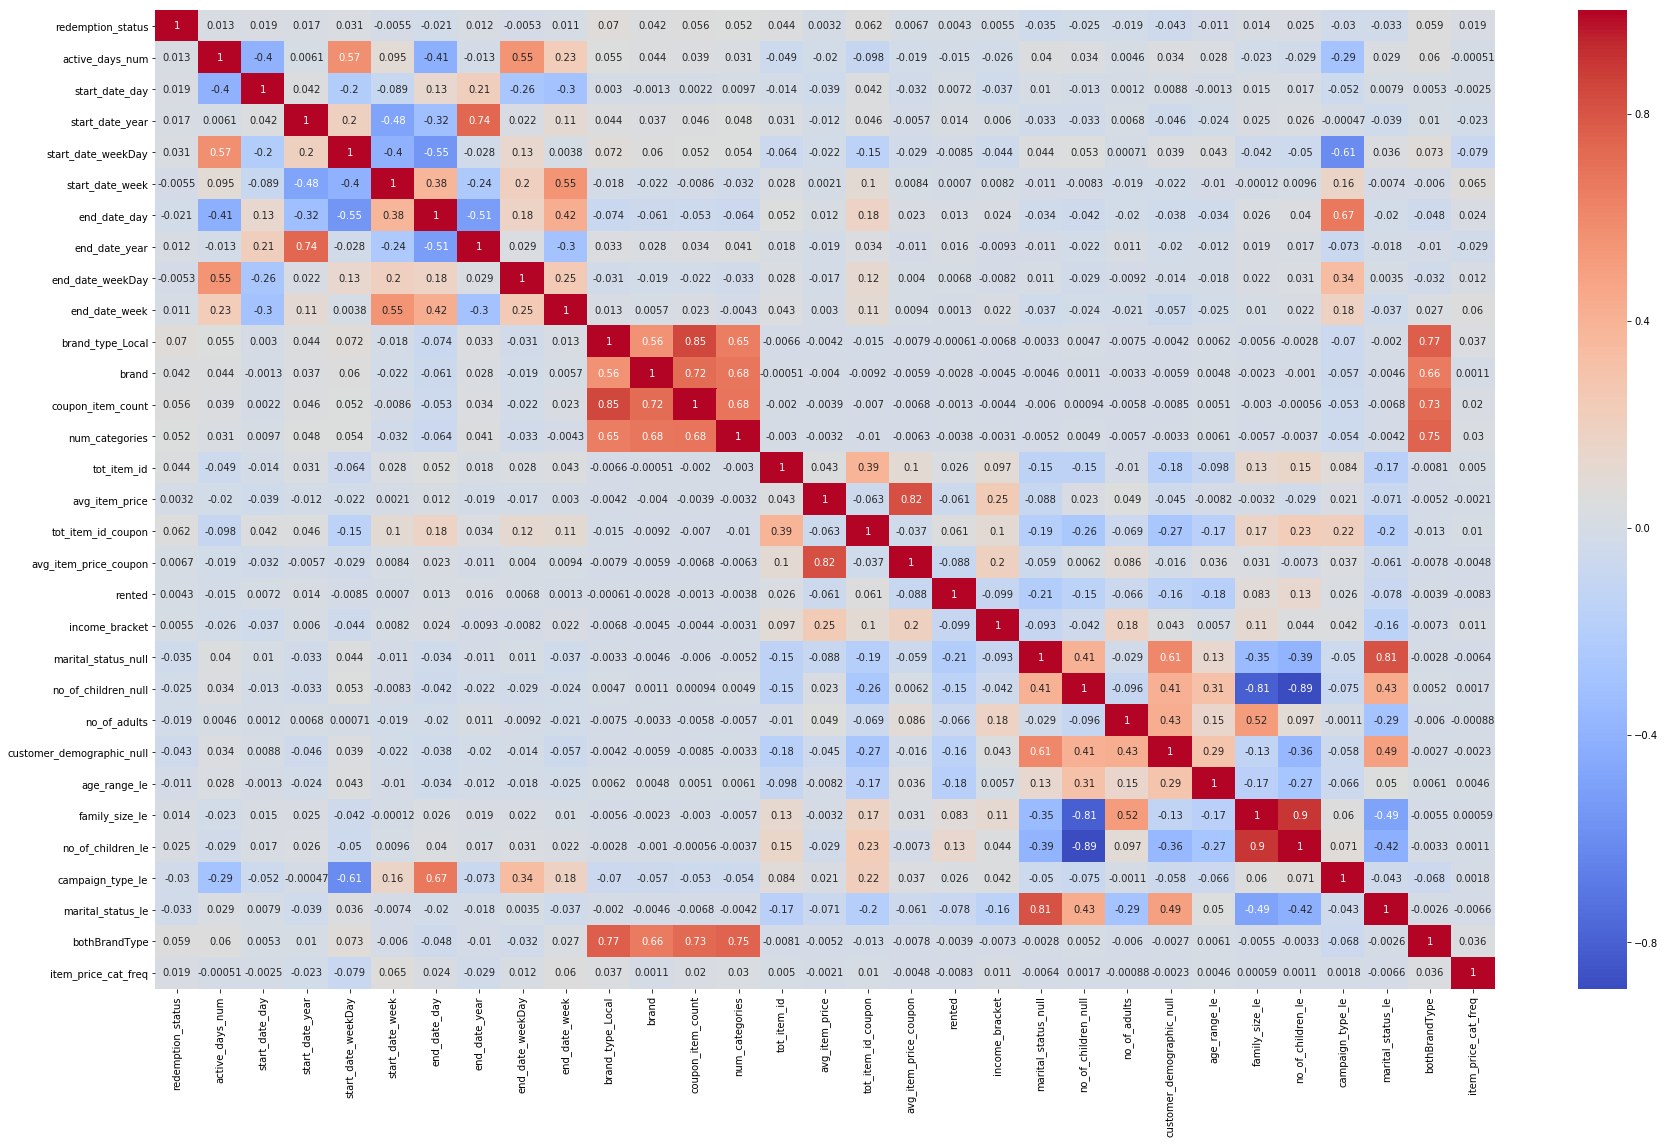

In [586]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(30,18))
sns.heatmap(mergedDataFullLe.drop(['category_Meat', 'end_date_month', 'category_Natural Products', 
            'id','customer_id','coupon_id', 'campaign_id','start_date_month','brand_type_Established','category_Garden',
            'category_Grocery', 'category_Vegetables (cut)', 'item_price','item_price_cat', 'tot_quantity', 
                                  'tot_quantity_coupon'] + itemCatCol,
            axis = 1).iloc[:,:40].corr(),
            cmap="coolwarm", annot = True)

In [ ]:
'category_Meat', 'end_date_month', 'category_Natural Products', 'start_date_month'

In [ ]:
# Check for these null columns
"""mergedDataFull['marital_status_null'].fillna(1, inplace=True)
mergedDataFull['no_of_children_null'].fillna(1, inplace=True)

mergedDataFull['no_of_adults'].fillna(mergedDataFull['no_of_adults'].mode().values[0], inplace=True)
mergedDataFull['age_range'].fillna(mergedDataFull['age_range'].mode().values[0], inplace=True)
mergedDataFull['marital_status'].fillna(mergedDataFull['marital_status'].mode().values[0], inplace=True)
mergedDataFull['rented'].fillna(mergedDataFull['rented'].mode().values[0], inplace=True)
mergedDataFull['no_of_children'].fillna(mergedDataFull['no_of_children'].mode().values[0], inplace=True)
mergedDataFull['income_bracket'].fillna(mergedDataFull['income_bracket'].mode().values[0], inplace=True)
mergedDataFull['family_size'].fillna(mergedDataFull['family_size'].mode().values[0], inplace=True)"""

In [ ]:
# Add column new year in between i.e. Holiday
# Add new column with value 1 if both brandType established and local are greater than 0
# Add new column for sum of columns category which greater than 0 
# Add mean of redemption status for id and also consider same for other cat columns
# Add categrory for item_price
# Check quantity column
# Check item_price_x and item_price_y column
# no_of_children_le can be categorical
# no_of_days for a customer since last transaction
# Error in data for category alcohol
# Map customer Transaction Data to itemData
# Check if brand column is present in final data or not


columnToDrop = ['id', 'campaign_id', 'coupon_id', 'customer_id', 'item_id']

convertToCat = ['active_days_num': [47], "start_date_day":[19,28], "start_date_month":[5], "start_date_year":[2013],
               "start_date_weekDay": [6], "start_date_week":[20], "end_date_day":[1,5], "end_date_month":[7],
               "item_price":[0, 20, 150,250,300,600], "income_bracket":[for mean], "age_range" : [for mean],
               "family_size_le":[for mean]]

In [720]:
len(mergedDataFullLe.columns), len(trainLe.columns)

(63, 63)

In [701]:
mergedDataFullLe.drop(['start_date_day_freq'], axis = 1, inplace=True)

In [719]:
trainLe = mergedDataFullLe.iloc[:trainData.shape[0],:]
testLe = mergedDataFullLe.iloc[trainData.shape[0]:,:]

In [721]:
trainLe.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status', 'active_days_num', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_weekDay', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_weekDay', 'end_date_week', 'brand_type_Established', 'brand_type_Local', 'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)', 'item_price', 'brand', 'coupon_item_count', 'num_categories', 'tot_item_id', 'tot_quantity', 'avg_item_price', 'last_active', 'tot_item_id_coupon', 'tot_quantity_coupon', 'avg_item_price_coupon', 'rented', 'income_bracket', 'marital_status_null', 'no_of_child

In [722]:
n_folds = 5
#5        |  0.8546   |  0.0389   |  18.98    |  95.33    |  2.372    |  196.8    |
params = {'min_data_in_leaf': 35, 'learning_rate': 0.0389, 'max_depth': 19, 'num_leaves': 95, 
          'min_sum_hessian_in_leaf': 2, 'verbose_eval': True}

scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainLe.drop(['id', 'customer_id',
                        'last_active'], axis = 1), 
                        uniqueId = "campaign_id", params=params, model_type = "lgb")
print(scores)

[1]	training's binary_logloss: 0.0521045	valid_1's binary_logloss: 0.0431217
Training until validation scores don't improve for 400 rounds.
[2]	training's binary_logloss: 0.0503188	valid_1's binary_logloss: 0.0427749
[3]	training's binary_logloss: 0.0488333	valid_1's binary_logloss: 0.0424668
[4]	training's binary_logloss: 0.0473375	valid_1's binary_logloss: 0.042045
[5]	training's binary_logloss: 0.0460405	valid_1's binary_logloss: 0.0417494
[6]	training's binary_logloss: 0.0449013	valid_1's binary_logloss: 0.0414651
[7]	training's binary_logloss: 0.0438354	valid_1's binary_logloss: 0.0412106
[8]	training's binary_logloss: 0.0428132	valid_1's binary_logloss: 0.0409988
[9]	training's binary_logloss: 0.0418419	valid_1's binary_logloss: 0.0408193
[10]	training's binary_logloss: 0.0409378	valid_1's binary_logloss: 0.0406504
[11]	training's binary_logloss: 0.0401642	valid_1's binary_logloss: 0.0405227
[12]	training's binary_logloss: 0.0394181	valid_1's binary_logloss: 0.0403794
[13]	traini

[109]	training's binary_logloss: 0.0161898	valid_1's binary_logloss: 0.0374953
[110]	training's binary_logloss: 0.0160926	valid_1's binary_logloss: 0.0374955
[111]	training's binary_logloss: 0.0159751	valid_1's binary_logloss: 0.0374907
[112]	training's binary_logloss: 0.015875	valid_1's binary_logloss: 0.037508
[113]	training's binary_logloss: 0.0157519	valid_1's binary_logloss: 0.0375203
[114]	training's binary_logloss: 0.0156502	valid_1's binary_logloss: 0.0375316
[115]	training's binary_logloss: 0.0155671	valid_1's binary_logloss: 0.0375127
[116]	training's binary_logloss: 0.0154536	valid_1's binary_logloss: 0.037542
[117]	training's binary_logloss: 0.0153402	valid_1's binary_logloss: 0.037595
[118]	training's binary_logloss: 0.0152285	valid_1's binary_logloss: 0.0375718
[119]	training's binary_logloss: 0.0151035	valid_1's binary_logloss: 0.0375869
[120]	training's binary_logloss: 0.0149962	valid_1's binary_logloss: 0.0376202
[121]	training's binary_logloss: 0.0149462	valid_1's bin

[213]	training's binary_logloss: 0.00896485	valid_1's binary_logloss: 0.0400268
[214]	training's binary_logloss: 0.00891025	valid_1's binary_logloss: 0.0400779
[215]	training's binary_logloss: 0.00886137	valid_1's binary_logloss: 0.0401131
[216]	training's binary_logloss: 0.0088121	valid_1's binary_logloss: 0.0401618
[217]	training's binary_logloss: 0.00875799	valid_1's binary_logloss: 0.0401947
[218]	training's binary_logloss: 0.00872309	valid_1's binary_logloss: 0.0402281
[219]	training's binary_logloss: 0.00867503	valid_1's binary_logloss: 0.0402457
[220]	training's binary_logloss: 0.00861763	valid_1's binary_logloss: 0.0402816
[221]	training's binary_logloss: 0.00856887	valid_1's binary_logloss: 0.0403016
[222]	training's binary_logloss: 0.00851423	valid_1's binary_logloss: 0.0403582
[223]	training's binary_logloss: 0.00847767	valid_1's binary_logloss: 0.0403878
[224]	training's binary_logloss: 0.00844294	valid_1's binary_logloss: 0.0403983
[225]	training's binary_logloss: 0.008389

[319]	training's binary_logloss: 0.00546364	valid_1's binary_logloss: 0.0429093
[320]	training's binary_logloss: 0.00544539	valid_1's binary_logloss: 0.0429196
[321]	training's binary_logloss: 0.00542796	valid_1's binary_logloss: 0.0429386
[322]	training's binary_logloss: 0.00541046	valid_1's binary_logloss: 0.0429436
[323]	training's binary_logloss: 0.00538191	valid_1's binary_logloss: 0.0430031
[324]	training's binary_logloss: 0.00535276	valid_1's binary_logloss: 0.0430226
[325]	training's binary_logloss: 0.00532479	valid_1's binary_logloss: 0.0430597
[326]	training's binary_logloss: 0.00529982	valid_1's binary_logloss: 0.0431081
[327]	training's binary_logloss: 0.00529	valid_1's binary_logloss: 0.0431191
[328]	training's binary_logloss: 0.00526073	valid_1's binary_logloss: 0.0431263
[329]	training's binary_logloss: 0.00524728	valid_1's binary_logloss: 0.0431538
[330]	training's binary_logloss: 0.00522224	valid_1's binary_logloss: 0.0431794
[331]	training's binary_logloss: 0.00520079

[423]	training's binary_logloss: 0.00384057	valid_1's binary_logloss: 0.0455554
[424]	training's binary_logloss: 0.00382823	valid_1's binary_logloss: 0.0455796
[425]	training's binary_logloss: 0.00381666	valid_1's binary_logloss: 0.0455996
[426]	training's binary_logloss: 0.00380352	valid_1's binary_logloss: 0.0456268
[427]	training's binary_logloss: 0.00379271	valid_1's binary_logloss: 0.0456394
[428]	training's binary_logloss: 0.00378316	valid_1's binary_logloss: 0.0456624
[429]	training's binary_logloss: 0.00377351	valid_1's binary_logloss: 0.0456866
[430]	training's binary_logloss: 0.0037615	valid_1's binary_logloss: 0.0457118
[431]	training's binary_logloss: 0.00375317	valid_1's binary_logloss: 0.0457452
[432]	training's binary_logloss: 0.00374073	valid_1's binary_logloss: 0.0457652
[433]	training's binary_logloss: 0.00372794	valid_1's binary_logloss: 0.0457934
[434]	training's binary_logloss: 0.00371623	valid_1's binary_logloss: 0.0458271
[435]	training's binary_logloss: 0.003705

[72]	training's binary_logloss: 0.0200202	valid_1's binary_logloss: 0.0385691
[73]	training's binary_logloss: 0.0199006	valid_1's binary_logloss: 0.0385636
[74]	training's binary_logloss: 0.0198186	valid_1's binary_logloss: 0.0385485
[75]	training's binary_logloss: 0.019744	valid_1's binary_logloss: 0.0385347
[76]	training's binary_logloss: 0.0196452	valid_1's binary_logloss: 0.0385283
[77]	training's binary_logloss: 0.0195719	valid_1's binary_logloss: 0.0385413
[78]	training's binary_logloss: 0.0194252	valid_1's binary_logloss: 0.0385592
[79]	training's binary_logloss: 0.019245	valid_1's binary_logloss: 0.0386178
[80]	training's binary_logloss: 0.0191603	valid_1's binary_logloss: 0.0386323
[81]	training's binary_logloss: 0.019006	valid_1's binary_logloss: 0.0386999
[82]	training's binary_logloss: 0.0188488	valid_1's binary_logloss: 0.0386789
[83]	training's binary_logloss: 0.0186891	valid_1's binary_logloss: 0.0386837
[84]	training's binary_logloss: 0.0185394	valid_1's binary_logloss:

[179]	training's binary_logloss: 0.00974074	valid_1's binary_logloss: 0.0405086
[180]	training's binary_logloss: 0.00966512	valid_1's binary_logloss: 0.040556
[181]	training's binary_logloss: 0.00959004	valid_1's binary_logloss: 0.0405813
[182]	training's binary_logloss: 0.00952122	valid_1's binary_logloss: 0.0406448
[183]	training's binary_logloss: 0.00944864	valid_1's binary_logloss: 0.0406582
[184]	training's binary_logloss: 0.00937497	valid_1's binary_logloss: 0.0406536
[185]	training's binary_logloss: 0.00930507	valid_1's binary_logloss: 0.0406672
[186]	training's binary_logloss: 0.00924362	valid_1's binary_logloss: 0.0406918
[187]	training's binary_logloss: 0.00919937	valid_1's binary_logloss: 0.0407243
[188]	training's binary_logloss: 0.00914586	valid_1's binary_logloss: 0.040747
[189]	training's binary_logloss: 0.00907783	valid_1's binary_logloss: 0.0407795
[190]	training's binary_logloss: 0.00900526	valid_1's binary_logloss: 0.0408105
[191]	training's binary_logloss: 0.0089470

[282]	training's binary_logloss: 0.00565264	valid_1's binary_logloss: 0.0434597
[283]	training's binary_logloss: 0.0056218	valid_1's binary_logloss: 0.0435074
[284]	training's binary_logloss: 0.00559467	valid_1's binary_logloss: 0.0435296
[285]	training's binary_logloss: 0.0055663	valid_1's binary_logloss: 0.0435653
[286]	training's binary_logloss: 0.00555135	valid_1's binary_logloss: 0.0436134
[287]	training's binary_logloss: 0.00553231	valid_1's binary_logloss: 0.0436265
[288]	training's binary_logloss: 0.00551609	valid_1's binary_logloss: 0.0436591
[289]	training's binary_logloss: 0.00549547	valid_1's binary_logloss: 0.0436712
[290]	training's binary_logloss: 0.0054731	valid_1's binary_logloss: 0.0437053
[291]	training's binary_logloss: 0.00545967	valid_1's binary_logloss: 0.0437311
[292]	training's binary_logloss: 0.00543937	valid_1's binary_logloss: 0.0437612
[293]	training's binary_logloss: 0.00542191	valid_1's binary_logloss: 0.0437871
[294]	training's binary_logloss: 0.00539852

[386]	training's binary_logloss: 0.00396863	valid_1's binary_logloss: 0.0460492
[387]	training's binary_logloss: 0.00395382	valid_1's binary_logloss: 0.0460773
[388]	training's binary_logloss: 0.00394094	valid_1's binary_logloss: 0.0461017
[389]	training's binary_logloss: 0.00392949	valid_1's binary_logloss: 0.0461271
[390]	training's binary_logloss: 0.00391884	valid_1's binary_logloss: 0.0461609
[391]	training's binary_logloss: 0.00391253	valid_1's binary_logloss: 0.0461725
[392]	training's binary_logloss: 0.00389817	valid_1's binary_logloss: 0.0461874
[393]	training's binary_logloss: 0.00388586	valid_1's binary_logloss: 0.0461974
[394]	training's binary_logloss: 0.0038748	valid_1's binary_logloss: 0.0462123
[395]	training's binary_logloss: 0.00386441	valid_1's binary_logloss: 0.0462398
[396]	training's binary_logloss: 0.00385162	valid_1's binary_logloss: 0.0462522
[397]	training's binary_logloss: 0.00384094	valid_1's binary_logloss: 0.0462678
[398]	training's binary_logloss: 0.003828

[21]	training's binary_logloss: 0.034187	valid_1's binary_logloss: 0.0317099
[22]	training's binary_logloss: 0.0337306	valid_1's binary_logloss: 0.0316278
[23]	training's binary_logloss: 0.0332545	valid_1's binary_logloss: 0.0314677
[24]	training's binary_logloss: 0.0328253	valid_1's binary_logloss: 0.0314477
[25]	training's binary_logloss: 0.0324384	valid_1's binary_logloss: 0.0313434
[26]	training's binary_logloss: 0.0320317	valid_1's binary_logloss: 0.0312094
[27]	training's binary_logloss: 0.0316532	valid_1's binary_logloss: 0.0311013
[28]	training's binary_logloss: 0.0312676	valid_1's binary_logloss: 0.0310546
[29]	training's binary_logloss: 0.0309082	valid_1's binary_logloss: 0.0309764
[30]	training's binary_logloss: 0.0305311	valid_1's binary_logloss: 0.0308439
[31]	training's binary_logloss: 0.030206	valid_1's binary_logloss: 0.0308075
[32]	training's binary_logloss: 0.0298895	valid_1's binary_logloss: 0.030698
[33]	training's binary_logloss: 0.0295456	valid_1's binary_logloss:

[127]	training's binary_logloss: 0.0151007	valid_1's binary_logloss: 0.0302379
[128]	training's binary_logloss: 0.0150018	valid_1's binary_logloss: 0.0303049
[129]	training's binary_logloss: 0.0149082	valid_1's binary_logloss: 0.0302669
[130]	training's binary_logloss: 0.0148416	valid_1's binary_logloss: 0.0302588
[131]	training's binary_logloss: 0.014757	valid_1's binary_logloss: 0.0302309
[132]	training's binary_logloss: 0.0146854	valid_1's binary_logloss: 0.0302568
[133]	training's binary_logloss: 0.0145972	valid_1's binary_logloss: 0.0302105
[134]	training's binary_logloss: 0.0145124	valid_1's binary_logloss: 0.0302357
[135]	training's binary_logloss: 0.0144676	valid_1's binary_logloss: 0.0302365
[136]	training's binary_logloss: 0.0143883	valid_1's binary_logloss: 0.0302078
[137]	training's binary_logloss: 0.0143124	valid_1's binary_logloss: 0.0302002
[138]	training's binary_logloss: 0.0142239	valid_1's binary_logloss: 0.0302354
[139]	training's binary_logloss: 0.0141386	valid_1's 

[234]	training's binary_logloss: 0.00870681	valid_1's binary_logloss: 0.0313388
[235]	training's binary_logloss: 0.008658	valid_1's binary_logloss: 0.0313922
[236]	training's binary_logloss: 0.00861273	valid_1's binary_logloss: 0.0314385
[237]	training's binary_logloss: 0.00859149	valid_1's binary_logloss: 0.03143
[238]	training's binary_logloss: 0.00855163	valid_1's binary_logloss: 0.031461
[239]	training's binary_logloss: 0.00850554	valid_1's binary_logloss: 0.0315068
[240]	training's binary_logloss: 0.00847048	valid_1's binary_logloss: 0.0315443
[241]	training's binary_logloss: 0.00842162	valid_1's binary_logloss: 0.0315252
[242]	training's binary_logloss: 0.00837596	valid_1's binary_logloss: 0.031523
[243]	training's binary_logloss: 0.00835188	valid_1's binary_logloss: 0.0315544
[244]	training's binary_logloss: 0.00830873	valid_1's binary_logloss: 0.0315653
[245]	training's binary_logloss: 0.00826566	valid_1's binary_logloss: 0.0315763
[246]	training's binary_logloss: 0.00823073	va

[340]	training's binary_logloss: 0.00538943	valid_1's binary_logloss: 0.0338423
[341]	training's binary_logloss: 0.00536515	valid_1's binary_logloss: 0.0338668
[342]	training's binary_logloss: 0.00535538	valid_1's binary_logloss: 0.0338546
[343]	training's binary_logloss: 0.0053305	valid_1's binary_logloss: 0.0338492
[344]	training's binary_logloss: 0.00532531	valid_1's binary_logloss: 0.0338489
[345]	training's binary_logloss: 0.00531725	valid_1's binary_logloss: 0.0338403
[346]	training's binary_logloss: 0.00529042	valid_1's binary_logloss: 0.0338477
[347]	training's binary_logloss: 0.00526833	valid_1's binary_logloss: 0.0338954
[348]	training's binary_logloss: 0.00525539	valid_1's binary_logloss: 0.0339169
[349]	training's binary_logloss: 0.00523598	valid_1's binary_logloss: 0.0339138
[350]	training's binary_logloss: 0.00522284	valid_1's binary_logloss: 0.0339603
[351]	training's binary_logloss: 0.00519665	valid_1's binary_logloss: 0.0340069
[352]	training's binary_logloss: 0.005183

[444]	training's binary_logloss: 0.00374716	valid_1's binary_logloss: 0.0359683
[445]	training's binary_logloss: 0.00373679	valid_1's binary_logloss: 0.0359952
[446]	training's binary_logloss: 0.00373312	valid_1's binary_logloss: 0.035996
[447]	training's binary_logloss: 0.0037217	valid_1's binary_logloss: 0.0360082
[448]	training's binary_logloss: 0.00370972	valid_1's binary_logloss: 0.0360518
[449]	training's binary_logloss: 0.00369654	valid_1's binary_logloss: 0.0360854
[450]	training's binary_logloss: 0.00368554	valid_1's binary_logloss: 0.0361155
[451]	training's binary_logloss: 0.00367774	valid_1's binary_logloss: 0.0361175
[452]	training's binary_logloss: 0.00366562	valid_1's binary_logloss: 0.0361362
[453]	training's binary_logloss: 0.00365143	valid_1's binary_logloss: 0.0361503
[454]	training's binary_logloss: 0.00363981	valid_1's binary_logloss: 0.0361842
[455]	training's binary_logloss: 0.00363245	valid_1's binary_logloss: 0.0362032
[456]	training's binary_logloss: 0.0036224

[81]	training's binary_logloss: 0.0195438	valid_1's binary_logloss: 0.0336121
[82]	training's binary_logloss: 0.019383	valid_1's binary_logloss: 0.0336498
[83]	training's binary_logloss: 0.0192358	valid_1's binary_logloss: 0.0337009
[84]	training's binary_logloss: 0.0191039	valid_1's binary_logloss: 0.0337319
[85]	training's binary_logloss: 0.0189554	valid_1's binary_logloss: 0.0337381
[86]	training's binary_logloss: 0.0188144	valid_1's binary_logloss: 0.033768
[87]	training's binary_logloss: 0.0187197	valid_1's binary_logloss: 0.0337858
[88]	training's binary_logloss: 0.0185885	valid_1's binary_logloss: 0.0337586
[89]	training's binary_logloss: 0.0184971	valid_1's binary_logloss: 0.0337796
[90]	training's binary_logloss: 0.0184098	valid_1's binary_logloss: 0.0338133
[91]	training's binary_logloss: 0.0183318	valid_1's binary_logloss: 0.0338435
[92]	training's binary_logloss: 0.0182394	valid_1's binary_logloss: 0.0338539
[93]	training's binary_logloss: 0.0181793	valid_1's binary_logloss

[187]	training's binary_logloss: 0.0105624	valid_1's binary_logloss: 0.0367406
[188]	training's binary_logloss: 0.0105017	valid_1's binary_logloss: 0.0367481
[189]	training's binary_logloss: 0.0104735	valid_1's binary_logloss: 0.0367646
[190]	training's binary_logloss: 0.0104105	valid_1's binary_logloss: 0.0368463
[191]	training's binary_logloss: 0.0103478	valid_1's binary_logloss: 0.0368767
[192]	training's binary_logloss: 0.0102909	valid_1's binary_logloss: 0.0368783
[193]	training's binary_logloss: 0.0102294	valid_1's binary_logloss: 0.0368714
[194]	training's binary_logloss: 0.0101929	valid_1's binary_logloss: 0.0369154
[195]	training's binary_logloss: 0.0101316	valid_1's binary_logloss: 0.0369253
[196]	training's binary_logloss: 0.0100906	valid_1's binary_logloss: 0.0369414
[197]	training's binary_logloss: 0.0100341	valid_1's binary_logloss: 0.0369732
[198]	training's binary_logloss: 0.0099991	valid_1's binary_logloss: 0.0370234
[199]	training's binary_logloss: 0.00996769	valid_1'

[291]	training's binary_logloss: 0.00644784	valid_1's binary_logloss: 0.0399609
[292]	training's binary_logloss: 0.00641317	valid_1's binary_logloss: 0.0399752
[293]	training's binary_logloss: 0.00640526	valid_1's binary_logloss: 0.0400065
[294]	training's binary_logloss: 0.00637491	valid_1's binary_logloss: 0.0400543
[295]	training's binary_logloss: 0.00634746	valid_1's binary_logloss: 0.0400969
[296]	training's binary_logloss: 0.00633041	valid_1's binary_logloss: 0.0401315
[297]	training's binary_logloss: 0.00629713	valid_1's binary_logloss: 0.0401139
[298]	training's binary_logloss: 0.00626993	valid_1's binary_logloss: 0.0401113
[299]	training's binary_logloss: 0.0062411	valid_1's binary_logloss: 0.040158
[300]	training's binary_logloss: 0.00621248	valid_1's binary_logloss: 0.0402009
[301]	training's binary_logloss: 0.00618428	valid_1's binary_logloss: 0.0402468
[302]	training's binary_logloss: 0.0061646	valid_1's binary_logloss: 0.0403222
[303]	training's binary_logloss: 0.00613573

[394]	training's binary_logloss: 0.0043392	valid_1's binary_logloss: 0.0425917
[395]	training's binary_logloss: 0.00432052	valid_1's binary_logloss: 0.0426558
[396]	training's binary_logloss: 0.00430206	valid_1's binary_logloss: 0.0426711
[397]	training's binary_logloss: 0.00429299	valid_1's binary_logloss: 0.0426969
[398]	training's binary_logloss: 0.00427562	valid_1's binary_logloss: 0.0427251
[399]	training's binary_logloss: 0.00426684	valid_1's binary_logloss: 0.0427485
[400]	training's binary_logloss: 0.00425194	valid_1's binary_logloss: 0.0427455
[401]	training's binary_logloss: 0.00423664	valid_1's binary_logloss: 0.0427464
[402]	training's binary_logloss: 0.00421923	valid_1's binary_logloss: 0.0427595
[403]	training's binary_logloss: 0.0042031	valid_1's binary_logloss: 0.0427783
[404]	training's binary_logloss: 0.0041869	valid_1's binary_logloss: 0.0428025
[405]	training's binary_logloss: 0.00417247	valid_1's binary_logloss: 0.0427993
[406]	training's binary_logloss: 0.0041558	

[44]	training's binary_logloss: 0.0200353	valid_1's binary_logloss: 0.0590258
[45]	training's binary_logloss: 0.0197728	valid_1's binary_logloss: 0.0591009
[46]	training's binary_logloss: 0.019583	valid_1's binary_logloss: 0.0591601
[47]	training's binary_logloss: 0.019331	valid_1's binary_logloss: 0.0592139
[48]	training's binary_logloss: 0.0190864	valid_1's binary_logloss: 0.0592418
[49]	training's binary_logloss: 0.0189113	valid_1's binary_logloss: 0.0592421
[50]	training's binary_logloss: 0.0186807	valid_1's binary_logloss: 0.0592018
[51]	training's binary_logloss: 0.0184804	valid_1's binary_logloss: 0.059202
[52]	training's binary_logloss: 0.0182882	valid_1's binary_logloss: 0.059247
[53]	training's binary_logloss: 0.0181121	valid_1's binary_logloss: 0.0592938
[54]	training's binary_logloss: 0.0178785	valid_1's binary_logloss: 0.0593083
[55]	training's binary_logloss: 0.0176415	valid_1's binary_logloss: 0.059361
[56]	training's binary_logloss: 0.017423	valid_1's binary_logloss: 0.

[153]	training's binary_logloss: 0.00795449	valid_1's binary_logloss: 0.0649756
[154]	training's binary_logloss: 0.00790031	valid_1's binary_logloss: 0.0650871
[155]	training's binary_logloss: 0.00786236	valid_1's binary_logloss: 0.0651402
[156]	training's binary_logloss: 0.00779592	valid_1's binary_logloss: 0.0651776
[157]	training's binary_logloss: 0.00773694	valid_1's binary_logloss: 0.0652275
[158]	training's binary_logloss: 0.00769278	valid_1's binary_logloss: 0.065314
[159]	training's binary_logloss: 0.00763122	valid_1's binary_logloss: 0.0653739
[160]	training's binary_logloss: 0.0075641	valid_1's binary_logloss: 0.0654499
[161]	training's binary_logloss: 0.00751272	valid_1's binary_logloss: 0.0655268
[162]	training's binary_logloss: 0.00744298	valid_1's binary_logloss: 0.0656127
[163]	training's binary_logloss: 0.00738527	valid_1's binary_logloss: 0.0657103
[164]	training's binary_logloss: 0.00733608	valid_1's binary_logloss: 0.065792
[165]	training's binary_logloss: 0.0072974	

[256]	training's binary_logloss: 0.00432596	valid_1's binary_logloss: 0.0716559
[257]	training's binary_logloss: 0.00430824	valid_1's binary_logloss: 0.0716766
[258]	training's binary_logloss: 0.00428989	valid_1's binary_logloss: 0.0716891
[259]	training's binary_logloss: 0.00426938	valid_1's binary_logloss: 0.0717284
[260]	training's binary_logloss: 0.00425818	valid_1's binary_logloss: 0.0717722
[261]	training's binary_logloss: 0.00424337	valid_1's binary_logloss: 0.0717998
[262]	training's binary_logloss: 0.0042199	valid_1's binary_logloss: 0.0718724
[263]	training's binary_logloss: 0.0042022	valid_1's binary_logloss: 0.0719344
[264]	training's binary_logloss: 0.00418653	valid_1's binary_logloss: 0.0719939
[265]	training's binary_logloss: 0.00416426	valid_1's binary_logloss: 0.0720604
[266]	training's binary_logloss: 0.00414722	valid_1's binary_logloss: 0.0721301
[267]	training's binary_logloss: 0.00412605	valid_1's binary_logloss: 0.0722081
[268]	training's binary_logloss: 0.0041091

[362]	training's binary_logloss: 0.00294684	valid_1's binary_logloss: 0.0769346
[363]	training's binary_logloss: 0.00293752	valid_1's binary_logloss: 0.0769849
[364]	training's binary_logloss: 0.00293165	valid_1's binary_logloss: 0.0770306
[365]	training's binary_logloss: 0.0029227	valid_1's binary_logloss: 0.0770627
[366]	training's binary_logloss: 0.00291329	valid_1's binary_logloss: 0.0771207
[367]	training's binary_logloss: 0.0029045	valid_1's binary_logloss: 0.077136
[368]	training's binary_logloss: 0.00289779	valid_1's binary_logloss: 0.0771637
[369]	training's binary_logloss: 0.00289262	valid_1's binary_logloss: 0.0772024
[370]	training's binary_logloss: 0.00288414	valid_1's binary_logloss: 0.0772235
[371]	training's binary_logloss: 0.00287838	valid_1's binary_logloss: 0.0772249
[372]	training's binary_logloss: 0.00287356	valid_1's binary_logloss: 0.0772441
[373]	training's binary_logloss: 0.00286537	valid_1's binary_logloss: 0.0772708
[374]	training's binary_logloss: 0.00285737

In [723]:
n_folds = 5

params = {'min_data_in_leaf': 35, 'learning_rate': 0.00705919212825226, 'max_depth': 10, 'num_leaves': 17, 'verbose_eval': True,
         'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', }

scores = cross_validate(columnToSplitOn = uniqueCampaignTrain, n_folds = n_folds, data = trainLe.drop(['id', 'customer_id',
                        'last_active'], axis = 1), 
                        uniqueId = "campaign_id", params=params, model_type = "lgb")


print(scores)

[1]	training's binary_logloss: 0.686362	valid_1's binary_logloss: 0.686299
Training until validation scores don't improve for 400 rounds.
[2]	training's binary_logloss: 0.679673	valid_1's binary_logloss: 0.679569
[3]	training's binary_logloss: 0.673077	valid_1's binary_logloss: 0.672912
[4]	training's binary_logloss: 0.666572	valid_1's binary_logloss: 0.666339
[5]	training's binary_logloss: 0.660156	valid_1's binary_logloss: 0.659871
[6]	training's binary_logloss: 0.653828	valid_1's binary_logloss: 0.653484
[7]	training's binary_logloss: 0.647585	valid_1's binary_logloss: 0.647209
[8]	training's binary_logloss: 0.641428	valid_1's binary_logloss: 0.64101
[9]	training's binary_logloss: 0.63535	valid_1's binary_logloss: 0.634871
[10]	training's binary_logloss: 0.629354	valid_1's binary_logloss: 0.628858
[11]	training's binary_logloss: 0.623438	valid_1's binary_logloss: 0.622893
[12]	training's binary_logloss: 0.617606	valid_1's binary_logloss: 0.616996
[13]	training's binary_logloss: 0.61

[117]	training's binary_logloss: 0.263967	valid_1's binary_logloss: 0.26068
[118]	training's binary_logloss: 0.262093	valid_1's binary_logloss: 0.258802
[119]	training's binary_logloss: 0.260236	valid_1's binary_logloss: 0.256943
[120]	training's binary_logloss: 0.258398	valid_1's binary_logloss: 0.255099
[121]	training's binary_logloss: 0.256576	valid_1's binary_logloss: 0.253258
[122]	training's binary_logloss: 0.254771	valid_1's binary_logloss: 0.251434
[123]	training's binary_logloss: 0.25298	valid_1's binary_logloss: 0.249622
[124]	training's binary_logloss: 0.251208	valid_1's binary_logloss: 0.247831
[125]	training's binary_logloss: 0.249453	valid_1's binary_logloss: 0.246062
[126]	training's binary_logloss: 0.247713	valid_1's binary_logloss: 0.24432
[127]	training's binary_logloss: 0.245989	valid_1's binary_logloss: 0.242585
[128]	training's binary_logloss: 0.24428	valid_1's binary_logloss: 0.240857
[129]	training's binary_logloss: 0.242587	valid_1's binary_logloss: 0.239143
[13

[226]	training's binary_logloss: 0.132093	valid_1's binary_logloss: 0.127733
[227]	training's binary_logloss: 0.13136	valid_1's binary_logloss: 0.126992
[228]	training's binary_logloss: 0.130633	valid_1's binary_logloss: 0.126256
[229]	training's binary_logloss: 0.129913	valid_1's binary_logloss: 0.125529
[230]	training's binary_logloss: 0.129196	valid_1's binary_logloss: 0.124818
[231]	training's binary_logloss: 0.128486	valid_1's binary_logloss: 0.124101
[232]	training's binary_logloss: 0.127784	valid_1's binary_logloss: 0.123391
[233]	training's binary_logloss: 0.127088	valid_1's binary_logloss: 0.122683
[234]	training's binary_logloss: 0.126395	valid_1's binary_logloss: 0.121984
[235]	training's binary_logloss: 0.125709	valid_1's binary_logloss: 0.12129
[236]	training's binary_logloss: 0.125032	valid_1's binary_logloss: 0.1206
[237]	training's binary_logloss: 0.124354	valid_1's binary_logloss: 0.119918
[238]	training's binary_logloss: 0.123684	valid_1's binary_logloss: 0.119238
[23

[335]	training's binary_logloss: 0.0785354	valid_1's binary_logloss: 0.07443
[336]	training's binary_logloss: 0.0782259	valid_1's binary_logloss: 0.0741231
[337]	training's binary_logloss: 0.0779203	valid_1's binary_logloss: 0.0738214
[338]	training's binary_logloss: 0.0776159	valid_1's binary_logloss: 0.0735212
[339]	training's binary_logloss: 0.0773162	valid_1's binary_logloss: 0.0732175
[340]	training's binary_logloss: 0.0770152	valid_1's binary_logloss: 0.0729253
[341]	training's binary_logloss: 0.0767205	valid_1's binary_logloss: 0.0726499
[342]	training's binary_logloss: 0.0764267	valid_1's binary_logloss: 0.0723577
[343]	training's binary_logloss: 0.0761289	valid_1's binary_logloss: 0.0720776
[344]	training's binary_logloss: 0.0758363	valid_1's binary_logloss: 0.0718004
[345]	training's binary_logloss: 0.0755466	valid_1's binary_logloss: 0.0715198
[346]	training's binary_logloss: 0.075257	valid_1's binary_logloss: 0.0712572
[347]	training's binary_logloss: 0.0749747	valid_1's bi

[443]	training's binary_logloss: 0.0555518	valid_1's binary_logloss: 0.0523633
[444]	training's binary_logloss: 0.0554101	valid_1's binary_logloss: 0.0522369
[445]	training's binary_logloss: 0.0552705	valid_1's binary_logloss: 0.0521056
[446]	training's binary_logloss: 0.0551302	valid_1's binary_logloss: 0.0519765
[447]	training's binary_logloss: 0.0549895	valid_1's binary_logloss: 0.0518491
[448]	training's binary_logloss: 0.0548524	valid_1's binary_logloss: 0.0517225
[449]	training's binary_logloss: 0.0547144	valid_1's binary_logloss: 0.0515958
[450]	training's binary_logloss: 0.05458	valid_1's binary_logloss: 0.0514702
[451]	training's binary_logloss: 0.0544471	valid_1's binary_logloss: 0.0513466
[452]	training's binary_logloss: 0.0543136	valid_1's binary_logloss: 0.0512243
[453]	training's binary_logloss: 0.054179	valid_1's binary_logloss: 0.0511015
[454]	training's binary_logloss: 0.0540485	valid_1's binary_logloss: 0.0509774
[455]	training's binary_logloss: 0.0539154	valid_1's bi

[553]	training's binary_logloss: 0.0448327	valid_1's binary_logloss: 0.043097
[554]	training's binary_logloss: 0.0447689	valid_1's binary_logloss: 0.0430444
[555]	training's binary_logloss: 0.044705	valid_1's binary_logloss: 0.0429976
[556]	training's binary_logloss: 0.0446424	valid_1's binary_logloss: 0.0429456
[557]	training's binary_logloss: 0.0445793	valid_1's binary_logloss: 0.0428957
[558]	training's binary_logloss: 0.0445142	valid_1's binary_logloss: 0.0428448
[559]	training's binary_logloss: 0.0444503	valid_1's binary_logloss: 0.0427941
[560]	training's binary_logloss: 0.0443863	valid_1's binary_logloss: 0.0427446
[561]	training's binary_logloss: 0.0443246	valid_1's binary_logloss: 0.0426945
[562]	training's binary_logloss: 0.0442656	valid_1's binary_logloss: 0.0426605
[563]	training's binary_logloss: 0.0442061	valid_1's binary_logloss: 0.0426149
[564]	training's binary_logloss: 0.0441479	valid_1's binary_logloss: 0.0425756
[565]	training's binary_logloss: 0.0440895	valid_1's b

[660]	training's binary_logloss: 0.039608	valid_1's binary_logloss: 0.0396744
[661]	training's binary_logloss: 0.0395746	valid_1's binary_logloss: 0.0396516
[662]	training's binary_logloss: 0.0395422	valid_1's binary_logloss: 0.0396237
[663]	training's binary_logloss: 0.0395058	valid_1's binary_logloss: 0.0395964
[664]	training's binary_logloss: 0.0394707	valid_1's binary_logloss: 0.0395751
[665]	training's binary_logloss: 0.0394346	valid_1's binary_logloss: 0.0395547
[666]	training's binary_logloss: 0.0394006	valid_1's binary_logloss: 0.039536
[667]	training's binary_logloss: 0.0393688	valid_1's binary_logloss: 0.0395144
[668]	training's binary_logloss: 0.0393357	valid_1's binary_logloss: 0.0394942
[669]	training's binary_logloss: 0.0392987	valid_1's binary_logloss: 0.0394742
[670]	training's binary_logloss: 0.0392636	valid_1's binary_logloss: 0.0394552
[671]	training's binary_logloss: 0.039229	valid_1's binary_logloss: 0.0394364
[672]	training's binary_logloss: 0.039195	valid_1's bin

[765]	training's binary_logloss: 0.0365353	valid_1's binary_logloss: 0.0381913
[766]	training's binary_logloss: 0.036508	valid_1's binary_logloss: 0.0381774
[767]	training's binary_logloss: 0.0364829	valid_1's binary_logloss: 0.0381711
[768]	training's binary_logloss: 0.0364578	valid_1's binary_logloss: 0.0381683
[769]	training's binary_logloss: 0.0364348	valid_1's binary_logloss: 0.0381604
[770]	training's binary_logloss: 0.0364107	valid_1's binary_logloss: 0.0381547
[771]	training's binary_logloss: 0.0363876	valid_1's binary_logloss: 0.0381471
[772]	training's binary_logloss: 0.0363638	valid_1's binary_logloss: 0.038143
[773]	training's binary_logloss: 0.0363421	valid_1's binary_logloss: 0.038138
[774]	training's binary_logloss: 0.0363202	valid_1's binary_logloss: 0.0381275
[775]	training's binary_logloss: 0.0362997	valid_1's binary_logloss: 0.0381146
[776]	training's binary_logloss: 0.0362768	valid_1's binary_logloss: 0.0381064
[777]	training's binary_logloss: 0.0362543	valid_1's bi

[872]	training's binary_logloss: 0.0344133	valid_1's binary_logloss: 0.0375786
[873]	training's binary_logloss: 0.0343917	valid_1's binary_logloss: 0.0375786
[874]	training's binary_logloss: 0.0343741	valid_1's binary_logloss: 0.0375768
[875]	training's binary_logloss: 0.0343587	valid_1's binary_logloss: 0.0375733
[876]	training's binary_logloss: 0.0343437	valid_1's binary_logloss: 0.0375699
[877]	training's binary_logloss: 0.0343229	valid_1's binary_logloss: 0.037561
[878]	training's binary_logloss: 0.0343086	valid_1's binary_logloss: 0.0375604
[879]	training's binary_logloss: 0.0342914	valid_1's binary_logloss: 0.0375378
[880]	training's binary_logloss: 0.0342731	valid_1's binary_logloss: 0.0375273
[881]	training's binary_logloss: 0.0342564	valid_1's binary_logloss: 0.0375296
[882]	training's binary_logloss: 0.0342404	valid_1's binary_logloss: 0.0375259
[883]	training's binary_logloss: 0.0342234	valid_1's binary_logloss: 0.0375251
[884]	training's binary_logloss: 0.034208	valid_1's b

[983]	training's binary_logloss: 0.0326725	valid_1's binary_logloss: 0.0374622
[984]	training's binary_logloss: 0.0326604	valid_1's binary_logloss: 0.0374605
[985]	training's binary_logloss: 0.0326447	valid_1's binary_logloss: 0.0374629
[986]	training's binary_logloss: 0.0326305	valid_1's binary_logloss: 0.0374615
[987]	training's binary_logloss: 0.0326165	valid_1's binary_logloss: 0.0374606
[988]	training's binary_logloss: 0.0326051	valid_1's binary_logloss: 0.037458
[989]	training's binary_logloss: 0.0325907	valid_1's binary_logloss: 0.0374633
[990]	training's binary_logloss: 0.0325771	valid_1's binary_logloss: 0.0374626
[991]	training's binary_logloss: 0.0325642	valid_1's binary_logloss: 0.0374636
[992]	training's binary_logloss: 0.0325521	valid_1's binary_logloss: 0.0374639
[993]	training's binary_logloss: 0.0325406	valid_1's binary_logloss: 0.0374668
[994]	training's binary_logloss: 0.0325302	valid_1's binary_logloss: 0.0374629
[995]	training's binary_logloss: 0.0325191	valid_1's 

[1091]	training's binary_logloss: 0.0313096	valid_1's binary_logloss: 0.0372957
[1092]	training's binary_logloss: 0.0312992	valid_1's binary_logloss: 0.0372947
[1093]	training's binary_logloss: 0.0312875	valid_1's binary_logloss: 0.0372985
[1094]	training's binary_logloss: 0.0312778	valid_1's binary_logloss: 0.0372994
[1095]	training's binary_logloss: 0.0312675	valid_1's binary_logloss: 0.0372972
[1096]	training's binary_logloss: 0.0312574	valid_1's binary_logloss: 0.0372943
[1097]	training's binary_logloss: 0.0312466	valid_1's binary_logloss: 0.0372961
[1098]	training's binary_logloss: 0.0312392	valid_1's binary_logloss: 0.0373021
[1099]	training's binary_logloss: 0.0312289	valid_1's binary_logloss: 0.0373043
[1100]	training's binary_logloss: 0.031219	valid_1's binary_logloss: 0.0373027
[1101]	training's binary_logloss: 0.0312055	valid_1's binary_logloss: 0.0373057
[1102]	training's binary_logloss: 0.0311906	valid_1's binary_logloss: 0.0373099
[1103]	training's binary_logloss: 0.03117

[1203]	training's binary_logloss: 0.0300712	valid_1's binary_logloss: 0.0371567
[1204]	training's binary_logloss: 0.0300618	valid_1's binary_logloss: 0.0371578
[1205]	training's binary_logloss: 0.0300508	valid_1's binary_logloss: 0.0371552
[1206]	training's binary_logloss: 0.0300413	valid_1's binary_logloss: 0.0371566
[1207]	training's binary_logloss: 0.0300323	valid_1's binary_logloss: 0.0371569
[1208]	training's binary_logloss: 0.03002	valid_1's binary_logloss: 0.037156
[1209]	training's binary_logloss: 0.0300101	valid_1's binary_logloss: 0.0371565
[1210]	training's binary_logloss: 0.0299993	valid_1's binary_logloss: 0.0371566
[1211]	training's binary_logloss: 0.0299869	valid_1's binary_logloss: 0.0371508
[1212]	training's binary_logloss: 0.0299791	valid_1's binary_logloss: 0.0371526
[1213]	training's binary_logloss: 0.0299666	valid_1's binary_logloss: 0.0371468
[1214]	training's binary_logloss: 0.0299549	valid_1's binary_logloss: 0.0371357
[1215]	training's binary_logloss: 0.0299456

[1314]	training's binary_logloss: 0.0290136	valid_1's binary_logloss: 0.0369627
[1315]	training's binary_logloss: 0.0290041	valid_1's binary_logloss: 0.0369604
[1316]	training's binary_logloss: 0.0289973	valid_1's binary_logloss: 0.0369587
[1317]	training's binary_logloss: 0.0289908	valid_1's binary_logloss: 0.0369618
[1318]	training's binary_logloss: 0.0289844	valid_1's binary_logloss: 0.0369579
[1319]	training's binary_logloss: 0.0289753	valid_1's binary_logloss: 0.0369558
[1320]	training's binary_logloss: 0.0289698	valid_1's binary_logloss: 0.0369545
[1321]	training's binary_logloss: 0.0289589	valid_1's binary_logloss: 0.0369585
[1322]	training's binary_logloss: 0.0289505	valid_1's binary_logloss: 0.0369628
[1323]	training's binary_logloss: 0.0289411	valid_1's binary_logloss: 0.0369655
[1324]	training's binary_logloss: 0.028931	valid_1's binary_logloss: 0.0369707
[1325]	training's binary_logloss: 0.0289228	valid_1's binary_logloss: 0.0369794
[1326]	training's binary_logloss: 0.02891

[1417]	training's binary_logloss: 0.0281198	valid_1's binary_logloss: 0.0369792
[1418]	training's binary_logloss: 0.0281114	valid_1's binary_logloss: 0.0369824
[1419]	training's binary_logloss: 0.0281024	valid_1's binary_logloss: 0.0369857
[1420]	training's binary_logloss: 0.0280901	valid_1's binary_logloss: 0.0369757
[1421]	training's binary_logloss: 0.0280796	valid_1's binary_logloss: 0.0369723
[1422]	training's binary_logloss: 0.0280717	valid_1's binary_logloss: 0.0369716
[1423]	training's binary_logloss: 0.028063	valid_1's binary_logloss: 0.0369698
[1424]	training's binary_logloss: 0.0280504	valid_1's binary_logloss: 0.0369699
[1425]	training's binary_logloss: 0.0280381	valid_1's binary_logloss: 0.0369608
[1426]	training's binary_logloss: 0.0280273	valid_1's binary_logloss: 0.0369511
[1427]	training's binary_logloss: 0.0280166	valid_1's binary_logloss: 0.0369471
[1428]	training's binary_logloss: 0.0280071	valid_1's binary_logloss: 0.0369289
[1429]	training's binary_logloss: 0.02799

[1525]	training's binary_logloss: 0.0272704	valid_1's binary_logloss: 0.0369486
[1526]	training's binary_logloss: 0.0272617	valid_1's binary_logloss: 0.0369395
[1527]	training's binary_logloss: 0.0272534	valid_1's binary_logloss: 0.0369341
[1528]	training's binary_logloss: 0.027246	valid_1's binary_logloss: 0.0369315
[1529]	training's binary_logloss: 0.0272386	valid_1's binary_logloss: 0.0369271
[1530]	training's binary_logloss: 0.0272308	valid_1's binary_logloss: 0.0369253
[1531]	training's binary_logloss: 0.0272226	valid_1's binary_logloss: 0.0369236
[1532]	training's binary_logloss: 0.0272143	valid_1's binary_logloss: 0.0369222
[1533]	training's binary_logloss: 0.0272067	valid_1's binary_logloss: 0.0369161
[1534]	training's binary_logloss: 0.0271998	valid_1's binary_logloss: 0.036915
[1535]	training's binary_logloss: 0.0271925	valid_1's binary_logloss: 0.0369134
[1536]	training's binary_logloss: 0.0271856	valid_1's binary_logloss: 0.0369107
[1537]	training's binary_logloss: 0.027179

[1635]	training's binary_logloss: 0.026426	valid_1's binary_logloss: 0.036902
[1636]	training's binary_logloss: 0.0264196	valid_1's binary_logloss: 0.0368989
[1637]	training's binary_logloss: 0.0264114	valid_1's binary_logloss: 0.0368957
[1638]	training's binary_logloss: 0.0264026	valid_1's binary_logloss: 0.0368927
[1639]	training's binary_logloss: 0.0263946	valid_1's binary_logloss: 0.0368917
[1640]	training's binary_logloss: 0.0263883	valid_1's binary_logloss: 0.0368925
[1641]	training's binary_logloss: 0.0263823	valid_1's binary_logloss: 0.0368926
[1642]	training's binary_logloss: 0.0263764	valid_1's binary_logloss: 0.0368906
[1643]	training's binary_logloss: 0.0263663	valid_1's binary_logloss: 0.0368863
[1644]	training's binary_logloss: 0.0263599	valid_1's binary_logloss: 0.036887
[1645]	training's binary_logloss: 0.0263544	valid_1's binary_logloss: 0.0368893
[1646]	training's binary_logloss: 0.0263486	valid_1's binary_logloss: 0.0368893
[1647]	training's binary_logloss: 0.0263408

[1742]	training's binary_logloss: 0.0256503	valid_1's binary_logloss: 0.0369577
[1743]	training's binary_logloss: 0.0256458	valid_1's binary_logloss: 0.0369563
[1744]	training's binary_logloss: 0.0256399	valid_1's binary_logloss: 0.0369587
[1745]	training's binary_logloss: 0.0256343	valid_1's binary_logloss: 0.036963
[1746]	training's binary_logloss: 0.0256285	valid_1's binary_logloss: 0.0369662
[1747]	training's binary_logloss: 0.0256223	valid_1's binary_logloss: 0.0369622
[1748]	training's binary_logloss: 0.0256179	valid_1's binary_logloss: 0.0369627
[1749]	training's binary_logloss: 0.0256126	valid_1's binary_logloss: 0.0369649
[1750]	training's binary_logloss: 0.0256064	valid_1's binary_logloss: 0.0369625
[1751]	training's binary_logloss: 0.0256009	valid_1's binary_logloss: 0.0369617
[1752]	training's binary_logloss: 0.0255963	valid_1's binary_logloss: 0.0369616
[1753]	training's binary_logloss: 0.0255914	valid_1's binary_logloss: 0.0369623
[1754]	training's binary_logloss: 0.02558

[1848]	training's binary_logloss: 0.0249053	valid_1's binary_logloss: 0.0369463
[1849]	training's binary_logloss: 0.0248992	valid_1's binary_logloss: 0.0369429
[1850]	training's binary_logloss: 0.0248926	valid_1's binary_logloss: 0.0369445
[1851]	training's binary_logloss: 0.0248866	valid_1's binary_logloss: 0.0369461
[1852]	training's binary_logloss: 0.0248809	valid_1's binary_logloss: 0.0369499
[1853]	training's binary_logloss: 0.024875	valid_1's binary_logloss: 0.03695
[1854]	training's binary_logloss: 0.0248668	valid_1's binary_logloss: 0.0369508
[1855]	training's binary_logloss: 0.0248615	valid_1's binary_logloss: 0.0369484
[1856]	training's binary_logloss: 0.0248539	valid_1's binary_logloss: 0.0369476
[1857]	training's binary_logloss: 0.0248477	valid_1's binary_logloss: 0.0369447
[1858]	training's binary_logloss: 0.0248414	valid_1's binary_logloss: 0.0369468
[1859]	training's binary_logloss: 0.024834	valid_1's binary_logloss: 0.0369475
[1860]	training's binary_logloss: 0.0248276	

[1959]	training's binary_logloss: 0.0241786	valid_1's binary_logloss: 0.0369943
[1960]	training's binary_logloss: 0.0241717	valid_1's binary_logloss: 0.0369954
[1961]	training's binary_logloss: 0.0241654	valid_1's binary_logloss: 0.0369953
[1962]	training's binary_logloss: 0.0241584	valid_1's binary_logloss: 0.0369972
[1963]	training's binary_logloss: 0.0241522	valid_1's binary_logloss: 0.0369917
[1964]	training's binary_logloss: 0.0241448	valid_1's binary_logloss: 0.036991
[1965]	training's binary_logloss: 0.0241381	valid_1's binary_logloss: 0.0369909
Early stopping, best iteration is:
[1565]	training's binary_logloss: 0.0269771	valid_1's binary_logloss: 0.036872
[1]	training's binary_logloss: 0.686375	valid_1's binary_logloss: 0.686361
Training until validation scores don't improve for 400 rounds.
[2]	training's binary_logloss: 0.679698	valid_1's binary_logloss: 0.679651
[3]	training's binary_logloss: 0.673113	valid_1's binary_logloss: 0.673065
[4]	training's binary_logloss: 0.66662	

[101]	training's binary_logloss: 0.297036	valid_1's binary_logloss: 0.296201
[102]	training's binary_logloss: 0.294859	valid_1's binary_logloss: 0.294015
[103]	training's binary_logloss: 0.292705	valid_1's binary_logloss: 0.291847
[104]	training's binary_logloss: 0.290569	valid_1's binary_logloss: 0.289705
[105]	training's binary_logloss: 0.288455	valid_1's binary_logloss: 0.287564
[106]	training's binary_logloss: 0.286361	valid_1's binary_logloss: 0.285454
[107]	training's binary_logloss: 0.284285	valid_1's binary_logloss: 0.28337
[108]	training's binary_logloss: 0.282232	valid_1's binary_logloss: 0.2813
[109]	training's binary_logloss: 0.280198	valid_1's binary_logloss: 0.27925
[110]	training's binary_logloss: 0.278183	valid_1's binary_logloss: 0.277226
[111]	training's binary_logloss: 0.276187	valid_1's binary_logloss: 0.275214
[112]	training's binary_logloss: 0.274213	valid_1's binary_logloss: 0.273238
[113]	training's binary_logloss: 0.272255	valid_1's binary_logloss: 0.271265
[11

[213]	training's binary_logloss: 0.142968	valid_1's binary_logloss: 0.141318
[214]	training's binary_logloss: 0.142153	valid_1's binary_logloss: 0.140505
[215]	training's binary_logloss: 0.141343	valid_1's binary_logloss: 0.139697
[216]	training's binary_logloss: 0.140542	valid_1's binary_logloss: 0.138898
[217]	training's binary_logloss: 0.139743	valid_1's binary_logloss: 0.138112
[218]	training's binary_logloss: 0.138952	valid_1's binary_logloss: 0.137322
[219]	training's binary_logloss: 0.138168	valid_1's binary_logloss: 0.136551
[220]	training's binary_logloss: 0.137392	valid_1's binary_logloss: 0.135775
[221]	training's binary_logloss: 0.136623	valid_1's binary_logloss: 0.135005
[222]	training's binary_logloss: 0.135858	valid_1's binary_logloss: 0.134242
[223]	training's binary_logloss: 0.135102	valid_1's binary_logloss: 0.133482
[224]	training's binary_logloss: 0.134352	valid_1's binary_logloss: 0.132733
[225]	training's binary_logloss: 0.133608	valid_1's binary_logloss: 0.131984

[321]	training's binary_logloss: 0.0839648	valid_1's binary_logloss: 0.0821531
[322]	training's binary_logloss: 0.0836164	valid_1's binary_logloss: 0.0818143
[323]	training's binary_logloss: 0.0832716	valid_1's binary_logloss: 0.0814776
[324]	training's binary_logloss: 0.0829327	valid_1's binary_logloss: 0.0811121
[325]	training's binary_logloss: 0.0825939	valid_1's binary_logloss: 0.0807752
[326]	training's binary_logloss: 0.0822607	valid_1's binary_logloss: 0.0804402
[327]	training's binary_logloss: 0.0819283	valid_1's binary_logloss: 0.0801101
[328]	training's binary_logloss: 0.0816004	valid_1's binary_logloss: 0.0797592
[329]	training's binary_logloss: 0.0812714	valid_1's binary_logloss: 0.0794339
[330]	training's binary_logloss: 0.0809437	valid_1's binary_logloss: 0.0791113
[331]	training's binary_logloss: 0.0806206	valid_1's binary_logloss: 0.0787951
[332]	training's binary_logloss: 0.0803022	valid_1's binary_logloss: 0.078485
[333]	training's binary_logloss: 0.0799857	valid_1's 

[429]	training's binary_logloss: 0.0585644	valid_1's binary_logloss: 0.0569343
[430]	training's binary_logloss: 0.0584154	valid_1's binary_logloss: 0.0567909
[431]	training's binary_logloss: 0.0582638	valid_1's binary_logloss: 0.0566497
[432]	training's binary_logloss: 0.0581171	valid_1's binary_logloss: 0.0565089
[433]	training's binary_logloss: 0.0579669	valid_1's binary_logloss: 0.0563679
[434]	training's binary_logloss: 0.0578181	valid_1's binary_logloss: 0.0562185
[435]	training's binary_logloss: 0.0576704	valid_1's binary_logloss: 0.0560806
[436]	training's binary_logloss: 0.0575234	valid_1's binary_logloss: 0.0559425
[437]	training's binary_logloss: 0.0573791	valid_1's binary_logloss: 0.0558071
[438]	training's binary_logloss: 0.057234	valid_1's binary_logloss: 0.0556612
[439]	training's binary_logloss: 0.0570913	valid_1's binary_logloss: 0.0555244
[440]	training's binary_logloss: 0.0569503	valid_1's binary_logloss: 0.0553939
[441]	training's binary_logloss: 0.0568121	valid_1's 

[537]	training's binary_logloss: 0.0469604	valid_1's binary_logloss: 0.0461474
[538]	training's binary_logloss: 0.0468879	valid_1's binary_logloss: 0.0460884
[539]	training's binary_logloss: 0.0468142	valid_1's binary_logloss: 0.0460091
[540]	training's binary_logloss: 0.0467402	valid_1's binary_logloss: 0.0459507
[541]	training's binary_logloss: 0.0466683	valid_1's binary_logloss: 0.0458887
[542]	training's binary_logloss: 0.0465963	valid_1's binary_logloss: 0.0458287
[543]	training's binary_logloss: 0.0465261	valid_1's binary_logloss: 0.0457627
[544]	training's binary_logloss: 0.0464591	valid_1's binary_logloss: 0.0457035
[545]	training's binary_logloss: 0.04639	valid_1's binary_logloss: 0.0456483
[546]	training's binary_logloss: 0.0463187	valid_1's binary_logloss: 0.0455957
[547]	training's binary_logloss: 0.0462518	valid_1's binary_logloss: 0.045534
[548]	training's binary_logloss: 0.0461841	valid_1's binary_logloss: 0.0454741
[549]	training's binary_logloss: 0.0461203	valid_1's bi

[642]	training's binary_logloss: 0.0411775	valid_1's binary_logloss: 0.0414386
[643]	training's binary_logloss: 0.0411371	valid_1's binary_logloss: 0.0414025
[644]	training's binary_logloss: 0.0410987	valid_1's binary_logloss: 0.0413644
[645]	training's binary_logloss: 0.041063	valid_1's binary_logloss: 0.0413339
[646]	training's binary_logloss: 0.0410244	valid_1's binary_logloss: 0.0413004
[647]	training's binary_logloss: 0.0409867	valid_1's binary_logloss: 0.0412682
[648]	training's binary_logloss: 0.0409499	valid_1's binary_logloss: 0.0412359
[649]	training's binary_logloss: 0.0409129	valid_1's binary_logloss: 0.0412043
[650]	training's binary_logloss: 0.0408735	valid_1's binary_logloss: 0.0411731
[651]	training's binary_logloss: 0.0408386	valid_1's binary_logloss: 0.0411394
[652]	training's binary_logloss: 0.0407985	valid_1's binary_logloss: 0.0411084
[653]	training's binary_logloss: 0.0407573	valid_1's binary_logloss: 0.0410763
[654]	training's binary_logloss: 0.04071	valid_1's bi

[751]	training's binary_logloss: 0.0375645	valid_1's binary_logloss: 0.0389808
[752]	training's binary_logloss: 0.0375356	valid_1's binary_logloss: 0.0389667
[753]	training's binary_logloss: 0.037506	valid_1's binary_logloss: 0.038959
[754]	training's binary_logloss: 0.0374755	valid_1's binary_logloss: 0.038945
[755]	training's binary_logloss: 0.0374444	valid_1's binary_logloss: 0.0389292
[756]	training's binary_logloss: 0.0374172	valid_1's binary_logloss: 0.0389108
[757]	training's binary_logloss: 0.037389	valid_1's binary_logloss: 0.0389053
[758]	training's binary_logloss: 0.0373631	valid_1's binary_logloss: 0.0388892
[759]	training's binary_logloss: 0.0373346	valid_1's binary_logloss: 0.038874
[760]	training's binary_logloss: 0.0373027	valid_1's binary_logloss: 0.0388637
[761]	training's binary_logloss: 0.0372699	valid_1's binary_logloss: 0.0388554
[762]	training's binary_logloss: 0.037244	valid_1's binary_logloss: 0.0388381
[763]	training's binary_logloss: 0.0372169	valid_1's binar

[857]	training's binary_logloss: 0.0351013	valid_1's binary_logloss: 0.037844
[858]	training's binary_logloss: 0.0350869	valid_1's binary_logloss: 0.0378372
[859]	training's binary_logloss: 0.0350687	valid_1's binary_logloss: 0.0378278
[860]	training's binary_logloss: 0.0350495	valid_1's binary_logloss: 0.0378168
[861]	training's binary_logloss: 0.0350301	valid_1's binary_logloss: 0.0378069
[862]	training's binary_logloss: 0.0350075	valid_1's binary_logloss: 0.0378002
[863]	training's binary_logloss: 0.0349871	valid_1's binary_logloss: 0.0377966
[864]	training's binary_logloss: 0.034967	valid_1's binary_logloss: 0.0377909
[865]	training's binary_logloss: 0.0349488	valid_1's binary_logloss: 0.037784
[866]	training's binary_logloss: 0.0349276	valid_1's binary_logloss: 0.037781
[867]	training's binary_logloss: 0.0349099	valid_1's binary_logloss: 0.0377724
[868]	training's binary_logloss: 0.0348925	valid_1's binary_logloss: 0.0377635
[869]	training's binary_logloss: 0.0348752	valid_1's bin

[966]	training's binary_logloss: 0.0330755	valid_1's binary_logloss: 0.0372523
[967]	training's binary_logloss: 0.0330601	valid_1's binary_logloss: 0.0372467
[968]	training's binary_logloss: 0.0330452	valid_1's binary_logloss: 0.0372453
[969]	training's binary_logloss: 0.0330253	valid_1's binary_logloss: 0.037238
[970]	training's binary_logloss: 0.0330085	valid_1's binary_logloss: 0.0372317
[971]	training's binary_logloss: 0.0329908	valid_1's binary_logloss: 0.0372259
[972]	training's binary_logloss: 0.0329742	valid_1's binary_logloss: 0.0372225
[973]	training's binary_logloss: 0.0329561	valid_1's binary_logloss: 0.0372174
[974]	training's binary_logloss: 0.0329396	valid_1's binary_logloss: 0.0372101
[975]	training's binary_logloss: 0.0329226	valid_1's binary_logloss: 0.0372071
[976]	training's binary_logloss: 0.0329043	valid_1's binary_logloss: 0.0372032
[977]	training's binary_logloss: 0.0328897	valid_1's binary_logloss: 0.0371981
[978]	training's binary_logloss: 0.0328735	valid_1's 

[1073]	training's binary_logloss: 0.0314096	valid_1's binary_logloss: 0.0369114
[1074]	training's binary_logloss: 0.031397	valid_1's binary_logloss: 0.0369098
[1075]	training's binary_logloss: 0.0313842	valid_1's binary_logloss: 0.036907
[1076]	training's binary_logloss: 0.0313715	valid_1's binary_logloss: 0.0369078
[1077]	training's binary_logloss: 0.0313541	valid_1's binary_logloss: 0.036902
[1078]	training's binary_logloss: 0.0313423	valid_1's binary_logloss: 0.0369026
[1079]	training's binary_logloss: 0.0313277	valid_1's binary_logloss: 0.0369021
[1080]	training's binary_logloss: 0.0313117	valid_1's binary_logloss: 0.0368997
[1081]	training's binary_logloss: 0.0312955	valid_1's binary_logloss: 0.0368952
[1082]	training's binary_logloss: 0.0312814	valid_1's binary_logloss: 0.0368936
[1083]	training's binary_logloss: 0.0312651	valid_1's binary_logloss: 0.0368907
[1084]	training's binary_logloss: 0.0312479	valid_1's binary_logloss: 0.0368877
[1085]	training's binary_logloss: 0.0312343

[1181]	training's binary_logloss: 0.0300549	valid_1's binary_logloss: 0.0367475
[1182]	training's binary_logloss: 0.0300394	valid_1's binary_logloss: 0.0367459
[1183]	training's binary_logloss: 0.0300277	valid_1's binary_logloss: 0.0367447
[1184]	training's binary_logloss: 0.0300166	valid_1's binary_logloss: 0.0367416
[1185]	training's binary_logloss: 0.0300069	valid_1's binary_logloss: 0.0367404
[1186]	training's binary_logloss: 0.0299961	valid_1's binary_logloss: 0.0367374
[1187]	training's binary_logloss: 0.0299851	valid_1's binary_logloss: 0.036738
[1188]	training's binary_logloss: 0.0299708	valid_1's binary_logloss: 0.0367371
[1189]	training's binary_logloss: 0.0299575	valid_1's binary_logloss: 0.0367352
[1190]	training's binary_logloss: 0.029943	valid_1's binary_logloss: 0.0367367
[1191]	training's binary_logloss: 0.0299299	valid_1's binary_logloss: 0.0367317
[1192]	training's binary_logloss: 0.029917	valid_1's binary_logloss: 0.0367279
[1193]	training's binary_logloss: 0.0299028

[1284]	training's binary_logloss: 0.0288607	valid_1's binary_logloss: 0.03658
[1285]	training's binary_logloss: 0.0288506	valid_1's binary_logloss: 0.0365786
[1286]	training's binary_logloss: 0.0288399	valid_1's binary_logloss: 0.0365749
[1287]	training's binary_logloss: 0.0288294	valid_1's binary_logloss: 0.0365719
[1288]	training's binary_logloss: 0.0288158	valid_1's binary_logloss: 0.0365734
[1289]	training's binary_logloss: 0.0288016	valid_1's binary_logloss: 0.0365684
[1290]	training's binary_logloss: 0.0287882	valid_1's binary_logloss: 0.0365705
[1291]	training's binary_logloss: 0.0287791	valid_1's binary_logloss: 0.0365682
[1292]	training's binary_logloss: 0.0287686	valid_1's binary_logloss: 0.0365699
[1293]	training's binary_logloss: 0.0287599	valid_1's binary_logloss: 0.0365711
[1294]	training's binary_logloss: 0.0287475	valid_1's binary_logloss: 0.0365707
[1295]	training's binary_logloss: 0.0287355	valid_1's binary_logloss: 0.0365657
[1296]	training's binary_logloss: 0.028723

[1392]	training's binary_logloss: 0.0276841	valid_1's binary_logloss: 0.0366107
[1393]	training's binary_logloss: 0.0276765	valid_1's binary_logloss: 0.0366126
[1394]	training's binary_logloss: 0.027667	valid_1's binary_logloss: 0.036612
[1395]	training's binary_logloss: 0.0276581	valid_1's binary_logloss: 0.0366135
[1396]	training's binary_logloss: 0.0276492	valid_1's binary_logloss: 0.0366115
[1397]	training's binary_logloss: 0.0276407	valid_1's binary_logloss: 0.0366129
[1398]	training's binary_logloss: 0.0276316	valid_1's binary_logloss: 0.0366127
[1399]	training's binary_logloss: 0.0276224	valid_1's binary_logloss: 0.0366071
[1400]	training's binary_logloss: 0.0276133	valid_1's binary_logloss: 0.0366089
[1401]	training's binary_logloss: 0.0276034	valid_1's binary_logloss: 0.0366072
[1402]	training's binary_logloss: 0.0275948	valid_1's binary_logloss: 0.0366046
[1403]	training's binary_logloss: 0.027587	valid_1's binary_logloss: 0.0366049
[1404]	training's binary_logloss: 0.0275775

[1499]	training's binary_logloss: 0.0266743	valid_1's binary_logloss: 0.036643
[1500]	training's binary_logloss: 0.0266622	valid_1's binary_logloss: 0.036644
[1501]	training's binary_logloss: 0.0266515	valid_1's binary_logloss: 0.0366429
[1502]	training's binary_logloss: 0.0266427	valid_1's binary_logloss: 0.0366457
[1503]	training's binary_logloss: 0.0266338	valid_1's binary_logloss: 0.0366458
[1504]	training's binary_logloss: 0.0266235	valid_1's binary_logloss: 0.0366441
[1505]	training's binary_logloss: 0.0266147	valid_1's binary_logloss: 0.0366458
[1506]	training's binary_logloss: 0.0266061	valid_1's binary_logloss: 0.036644
[1507]	training's binary_logloss: 0.0265959	valid_1's binary_logloss: 0.0366427
[1508]	training's binary_logloss: 0.0265845	valid_1's binary_logloss: 0.0366393
[1509]	training's binary_logloss: 0.0265751	valid_1's binary_logloss: 0.0366361
[1510]	training's binary_logloss: 0.0265646	valid_1's binary_logloss: 0.0366348
[1511]	training's binary_logloss: 0.0265564

[1608]	training's binary_logloss: 0.0256854	valid_1's binary_logloss: 0.0366567
[1609]	training's binary_logloss: 0.0256782	valid_1's binary_logloss: 0.0366571
[1610]	training's binary_logloss: 0.0256711	valid_1's binary_logloss: 0.0366555
[1611]	training's binary_logloss: 0.0256585	valid_1's binary_logloss: 0.0366546
[1612]	training's binary_logloss: 0.0256495	valid_1's binary_logloss: 0.036657
[1613]	training's binary_logloss: 0.0256374	valid_1's binary_logloss: 0.0366566
[1614]	training's binary_logloss: 0.0256304	valid_1's binary_logloss: 0.0366542
[1615]	training's binary_logloss: 0.025624	valid_1's binary_logloss: 0.0366527
[1616]	training's binary_logloss: 0.0256171	valid_1's binary_logloss: 0.03665
[1617]	training's binary_logloss: 0.0256086	valid_1's binary_logloss: 0.0366492
[1618]	training's binary_logloss: 0.0256009	valid_1's binary_logloss: 0.0366472
[1619]	training's binary_logloss: 0.0255898	valid_1's binary_logloss: 0.0366505
[1620]	training's binary_logloss: 0.0255795	

[1711]	training's binary_logloss: 0.0248431	valid_1's binary_logloss: 0.0367229
[1712]	training's binary_logloss: 0.0248328	valid_1's binary_logloss: 0.036715
[1713]	training's binary_logloss: 0.0248219	valid_1's binary_logloss: 0.0367094
[1714]	training's binary_logloss: 0.0248143	valid_1's binary_logloss: 0.0367078
[1715]	training's binary_logloss: 0.0248048	valid_1's binary_logloss: 0.0367036
[1716]	training's binary_logloss: 0.0247953	valid_1's binary_logloss: 0.0367005
[1717]	training's binary_logloss: 0.0247854	valid_1's binary_logloss: 0.036699
[1718]	training's binary_logloss: 0.0247759	valid_1's binary_logloss: 0.0367004
[1719]	training's binary_logloss: 0.0247666	valid_1's binary_logloss: 0.0367018
[1720]	training's binary_logloss: 0.0247559	valid_1's binary_logloss: 0.0367009
Early stopping, best iteration is:
[1320]	training's binary_logloss: 0.0284606	valid_1's binary_logloss: 0.0365043
[1]	training's binary_logloss: 0.686365	valid_1's binary_logloss: 0.686366
Training unt

[99]	training's binary_logloss: 0.300774	valid_1's binary_logloss: 0.298442
[100]	training's binary_logloss: 0.298554	valid_1's binary_logloss: 0.296199
[101]	training's binary_logloss: 0.296356	valid_1's binary_logloss: 0.293983
[102]	training's binary_logloss: 0.294179	valid_1's binary_logloss: 0.291781
[103]	training's binary_logloss: 0.292023	valid_1's binary_logloss: 0.289602
[104]	training's binary_logloss: 0.289886	valid_1's binary_logloss: 0.287413
[105]	training's binary_logloss: 0.28777	valid_1's binary_logloss: 0.285278
[106]	training's binary_logloss: 0.285673	valid_1's binary_logloss: 0.283159
[107]	training's binary_logloss: 0.283597	valid_1's binary_logloss: 0.281058
[108]	training's binary_logloss: 0.28154	valid_1's binary_logloss: 0.278975
[109]	training's binary_logloss: 0.279503	valid_1's binary_logloss: 0.276933
[110]	training's binary_logloss: 0.277484	valid_1's binary_logloss: 0.274895
[111]	training's binary_logloss: 0.275484	valid_1's binary_logloss: 0.272837
[1

[210]	training's binary_logloss: 0.144565	valid_1's binary_logloss: 0.139756
[211]	training's binary_logloss: 0.143728	valid_1's binary_logloss: 0.13888
[212]	training's binary_logloss: 0.142899	valid_1's binary_logloss: 0.138016
[213]	training's binary_logloss: 0.142076	valid_1's binary_logloss: 0.137155
[214]	training's binary_logloss: 0.14126	valid_1's binary_logloss: 0.136295
[215]	training's binary_logloss: 0.140451	valid_1's binary_logloss: 0.135455
[216]	training's binary_logloss: 0.139648	valid_1's binary_logloss: 0.134634
[217]	training's binary_logloss: 0.138852	valid_1's binary_logloss: 0.133791
[218]	training's binary_logloss: 0.138062	valid_1's binary_logloss: 0.132964
[219]	training's binary_logloss: 0.137278	valid_1's binary_logloss: 0.132141
[220]	training's binary_logloss: 0.136501	valid_1's binary_logloss: 0.13133
[221]	training's binary_logloss: 0.135732	valid_1's binary_logloss: 0.130556
[222]	training's binary_logloss: 0.134968	valid_1's binary_logloss: 0.129752
[2

[321]	training's binary_logloss: 0.0830557	valid_1's binary_logloss: 0.0766353
[322]	training's binary_logloss: 0.0827114	valid_1's binary_logloss: 0.0762996
[323]	training's binary_logloss: 0.0823706	valid_1's binary_logloss: 0.0759601
[324]	training's binary_logloss: 0.0820315	valid_1's binary_logloss: 0.0756175
[325]	training's binary_logloss: 0.0816984	valid_1's binary_logloss: 0.0752646
[326]	training's binary_logloss: 0.0813671	valid_1's binary_logloss: 0.0749289
[327]	training's binary_logloss: 0.0810361	valid_1's binary_logloss: 0.074568
[328]	training's binary_logloss: 0.0807066	valid_1's binary_logloss: 0.0742474
[329]	training's binary_logloss: 0.0803814	valid_1's binary_logloss: 0.0738905
[330]	training's binary_logloss: 0.0800561	valid_1's binary_logloss: 0.0735659
[331]	training's binary_logloss: 0.0797382	valid_1's binary_logloss: 0.0732565
[332]	training's binary_logloss: 0.0794179	valid_1's binary_logloss: 0.0729469
[333]	training's binary_logloss: 0.0791033	valid_1's 

[426]	training's binary_logloss: 0.0582267	valid_1's binary_logloss: 0.0513053
[427]	training's binary_logloss: 0.0580707	valid_1's binary_logloss: 0.0511538
[428]	training's binary_logloss: 0.0579185	valid_1's binary_logloss: 0.0509999
[429]	training's binary_logloss: 0.0577679	valid_1's binary_logloss: 0.0508466
[430]	training's binary_logloss: 0.0576188	valid_1's binary_logloss: 0.0507121
[431]	training's binary_logloss: 0.0574696	valid_1's binary_logloss: 0.0505566
[432]	training's binary_logloss: 0.0573236	valid_1's binary_logloss: 0.0504193
[433]	training's binary_logloss: 0.0571702	valid_1's binary_logloss: 0.0502544
[434]	training's binary_logloss: 0.0570191	valid_1's binary_logloss: 0.0500784
[435]	training's binary_logloss: 0.056867	valid_1's binary_logloss: 0.0499222
[436]	training's binary_logloss: 0.0567153	valid_1's binary_logloss: 0.04976
[437]	training's binary_logloss: 0.056566	valid_1's binary_logloss: 0.0496064
[438]	training's binary_logloss: 0.0564225	valid_1's bin

[534]	training's binary_logloss: 0.0465031	valid_1's binary_logloss: 0.0396105
[535]	training's binary_logloss: 0.0464314	valid_1's binary_logloss: 0.0395412
[536]	training's binary_logloss: 0.0463629	valid_1's binary_logloss: 0.0394892
[537]	training's binary_logloss: 0.0462913	valid_1's binary_logloss: 0.0394348
[538]	training's binary_logloss: 0.0462176	valid_1's binary_logloss: 0.0393702
[539]	training's binary_logloss: 0.046142	valid_1's binary_logloss: 0.039287
[540]	training's binary_logloss: 0.0460655	valid_1's binary_logloss: 0.0392074
[541]	training's binary_logloss: 0.0459903	valid_1's binary_logloss: 0.0391276
[542]	training's binary_logloss: 0.0459221	valid_1's binary_logloss: 0.0390793
[543]	training's binary_logloss: 0.0458454	valid_1's binary_logloss: 0.0390006
[544]	training's binary_logloss: 0.0457705	valid_1's binary_logloss: 0.0389226
[545]	training's binary_logloss: 0.0456961	valid_1's binary_logloss: 0.0388454
[546]	training's binary_logloss: 0.0456228	valid_1's b

[641]	training's binary_logloss: 0.0407216	valid_1's binary_logloss: 0.0345873
[642]	training's binary_logloss: 0.0406818	valid_1's binary_logloss: 0.0345592
[643]	training's binary_logloss: 0.0406431	valid_1's binary_logloss: 0.03453
[644]	training's binary_logloss: 0.0406046	valid_1's binary_logloss: 0.0344984
[645]	training's binary_logloss: 0.0405685	valid_1's binary_logloss: 0.0344629
[646]	training's binary_logloss: 0.0405294	valid_1's binary_logloss: 0.0344279
[647]	training's binary_logloss: 0.0404905	valid_1's binary_logloss: 0.0343879
[648]	training's binary_logloss: 0.0404485	valid_1's binary_logloss: 0.0343508
[649]	training's binary_logloss: 0.0404138	valid_1's binary_logloss: 0.0343197
[650]	training's binary_logloss: 0.0403705	valid_1's binary_logloss: 0.0342863
[651]	training's binary_logloss: 0.0403321	valid_1's binary_logloss: 0.0342714
[652]	training's binary_logloss: 0.0402921	valid_1's binary_logloss: 0.0342291
[653]	training's binary_logloss: 0.0402493	valid_1's b

[751]	training's binary_logloss: 0.0373342	valid_1's binary_logloss: 0.0320664
[752]	training's binary_logloss: 0.0373124	valid_1's binary_logloss: 0.0320555
[753]	training's binary_logloss: 0.0372897	valid_1's binary_logloss: 0.0320442
[754]	training's binary_logloss: 0.0372656	valid_1's binary_logloss: 0.0320285
[755]	training's binary_logloss: 0.0372445	valid_1's binary_logloss: 0.032018
[756]	training's binary_logloss: 0.0372203	valid_1's binary_logloss: 0.0320059
[757]	training's binary_logloss: 0.037198	valid_1's binary_logloss: 0.0319935
[758]	training's binary_logloss: 0.0371724	valid_1's binary_logloss: 0.0319811
[759]	training's binary_logloss: 0.0371511	valid_1's binary_logloss: 0.0319714
[760]	training's binary_logloss: 0.037129	valid_1's binary_logloss: 0.031951
[761]	training's binary_logloss: 0.0371075	valid_1's binary_logloss: 0.0319398
[762]	training's binary_logloss: 0.0370816	valid_1's binary_logloss: 0.0319239
[763]	training's binary_logloss: 0.0370543	valid_1's bin

[863]	training's binary_logloss: 0.0350955	valid_1's binary_logloss: 0.0310379
[864]	training's binary_logloss: 0.0350788	valid_1's binary_logloss: 0.0310334
[865]	training's binary_logloss: 0.0350595	valid_1's binary_logloss: 0.0310137
[866]	training's binary_logloss: 0.0350381	valid_1's binary_logloss: 0.0310113
[867]	training's binary_logloss: 0.0350173	valid_1's binary_logloss: 0.0309909
[868]	training's binary_logloss: 0.0349976	valid_1's binary_logloss: 0.0309824
[869]	training's binary_logloss: 0.0349771	valid_1's binary_logloss: 0.0309683
[870]	training's binary_logloss: 0.0349612	valid_1's binary_logloss: 0.0309671
[871]	training's binary_logloss: 0.0349459	valid_1's binary_logloss: 0.0309596
[872]	training's binary_logloss: 0.034932	valid_1's binary_logloss: 0.0309519
[873]	training's binary_logloss: 0.0349162	valid_1's binary_logloss: 0.0309491
[874]	training's binary_logloss: 0.034901	valid_1's binary_logloss: 0.030941
[875]	training's binary_logloss: 0.0348845	valid_1's bi

[968]	training's binary_logloss: 0.0334038	valid_1's binary_logloss: 0.0302274
[969]	training's binary_logloss: 0.0333858	valid_1's binary_logloss: 0.0302224
[970]	training's binary_logloss: 0.0333679	valid_1's binary_logloss: 0.0302172
[971]	training's binary_logloss: 0.0333498	valid_1's binary_logloss: 0.030211
[972]	training's binary_logloss: 0.0333314	valid_1's binary_logloss: 0.0302056
[973]	training's binary_logloss: 0.0333181	valid_1's binary_logloss: 0.0302013
[974]	training's binary_logloss: 0.0333015	valid_1's binary_logloss: 0.0301984
[975]	training's binary_logloss: 0.0332843	valid_1's binary_logloss: 0.0301995
[976]	training's binary_logloss: 0.0332731	valid_1's binary_logloss: 0.0301999
[977]	training's binary_logloss: 0.0332577	valid_1's binary_logloss: 0.0301931
[978]	training's binary_logloss: 0.0332405	valid_1's binary_logloss: 0.0301907
[979]	training's binary_logloss: 0.0332276	valid_1's binary_logloss: 0.0301846
[980]	training's binary_logloss: 0.0332106	valid_1's 

[1078]	training's binary_logloss: 0.0319401	valid_1's binary_logloss: 0.0296568
[1079]	training's binary_logloss: 0.0319274	valid_1's binary_logloss: 0.0296596
[1080]	training's binary_logloss: 0.0319134	valid_1's binary_logloss: 0.0296651
[1081]	training's binary_logloss: 0.0319	valid_1's binary_logloss: 0.0296634
[1082]	training's binary_logloss: 0.0318881	valid_1's binary_logloss: 0.0296657
[1083]	training's binary_logloss: 0.0318745	valid_1's binary_logloss: 0.0296713
[1084]	training's binary_logloss: 0.031862	valid_1's binary_logloss: 0.0296705
[1085]	training's binary_logloss: 0.0318527	valid_1's binary_logloss: 0.0296662
[1086]	training's binary_logloss: 0.0318392	valid_1's binary_logloss: 0.0296674
[1087]	training's binary_logloss: 0.0318261	valid_1's binary_logloss: 0.0296713
[1088]	training's binary_logloss: 0.0318127	valid_1's binary_logloss: 0.0296697
[1089]	training's binary_logloss: 0.0318002	valid_1's binary_logloss: 0.0296741
[1090]	training's binary_logloss: 0.0317887	

[1186]	training's binary_logloss: 0.0308004	valid_1's binary_logloss: 0.0294455
[1187]	training's binary_logloss: 0.0307924	valid_1's binary_logloss: 0.02944
[1188]	training's binary_logloss: 0.0307824	valid_1's binary_logloss: 0.0294346
[1189]	training's binary_logloss: 0.0307736	valid_1's binary_logloss: 0.029438
[1190]	training's binary_logloss: 0.0307648	valid_1's binary_logloss: 0.0294409
[1191]	training's binary_logloss: 0.030757	valid_1's binary_logloss: 0.029445
[1192]	training's binary_logloss: 0.0307489	valid_1's binary_logloss: 0.0294478
[1193]	training's binary_logloss: 0.0307409	valid_1's binary_logloss: 0.0294515
[1194]	training's binary_logloss: 0.0307323	valid_1's binary_logloss: 0.029453
[1195]	training's binary_logloss: 0.0307232	valid_1's binary_logloss: 0.0294328
[1196]	training's binary_logloss: 0.030714	valid_1's binary_logloss: 0.0294397
[1197]	training's binary_logloss: 0.0307061	valid_1's binary_logloss: 0.0294445
[1198]	training's binary_logloss: 0.0306977	val

[1291]	training's binary_logloss: 0.0298294	valid_1's binary_logloss: 0.0293831
[1292]	training's binary_logloss: 0.0298231	valid_1's binary_logloss: 0.0293863
[1293]	training's binary_logloss: 0.0298135	valid_1's binary_logloss: 0.0293744
[1294]	training's binary_logloss: 0.0298073	valid_1's binary_logloss: 0.0293725
[1295]	training's binary_logloss: 0.029801	valid_1's binary_logloss: 0.0293668
[1296]	training's binary_logloss: 0.0297948	valid_1's binary_logloss: 0.0293689
[1297]	training's binary_logloss: 0.0297884	valid_1's binary_logloss: 0.029365
[1298]	training's binary_logloss: 0.0297803	valid_1's binary_logloss: 0.0293667
[1299]	training's binary_logloss: 0.0297704	valid_1's binary_logloss: 0.0293651
[1300]	training's binary_logloss: 0.0297631	valid_1's binary_logloss: 0.0293676
[1301]	training's binary_logloss: 0.0297542	valid_1's binary_logloss: 0.0293687
[1302]	training's binary_logloss: 0.0297409	valid_1's binary_logloss: 0.0293717
[1303]	training's binary_logloss: 0.029733

[1394]	training's binary_logloss: 0.0289289	valid_1's binary_logloss: 0.0292596
[1395]	training's binary_logloss: 0.0289198	valid_1's binary_logloss: 0.0292584
[1396]	training's binary_logloss: 0.0289109	valid_1's binary_logloss: 0.0292539
[1397]	training's binary_logloss: 0.0289018	valid_1's binary_logloss: 0.0292528
[1398]	training's binary_logloss: 0.028891	valid_1's binary_logloss: 0.0292535
[1399]	training's binary_logloss: 0.02888	valid_1's binary_logloss: 0.0292541
[1400]	training's binary_logloss: 0.0288703	valid_1's binary_logloss: 0.0292548
[1401]	training's binary_logloss: 0.0288601	valid_1's binary_logloss: 0.0292547
[1402]	training's binary_logloss: 0.0288507	valid_1's binary_logloss: 0.0292542
[1403]	training's binary_logloss: 0.0288415	valid_1's binary_logloss: 0.0292536
[1404]	training's binary_logloss: 0.0288318	valid_1's binary_logloss: 0.0292488
[1405]	training's binary_logloss: 0.028824	valid_1's binary_logloss: 0.0292503
[1406]	training's binary_logloss: 0.028814	v

[1498]	training's binary_logloss: 0.0280148	valid_1's binary_logloss: 0.0291805
[1499]	training's binary_logloss: 0.0280076	valid_1's binary_logloss: 0.0291819
[1500]	training's binary_logloss: 0.0279997	valid_1's binary_logloss: 0.0291852
[1501]	training's binary_logloss: 0.0279919	valid_1's binary_logloss: 0.029187
[1502]	training's binary_logloss: 0.0279835	valid_1's binary_logloss: 0.0291881
[1503]	training's binary_logloss: 0.0279767	valid_1's binary_logloss: 0.0291918
[1504]	training's binary_logloss: 0.0279694	valid_1's binary_logloss: 0.0291946
[1505]	training's binary_logloss: 0.027963	valid_1's binary_logloss: 0.0291936
[1506]	training's binary_logloss: 0.0279566	valid_1's binary_logloss: 0.0291949
[1507]	training's binary_logloss: 0.0279495	valid_1's binary_logloss: 0.0291948
[1508]	training's binary_logloss: 0.0279411	valid_1's binary_logloss: 0.0291928
[1509]	training's binary_logloss: 0.0279332	valid_1's binary_logloss: 0.0291902
[1510]	training's binary_logloss: 0.027925

[1608]	training's binary_logloss: 0.027157	valid_1's binary_logloss: 0.029255
[1609]	training's binary_logloss: 0.0271501	valid_1's binary_logloss: 0.0292594
[1610]	training's binary_logloss: 0.0271428	valid_1's binary_logloss: 0.0292649
[1611]	training's binary_logloss: 0.0271347	valid_1's binary_logloss: 0.0292677
[1612]	training's binary_logloss: 0.0271258	valid_1's binary_logloss: 0.0292763
[1613]	training's binary_logloss: 0.0271182	valid_1's binary_logloss: 0.0292814
[1614]	training's binary_logloss: 0.0271098	valid_1's binary_logloss: 0.0292843
[1615]	training's binary_logloss: 0.0271031	valid_1's binary_logloss: 0.0292872
[1616]	training's binary_logloss: 0.027096	valid_1's binary_logloss: 0.0292916
[1617]	training's binary_logloss: 0.0270892	valid_1's binary_logloss: 0.0292969
[1618]	training's binary_logloss: 0.0270821	valid_1's binary_logloss: 0.0292938
[1619]	training's binary_logloss: 0.0270777	valid_1's binary_logloss: 0.0292864
[1620]	training's binary_logloss: 0.0270681

[1716]	training's binary_logloss: 0.0263916	valid_1's binary_logloss: 0.0292177
[1717]	training's binary_logloss: 0.0263847	valid_1's binary_logloss: 0.0292207
[1718]	training's binary_logloss: 0.0263779	valid_1's binary_logloss: 0.0292201
[1719]	training's binary_logloss: 0.0263707	valid_1's binary_logloss: 0.0292208
[1720]	training's binary_logloss: 0.0263646	valid_1's binary_logloss: 0.0292221
[1721]	training's binary_logloss: 0.0263575	valid_1's binary_logloss: 0.0292231
[1722]	training's binary_logloss: 0.0263514	valid_1's binary_logloss: 0.0292236
[1723]	training's binary_logloss: 0.0263445	valid_1's binary_logloss: 0.0292262
[1724]	training's binary_logloss: 0.0263378	valid_1's binary_logloss: 0.029227
[1725]	training's binary_logloss: 0.0263312	valid_1's binary_logloss: 0.0292273
[1726]	training's binary_logloss: 0.0263235	valid_1's binary_logloss: 0.0292248
[1727]	training's binary_logloss: 0.026317	valid_1's binary_logloss: 0.0292148
[1728]	training's binary_logloss: 0.026309

[1820]	training's binary_logloss: 0.0257137	valid_1's binary_logloss: 0.0291741
[1821]	training's binary_logloss: 0.0257061	valid_1's binary_logloss: 0.0291734
[1822]	training's binary_logloss: 0.0256982	valid_1's binary_logloss: 0.0291718
[1823]	training's binary_logloss: 0.0256903	valid_1's binary_logloss: 0.0291695
[1824]	training's binary_logloss: 0.0256826	valid_1's binary_logloss: 0.0291656
[1825]	training's binary_logloss: 0.0256744	valid_1's binary_logloss: 0.0291653
[1826]	training's binary_logloss: 0.0256667	valid_1's binary_logloss: 0.0291629
[1827]	training's binary_logloss: 0.0256614	valid_1's binary_logloss: 0.0291626
[1828]	training's binary_logloss: 0.0256541	valid_1's binary_logloss: 0.0291637
[1829]	training's binary_logloss: 0.025647	valid_1's binary_logloss: 0.02916
[1830]	training's binary_logloss: 0.0256425	valid_1's binary_logloss: 0.0291596
[1831]	training's binary_logloss: 0.0256361	valid_1's binary_logloss: 0.0291564
[1832]	training's binary_logloss: 0.0256309

[1929]	training's binary_logloss: 0.0249889	valid_1's binary_logloss: 0.0291776
[1930]	training's binary_logloss: 0.0249839	valid_1's binary_logloss: 0.0291768
[1931]	training's binary_logloss: 0.0249788	valid_1's binary_logloss: 0.0291746
[1932]	training's binary_logloss: 0.0249739	valid_1's binary_logloss: 0.0291722
[1933]	training's binary_logloss: 0.0249689	valid_1's binary_logloss: 0.0291691
[1934]	training's binary_logloss: 0.0249639	valid_1's binary_logloss: 0.0291666
[1935]	training's binary_logloss: 0.024959	valid_1's binary_logloss: 0.0291656
[1936]	training's binary_logloss: 0.0249544	valid_1's binary_logloss: 0.0291629
[1937]	training's binary_logloss: 0.0249485	valid_1's binary_logloss: 0.0291626
[1938]	training's binary_logloss: 0.0249403	valid_1's binary_logloss: 0.0291662
[1939]	training's binary_logloss: 0.0249323	valid_1's binary_logloss: 0.0291675
[1940]	training's binary_logloss: 0.0249241	valid_1's binary_logloss: 0.0291693
[1941]	training's binary_logloss: 0.02491

[34]	training's binary_logloss: 0.506337	valid_1's binary_logloss: 0.504908
[35]	training's binary_logloss: 0.501956	valid_1's binary_logloss: 0.500483
[36]	training's binary_logloss: 0.497624	valid_1's binary_logloss: 0.496096
[37]	training's binary_logloss: 0.493343	valid_1's binary_logloss: 0.49177
[38]	training's binary_logloss: 0.489111	valid_1's binary_logloss: 0.487483
[39]	training's binary_logloss: 0.484928	valid_1's binary_logloss: 0.483245
[40]	training's binary_logloss: 0.480791	valid_1's binary_logloss: 0.479075
[41]	training's binary_logloss: 0.476703	valid_1's binary_logloss: 0.474957
[42]	training's binary_logloss: 0.47266	valid_1's binary_logloss: 0.470895
[43]	training's binary_logloss: 0.468663	valid_1's binary_logloss: 0.466844
[44]	training's binary_logloss: 0.464713	valid_1's binary_logloss: 0.462876
[45]	training's binary_logloss: 0.460804	valid_1's binary_logloss: 0.458935
[46]	training's binary_logloss: 0.456939	valid_1's binary_logloss: 0.455033
[47]	training'

[150]	training's binary_logloss: 0.210479	valid_1's binary_logloss: 0.205367
[151]	training's binary_logloss: 0.209086	valid_1's binary_logloss: 0.203954
[152]	training's binary_logloss: 0.207706	valid_1's binary_logloss: 0.20255
[153]	training's binary_logloss: 0.206337	valid_1's binary_logloss: 0.201161
[154]	training's binary_logloss: 0.20498	valid_1's binary_logloss: 0.199778
[155]	training's binary_logloss: 0.203635	valid_1's binary_logloss: 0.198414
[156]	training's binary_logloss: 0.202303	valid_1's binary_logloss: 0.197053
[157]	training's binary_logloss: 0.200983	valid_1's binary_logloss: 0.195707
[158]	training's binary_logloss: 0.199676	valid_1's binary_logloss: 0.194368
[159]	training's binary_logloss: 0.198378	valid_1's binary_logloss: 0.193064
[160]	training's binary_logloss: 0.197091	valid_1's binary_logloss: 0.191751
[161]	training's binary_logloss: 0.195815	valid_1's binary_logloss: 0.19045
[162]	training's binary_logloss: 0.194548	valid_1's binary_logloss: 0.189163
[1

[260]	training's binary_logloss: 0.110444	valid_1's binary_logloss: 0.103474
[261]	training's binary_logloss: 0.109887	valid_1's binary_logloss: 0.102905
[262]	training's binary_logloss: 0.109336	valid_1's binary_logloss: 0.102344
[263]	training's binary_logloss: 0.108789	valid_1's binary_logloss: 0.101783
[264]	training's binary_logloss: 0.108247	valid_1's binary_logloss: 0.101224
[265]	training's binary_logloss: 0.107706	valid_1's binary_logloss: 0.100661
[266]	training's binary_logloss: 0.107171	valid_1's binary_logloss: 0.100126
[267]	training's binary_logloss: 0.106641	valid_1's binary_logloss: 0.0995837
[268]	training's binary_logloss: 0.106113	valid_1's binary_logloss: 0.0990517
[269]	training's binary_logloss: 0.105589	valid_1's binary_logloss: 0.0985309
[270]	training's binary_logloss: 0.105071	valid_1's binary_logloss: 0.0980002
[271]	training's binary_logloss: 0.104556	valid_1's binary_logloss: 0.0974869
[272]	training's binary_logloss: 0.104046	valid_1's binary_logloss: 0.0

[369]	training's binary_logloss: 0.069584	valid_1's binary_logloss: 0.0619388
[370]	training's binary_logloss: 0.0693496	valid_1's binary_logloss: 0.0617033
[371]	training's binary_logloss: 0.0691145	valid_1's binary_logloss: 0.0614615
[372]	training's binary_logloss: 0.0688835	valid_1's binary_logloss: 0.0612217
[373]	training's binary_logloss: 0.0686522	valid_1's binary_logloss: 0.0610048
[374]	training's binary_logloss: 0.0684229	valid_1's binary_logloss: 0.0607974
[375]	training's binary_logloss: 0.0681929	valid_1's binary_logloss: 0.0605682
[376]	training's binary_logloss: 0.0679651	valid_1's binary_logloss: 0.0603398
[377]	training's binary_logloss: 0.0677392	valid_1's binary_logloss: 0.0601133
[378]	training's binary_logloss: 0.0675182	valid_1's binary_logloss: 0.0598779
[379]	training's binary_logloss: 0.0672956	valid_1's binary_logloss: 0.059648
[380]	training's binary_logloss: 0.0670749	valid_1's binary_logloss: 0.0594283
[381]	training's binary_logloss: 0.0668545	valid_1's b

[477]	training's binary_logloss: 0.0518885	valid_1's binary_logloss: 0.0441021
[478]	training's binary_logloss: 0.0517828	valid_1's binary_logloss: 0.0440016
[479]	training's binary_logloss: 0.0516782	valid_1's binary_logloss: 0.0438956
[480]	training's binary_logloss: 0.0515706	valid_1's binary_logloss: 0.0437884
[481]	training's binary_logloss: 0.0514702	valid_1's binary_logloss: 0.0436947
[482]	training's binary_logloss: 0.0513645	valid_1's binary_logloss: 0.0435939
[483]	training's binary_logloss: 0.0512572	valid_1's binary_logloss: 0.0434928
[484]	training's binary_logloss: 0.0511513	valid_1's binary_logloss: 0.0433881
[485]	training's binary_logloss: 0.0510505	valid_1's binary_logloss: 0.0432972
[486]	training's binary_logloss: 0.0509449	valid_1's binary_logloss: 0.0431921
[487]	training's binary_logloss: 0.050844	valid_1's binary_logloss: 0.043105
[488]	training's binary_logloss: 0.0507422	valid_1's binary_logloss: 0.0430171
[489]	training's binary_logloss: 0.0506422	valid_1's b

[588]	training's binary_logloss: 0.0433322	valid_1's binary_logloss: 0.036755
[589]	training's binary_logloss: 0.0432778	valid_1's binary_logloss: 0.0367105
[590]	training's binary_logloss: 0.0432266	valid_1's binary_logloss: 0.0366832
[591]	training's binary_logloss: 0.0431742	valid_1's binary_logloss: 0.0366399
[592]	training's binary_logloss: 0.0431191	valid_1's binary_logloss: 0.0365965
[593]	training's binary_logloss: 0.0430659	valid_1's binary_logloss: 0.0365535
[594]	training's binary_logloss: 0.043014	valid_1's binary_logloss: 0.0365109
[595]	training's binary_logloss: 0.0429629	valid_1's binary_logloss: 0.036475
[596]	training's binary_logloss: 0.042911	valid_1's binary_logloss: 0.0364409
[597]	training's binary_logloss: 0.0428577	valid_1's binary_logloss: 0.0364084
[598]	training's binary_logloss: 0.0428085	valid_1's binary_logloss: 0.0363757
[599]	training's binary_logloss: 0.04276	valid_1's binary_logloss: 0.0363428
[600]	training's binary_logloss: 0.0427102	valid_1's binar

[694]	training's binary_logloss: 0.0390392	valid_1's binary_logloss: 0.0340636
[695]	training's binary_logloss: 0.0390104	valid_1's binary_logloss: 0.0340408
[696]	training's binary_logloss: 0.0389822	valid_1's binary_logloss: 0.034014
[697]	training's binary_logloss: 0.0389531	valid_1's binary_logloss: 0.033991
[698]	training's binary_logloss: 0.0389254	valid_1's binary_logloss: 0.0339694
[699]	training's binary_logloss: 0.0388955	valid_1's binary_logloss: 0.033956
[700]	training's binary_logloss: 0.038869	valid_1's binary_logloss: 0.0339312
[701]	training's binary_logloss: 0.0388413	valid_1's binary_logloss: 0.0339054
[702]	training's binary_logloss: 0.0388141	valid_1's binary_logloss: 0.0338846
[703]	training's binary_logloss: 0.038787	valid_1's binary_logloss: 0.0338659
[704]	training's binary_logloss: 0.0387592	valid_1's binary_logloss: 0.0338427
[705]	training's binary_logloss: 0.0387287	valid_1's binary_logloss: 0.0338281
[706]	training's binary_logloss: 0.0386959	valid_1's bina

[802]	training's binary_logloss: 0.0363958	valid_1's binary_logloss: 0.0328159
[803]	training's binary_logloss: 0.0363771	valid_1's binary_logloss: 0.0328143
[804]	training's binary_logloss: 0.0363582	valid_1's binary_logloss: 0.0328087
[805]	training's binary_logloss: 0.0363353	valid_1's binary_logloss: 0.0327984
[806]	training's binary_logloss: 0.036316	valid_1's binary_logloss: 0.032791
[807]	training's binary_logloss: 0.0362957	valid_1's binary_logloss: 0.032785
[808]	training's binary_logloss: 0.0362746	valid_1's binary_logloss: 0.0327736
[809]	training's binary_logloss: 0.0362551	valid_1's binary_logloss: 0.03277
[810]	training's binary_logloss: 0.0362384	valid_1's binary_logloss: 0.0327605
[811]	training's binary_logloss: 0.0362194	valid_1's binary_logloss: 0.0327548
[812]	training's binary_logloss: 0.0361984	valid_1's binary_logloss: 0.032747
[813]	training's binary_logloss: 0.0361756	valid_1's binary_logloss: 0.0327369
[814]	training's binary_logloss: 0.0361574	valid_1's binar

[909]	training's binary_logloss: 0.0344241	valid_1's binary_logloss: 0.0324726
[910]	training's binary_logloss: 0.0344087	valid_1's binary_logloss: 0.0324746
[911]	training's binary_logloss: 0.0343932	valid_1's binary_logloss: 0.0324766
[912]	training's binary_logloss: 0.0343763	valid_1's binary_logloss: 0.0324764
[913]	training's binary_logloss: 0.0343619	valid_1's binary_logloss: 0.0324764
[914]	training's binary_logloss: 0.0343467	valid_1's binary_logloss: 0.0324779
[915]	training's binary_logloss: 0.0343301	valid_1's binary_logloss: 0.0324787
[916]	training's binary_logloss: 0.0343144	valid_1's binary_logloss: 0.0324787
[917]	training's binary_logloss: 0.0342983	valid_1's binary_logloss: 0.0324741
[918]	training's binary_logloss: 0.0342826	valid_1's binary_logloss: 0.032473
[919]	training's binary_logloss: 0.0342682	valid_1's binary_logloss: 0.0324739
[920]	training's binary_logloss: 0.0342521	valid_1's binary_logloss: 0.0324713
[921]	training's binary_logloss: 0.034238	valid_1's b

[1017]	training's binary_logloss: 0.0328144	valid_1's binary_logloss: 0.0321876
[1018]	training's binary_logloss: 0.0328008	valid_1's binary_logloss: 0.0321867
[1019]	training's binary_logloss: 0.0327835	valid_1's binary_logloss: 0.0321769
[1020]	training's binary_logloss: 0.0327702	valid_1's binary_logloss: 0.0321763
[1021]	training's binary_logloss: 0.0327535	valid_1's binary_logloss: 0.0321701
[1022]	training's binary_logloss: 0.0327378	valid_1's binary_logloss: 0.03217
[1023]	training's binary_logloss: 0.0327245	valid_1's binary_logloss: 0.0321684
[1024]	training's binary_logloss: 0.0327125	valid_1's binary_logloss: 0.0321715
[1025]	training's binary_logloss: 0.0327004	valid_1's binary_logloss: 0.0321757
[1026]	training's binary_logloss: 0.0326867	valid_1's binary_logloss: 0.0321813
[1027]	training's binary_logloss: 0.0326727	valid_1's binary_logloss: 0.0321789
[1028]	training's binary_logloss: 0.032659	valid_1's binary_logloss: 0.032185
[1029]	training's binary_logloss: 0.0326468	

[1124]	training's binary_logloss: 0.0314639	valid_1's binary_logloss: 0.0319985
[1125]	training's binary_logloss: 0.0314535	valid_1's binary_logloss: 0.0319984
[1126]	training's binary_logloss: 0.0314434	valid_1's binary_logloss: 0.0319984
[1127]	training's binary_logloss: 0.0314338	valid_1's binary_logloss: 0.0320009
[1128]	training's binary_logloss: 0.0314228	valid_1's binary_logloss: 0.0319974
[1129]	training's binary_logloss: 0.0314129	valid_1's binary_logloss: 0.0319986
[1130]	training's binary_logloss: 0.0314039	valid_1's binary_logloss: 0.0319996
[1131]	training's binary_logloss: 0.031394	valid_1's binary_logloss: 0.032005
[1132]	training's binary_logloss: 0.0313856	valid_1's binary_logloss: 0.0320065
[1133]	training's binary_logloss: 0.0313762	valid_1's binary_logloss: 0.0320075
[1134]	training's binary_logloss: 0.0313631	valid_1's binary_logloss: 0.0320065
[1135]	training's binary_logloss: 0.0313496	valid_1's binary_logloss: 0.0320076
[1136]	training's binary_logloss: 0.031337

[1232]	training's binary_logloss: 0.030311	valid_1's binary_logloss: 0.0320893
[1233]	training's binary_logloss: 0.0303015	valid_1's binary_logloss: 0.0320956
[1234]	training's binary_logloss: 0.0302935	valid_1's binary_logloss: 0.0321024
[1235]	training's binary_logloss: 0.0302858	valid_1's binary_logloss: 0.0321048
[1236]	training's binary_logloss: 0.0302781	valid_1's binary_logloss: 0.0321067
[1237]	training's binary_logloss: 0.0302675	valid_1's binary_logloss: 0.0321103
[1238]	training's binary_logloss: 0.0302565	valid_1's binary_logloss: 0.0321113
[1239]	training's binary_logloss: 0.0302463	valid_1's binary_logloss: 0.0321163
[1240]	training's binary_logloss: 0.0302367	valid_1's binary_logloss: 0.0321189
[1241]	training's binary_logloss: 0.0302268	valid_1's binary_logloss: 0.0321251
[1242]	training's binary_logloss: 0.0302132	valid_1's binary_logloss: 0.0321187
[1243]	training's binary_logloss: 0.0302032	valid_1's binary_logloss: 0.03213
[1244]	training's binary_logloss: 0.0301963

[1336]	training's binary_logloss: 0.0293365	valid_1's binary_logloss: 0.0321032
[1337]	training's binary_logloss: 0.0293278	valid_1's binary_logloss: 0.032109
[1338]	training's binary_logloss: 0.0293209	valid_1's binary_logloss: 0.0321122
[1339]	training's binary_logloss: 0.0293123	valid_1's binary_logloss: 0.032112
[1340]	training's binary_logloss: 0.029305	valid_1's binary_logloss: 0.0321152
[1341]	training's binary_logloss: 0.0292986	valid_1's binary_logloss: 0.0321177
[1342]	training's binary_logloss: 0.029291	valid_1's binary_logloss: 0.0321184
[1343]	training's binary_logloss: 0.0292804	valid_1's binary_logloss: 0.0321208
[1344]	training's binary_logloss: 0.0292707	valid_1's binary_logloss: 0.0321251
[1345]	training's binary_logloss: 0.0292615	valid_1's binary_logloss: 0.032126
[1346]	training's binary_logloss: 0.0292524	valid_1's binary_logloss: 0.0321273
[1347]	training's binary_logloss: 0.0292445	valid_1's binary_logloss: 0.0321293
[1348]	training's binary_logloss: 0.0292333	v

[1447]	training's binary_logloss: 0.028386	valid_1's binary_logloss: 0.0321188
[1448]	training's binary_logloss: 0.0283781	valid_1's binary_logloss: 0.0321212
[1449]	training's binary_logloss: 0.0283718	valid_1's binary_logloss: 0.0321191
[1450]	training's binary_logloss: 0.0283625	valid_1's binary_logloss: 0.0321217
[1451]	training's binary_logloss: 0.0283537	valid_1's binary_logloss: 0.0321261
[1452]	training's binary_logloss: 0.0283485	valid_1's binary_logloss: 0.0321239
[1453]	training's binary_logloss: 0.028342	valid_1's binary_logloss: 0.0321184
[1454]	training's binary_logloss: 0.0283326	valid_1's binary_logloss: 0.0321194
[1455]	training's binary_logloss: 0.0283274	valid_1's binary_logloss: 0.032117
[1456]	training's binary_logloss: 0.0283197	valid_1's binary_logloss: 0.0321142
[1457]	training's binary_logloss: 0.0283142	valid_1's binary_logloss: 0.0321136
[1458]	training's binary_logloss: 0.0283052	valid_1's binary_logloss: 0.0321162
[1459]	training's binary_logloss: 0.0282979

[23]	training's binary_logloss: 0.556998	valid_1's binary_logloss: 0.558978
[24]	training's binary_logloss: 0.551946	valid_1's binary_logloss: 0.554009
[25]	training's binary_logloss: 0.546955	valid_1's binary_logloss: 0.549113
[26]	training's binary_logloss: 0.542027	valid_1's binary_logloss: 0.544284
[27]	training's binary_logloss: 0.537157	valid_1's binary_logloss: 0.539504
[28]	training's binary_logloss: 0.532345	valid_1's binary_logloss: 0.534775
[29]	training's binary_logloss: 0.527592	valid_1's binary_logloss: 0.530112
[30]	training's binary_logloss: 0.522895	valid_1's binary_logloss: 0.525506
[31]	training's binary_logloss: 0.518253	valid_1's binary_logloss: 0.520954
[32]	training's binary_logloss: 0.513667	valid_1's binary_logloss: 0.51646
[33]	training's binary_logloss: 0.509133	valid_1's binary_logloss: 0.512014
[34]	training's binary_logloss: 0.504657	valid_1's binary_logloss: 0.507618
[35]	training's binary_logloss: 0.500233	valid_1's binary_logloss: 0.503269
[36]	training

[138]	training's binary_logloss: 0.223494	valid_1's binary_logloss: 0.233085
[139]	training's binary_logloss: 0.221926	valid_1's binary_logloss: 0.231568
[140]	training's binary_logloss: 0.220371	valid_1's binary_logloss: 0.23007
[141]	training's binary_logloss: 0.21883	valid_1's binary_logloss: 0.228584
[142]	training's binary_logloss: 0.217302	valid_1's binary_logloss: 0.227108
[143]	training's binary_logloss: 0.215788	valid_1's binary_logloss: 0.225649
[144]	training's binary_logloss: 0.21429	valid_1's binary_logloss: 0.224206
[145]	training's binary_logloss: 0.212804	valid_1's binary_logloss: 0.222769
[146]	training's binary_logloss: 0.211331	valid_1's binary_logloss: 0.221346
[147]	training's binary_logloss: 0.209872	valid_1's binary_logloss: 0.219941
[148]	training's binary_logloss: 0.208426	valid_1's binary_logloss: 0.218547
[149]	training's binary_logloss: 0.206992	valid_1's binary_logloss: 0.217166
[150]	training's binary_logloss: 0.205572	valid_1's binary_logloss: 0.215793
[1

[251]	training's binary_logloss: 0.109231	valid_1's binary_logloss: 0.124017
[252]	training's binary_logloss: 0.108623	valid_1's binary_logloss: 0.123449
[253]	training's binary_logloss: 0.108018	valid_1's binary_logloss: 0.122885
[254]	training's binary_logloss: 0.107419	valid_1's binary_logloss: 0.122332
[255]	training's binary_logloss: 0.106824	valid_1's binary_logloss: 0.121779
[256]	training's binary_logloss: 0.106235	valid_1's binary_logloss: 0.121237
[257]	training's binary_logloss: 0.10565	valid_1's binary_logloss: 0.120695
[258]	training's binary_logloss: 0.10507	valid_1's binary_logloss: 0.120158
[259]	training's binary_logloss: 0.104491	valid_1's binary_logloss: 0.119623
[260]	training's binary_logloss: 0.103922	valid_1's binary_logloss: 0.119094
[261]	training's binary_logloss: 0.103356	valid_1's binary_logloss: 0.118568
[262]	training's binary_logloss: 0.102794	valid_1's binary_logloss: 0.118051
[263]	training's binary_logloss: 0.102237	valid_1's binary_logloss: 0.117535
[

[360]	training's binary_logloss: 0.0644013	valid_1's binary_logloss: 0.0832195
[361]	training's binary_logloss: 0.064139	valid_1's binary_logloss: 0.082984
[362]	training's binary_logloss: 0.0638799	valid_1's binary_logloss: 0.0827541
[363]	training's binary_logloss: 0.0636226	valid_1's binary_logloss: 0.0825238
[364]	training's binary_logloss: 0.0633673	valid_1's binary_logloss: 0.0823001
[365]	training's binary_logloss: 0.0631178	valid_1's binary_logloss: 0.0820779
[366]	training's binary_logloss: 0.0628663	valid_1's binary_logloss: 0.0818565
[367]	training's binary_logloss: 0.0626151	valid_1's binary_logloss: 0.081635
[368]	training's binary_logloss: 0.062367	valid_1's binary_logloss: 0.0814161
[369]	training's binary_logloss: 0.0621205	valid_1's binary_logloss: 0.0812037
[370]	training's binary_logloss: 0.0618784	valid_1's binary_logloss: 0.0809884
[371]	training's binary_logloss: 0.0616354	valid_1's binary_logloss: 0.0807772
[372]	training's binary_logloss: 0.0613984	valid_1's bin

[468]	training's binary_logloss: 0.0449181	valid_1's binary_logloss: 0.0670172
[469]	training's binary_logloss: 0.0448014	valid_1's binary_logloss: 0.0669213
[470]	training's binary_logloss: 0.0446854	valid_1's binary_logloss: 0.0668371
[471]	training's binary_logloss: 0.0445711	valid_1's binary_logloss: 0.066748
[472]	training's binary_logloss: 0.0444558	valid_1's binary_logloss: 0.0666666
[473]	training's binary_logloss: 0.0443464	valid_1's binary_logloss: 0.0665883
[474]	training's binary_logloss: 0.0442332	valid_1's binary_logloss: 0.066495
[475]	training's binary_logloss: 0.0441183	valid_1's binary_logloss: 0.0664075
[476]	training's binary_logloss: 0.0440065	valid_1's binary_logloss: 0.0663266
[477]	training's binary_logloss: 0.0438983	valid_1's binary_logloss: 0.066238
[478]	training's binary_logloss: 0.0437923	valid_1's binary_logloss: 0.0661649
[479]	training's binary_logloss: 0.0436789	valid_1's binary_logloss: 0.0660887
[480]	training's binary_logloss: 0.0435723	valid_1's bi

[577]	training's binary_logloss: 0.0358694	valid_1's binary_logloss: 0.0607955
[578]	training's binary_logloss: 0.0358143	valid_1's binary_logloss: 0.0607585
[579]	training's binary_logloss: 0.0357562	valid_1's binary_logloss: 0.0607221
[580]	training's binary_logloss: 0.0356974	valid_1's binary_logloss: 0.0606805
[581]	training's binary_logloss: 0.0356393	valid_1's binary_logloss: 0.0606396
[582]	training's binary_logloss: 0.0355809	valid_1's binary_logloss: 0.0606118
[583]	training's binary_logloss: 0.0355216	valid_1's binary_logloss: 0.0605779
[584]	training's binary_logloss: 0.0354643	valid_1's binary_logloss: 0.0605403
[585]	training's binary_logloss: 0.0354104	valid_1's binary_logloss: 0.0605153
[586]	training's binary_logloss: 0.035355	valid_1's binary_logloss: 0.0604891
[587]	training's binary_logloss: 0.0353026	valid_1's binary_logloss: 0.0604616
[588]	training's binary_logloss: 0.0352479	valid_1's binary_logloss: 0.060437
[589]	training's binary_logloss: 0.035195	valid_1's bi

[684]	training's binary_logloss: 0.0311447	valid_1's binary_logloss: 0.0583898
[685]	training's binary_logloss: 0.0311122	valid_1's binary_logloss: 0.0583751
[686]	training's binary_logloss: 0.0310834	valid_1's binary_logloss: 0.0583703
[687]	training's binary_logloss: 0.03105	valid_1's binary_logloss: 0.0583558
[688]	training's binary_logloss: 0.0310143	valid_1's binary_logloss: 0.0583505
[689]	training's binary_logloss: 0.0309804	valid_1's binary_logloss: 0.0583418
[690]	training's binary_logloss: 0.0309455	valid_1's binary_logloss: 0.0583379
[691]	training's binary_logloss: 0.0309129	valid_1's binary_logloss: 0.058327
[692]	training's binary_logloss: 0.0308797	valid_1's binary_logloss: 0.0583155
[693]	training's binary_logloss: 0.0308478	valid_1's binary_logloss: 0.0583039
[694]	training's binary_logloss: 0.0308176	valid_1's binary_logloss: 0.0583
[695]	training's binary_logloss: 0.0307854	valid_1's binary_logloss: 0.0582941
[696]	training's binary_logloss: 0.0307562	valid_1's binar

[792]	training's binary_logloss: 0.0281785	valid_1's binary_logloss: 0.0575176
[793]	training's binary_logloss: 0.0281589	valid_1's binary_logloss: 0.0575179
[794]	training's binary_logloss: 0.0281369	valid_1's binary_logloss: 0.0575073
[795]	training's binary_logloss: 0.0281122	valid_1's binary_logloss: 0.0574903
[796]	training's binary_logloss: 0.0280894	valid_1's binary_logloss: 0.0574879
[797]	training's binary_logloss: 0.0280702	valid_1's binary_logloss: 0.0574765
[798]	training's binary_logloss: 0.0280458	valid_1's binary_logloss: 0.0574699
[799]	training's binary_logloss: 0.0280236	valid_1's binary_logloss: 0.057462
[800]	training's binary_logloss: 0.0280037	valid_1's binary_logloss: 0.057455
[801]	training's binary_logloss: 0.0279828	valid_1's binary_logloss: 0.0574436
[802]	training's binary_logloss: 0.0279596	valid_1's binary_logloss: 0.0574277
[803]	training's binary_logloss: 0.0279366	valid_1's binary_logloss: 0.057415
[804]	training's binary_logloss: 0.0279088	valid_1's bi

[901]	training's binary_logloss: 0.0260698	valid_1's binary_logloss: 0.0573515
[902]	training's binary_logloss: 0.0260533	valid_1's binary_logloss: 0.0573553
[903]	training's binary_logloss: 0.0260381	valid_1's binary_logloss: 0.0573471
[904]	training's binary_logloss: 0.0260221	valid_1's binary_logloss: 0.0573468
[905]	training's binary_logloss: 0.0260057	valid_1's binary_logloss: 0.0573444
[906]	training's binary_logloss: 0.0259901	valid_1's binary_logloss: 0.0573457
[907]	training's binary_logloss: 0.0259741	valid_1's binary_logloss: 0.057344
[908]	training's binary_logloss: 0.0259593	valid_1's binary_logloss: 0.0573441
[909]	training's binary_logloss: 0.0259443	valid_1's binary_logloss: 0.0573458
[910]	training's binary_logloss: 0.0259302	valid_1's binary_logloss: 0.0573472
[911]	training's binary_logloss: 0.025918	valid_1's binary_logloss: 0.0573485
[912]	training's binary_logloss: 0.0259042	valid_1's binary_logloss: 0.0573474
[913]	training's binary_logloss: 0.025887	valid_1's bi

[1010]	training's binary_logloss: 0.0244952	valid_1's binary_logloss: 0.0572796
[1011]	training's binary_logloss: 0.0244848	valid_1's binary_logloss: 0.0572773
[1012]	training's binary_logloss: 0.0244729	valid_1's binary_logloss: 0.0572753
[1013]	training's binary_logloss: 0.0244583	valid_1's binary_logloss: 0.05728
[1014]	training's binary_logloss: 0.0244441	valid_1's binary_logloss: 0.0572881
[1015]	training's binary_logloss: 0.024431	valid_1's binary_logloss: 0.0572926
[1016]	training's binary_logloss: 0.0244161	valid_1's binary_logloss: 0.0572983
[1017]	training's binary_logloss: 0.0244026	valid_1's binary_logloss: 0.0573032
[1018]	training's binary_logloss: 0.0243876	valid_1's binary_logloss: 0.0573145
[1019]	training's binary_logloss: 0.0243748	valid_1's binary_logloss: 0.0573222
[1020]	training's binary_logloss: 0.0243623	valid_1's binary_logloss: 0.0573292
[1021]	training's binary_logloss: 0.0243496	valid_1's binary_logloss: 0.0573344
[1022]	training's binary_logloss: 0.024338	

[1120]	training's binary_logloss: 0.0231382	valid_1's binary_logloss: 0.0573469
[1121]	training's binary_logloss: 0.0231251	valid_1's binary_logloss: 0.0573507
[1122]	training's binary_logloss: 0.023112	valid_1's binary_logloss: 0.0573517
[1123]	training's binary_logloss: 0.023102	valid_1's binary_logloss: 0.0573523
[1124]	training's binary_logloss: 0.0230894	valid_1's binary_logloss: 0.0573504
[1125]	training's binary_logloss: 0.0230782	valid_1's binary_logloss: 0.0573554
[1126]	training's binary_logloss: 0.0230645	valid_1's binary_logloss: 0.0573606
[1127]	training's binary_logloss: 0.023053	valid_1's binary_logloss: 0.0573579
[1128]	training's binary_logloss: 0.0230409	valid_1's binary_logloss: 0.0573585
[1129]	training's binary_logloss: 0.0230281	valid_1's binary_logloss: 0.0573539
[1130]	training's binary_logloss: 0.0230156	valid_1's binary_logloss: 0.0573619
[1131]	training's binary_logloss: 0.0230064	valid_1's binary_logloss: 0.0573639
[1132]	training's binary_logloss: 0.0229935

[1230]	training's binary_logloss: 0.0219315	valid_1's binary_logloss: 0.0573673
[1231]	training's binary_logloss: 0.0219236	valid_1's binary_logloss: 0.0573648
[1232]	training's binary_logloss: 0.0219159	valid_1's binary_logloss: 0.0573679
[1233]	training's binary_logloss: 0.0219056	valid_1's binary_logloss: 0.0573629
[1234]	training's binary_logloss: 0.0218947	valid_1's binary_logloss: 0.0573659
[1235]	training's binary_logloss: 0.0218855	valid_1's binary_logloss: 0.0573643
[1236]	training's binary_logloss: 0.0218768	valid_1's binary_logloss: 0.057359
[1237]	training's binary_logloss: 0.0218647	valid_1's binary_logloss: 0.0573611
[1238]	training's binary_logloss: 0.0218541	valid_1's binary_logloss: 0.0573656
[1239]	training's binary_logloss: 0.0218437	valid_1's binary_logloss: 0.0573689
[1240]	training's binary_logloss: 0.0218361	valid_1's binary_logloss: 0.0573648
[1241]	training's binary_logloss: 0.0218272	valid_1's binary_logloss: 0.0573607
[1242]	training's binary_logloss: 0.02181

[1333]	training's binary_logloss: 0.0209828	valid_1's binary_logloss: 0.0574629
[1334]	training's binary_logloss: 0.0209754	valid_1's binary_logloss: 0.0574643
[1335]	training's binary_logloss: 0.0209671	valid_1's binary_logloss: 0.0574638
[1336]	training's binary_logloss: 0.0209598	valid_1's binary_logloss: 0.0574638
[1337]	training's binary_logloss: 0.0209507	valid_1's binary_logloss: 0.0574676
[1338]	training's binary_logloss: 0.0209426	valid_1's binary_logloss: 0.0574673
[1339]	training's binary_logloss: 0.0209347	valid_1's binary_logloss: 0.0574671
[1340]	training's binary_logloss: 0.0209275	valid_1's binary_logloss: 0.0574679
[1341]	training's binary_logloss: 0.0209202	valid_1's binary_logloss: 0.0574678
[1342]	training's binary_logloss: 0.0209127	valid_1's binary_logloss: 0.0574685
[1343]	training's binary_logloss: 0.0209063	valid_1's binary_logloss: 0.0574681
[1344]	training's binary_logloss: 0.020896	valid_1's binary_logloss: 0.0574726
[1345]	training's binary_logloss: 0.02088

In [665]:
a = trainLe.groupby(['active_days_num']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['active_days_num', 'active_days_num_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "active_days_num", how = "left")

In [706]:
#Not useful
a = trainLe.groupby(['start_date_day']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['start_date_day', 'start_date_day_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "start_date_day", how = "left")

In [707]:
a = trainLe.groupby(['income_bracket']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['income_bracket', 'income_bracket_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "income_bracket", how = "left")

In [708]:
a = trainLe.groupby(['age_range_le']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['age_range_le', 'age_range_le_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "age_range_le", how = "left")

In [715]:
# Not useful
a = trainLe.groupby(['family_size_le']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['family_size_le', 'family_size_le_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "family_size_le", how = "left")

In [ ]:
trainLe['active_days_num_freq_enc'] = trainLe.groupby(['active_days_num']).agg({'redemption_status':'mean'}).reset_index
#no use trainLe['start_date_day_freq_enc'] = trainLe.groupby(['start_date_day_num']).agg({'redemption_status':'mean'}).reset_index
#no use trainLe['start_date_month_freq_enc'] = trainLe.groupby(['start_date_month']).agg({'redemption_status':'mean'}).reset_index
trainLe['start_date_year_freq_enc'] = trainLe.groupby(['start_date_year']).agg({'redemption_status':'mean'}).reset_index
trainLe['start_date_weekDay_freq_enc'] = trainLe.groupby(['start_date_weekDay']).agg({'redemption_status':'mean'}).reset_index
trainLe['start_date_week_freq_enc'] = trainLe.groupby(['start_date_week']).agg({'redemption_status':'mean'}).reset_index
trainLe['end_date_day_freq_enc'] = trainLe.groupby(['end_date_day']).agg({'redemption_status':'mean'}).reset_index
trainLe['end_date_month_freq_enc'] = trainLe.groupby(['end_date_month']).agg({'redemption_status':'mean'}).reset_index

trainLe['income_bracket_freq_enc'] = trainLe.groupby(['income_bracket']).agg({'redemption_status':'mean'}).reset_index
trainLe['age_range_freq_enc'] = trainLe.groupby(['age_range']).agg({'redemption_status':'mean'}).reset_index
trainLe['family_size_le_freq_enc'] = trainLe.groupby(['family_size_le']).agg({'redemption_status':'mean'}).reset_index


trainLe["item_price_cat"] = trainLe["item_price"].apply(lambda x : 1 if 0 <= x < 20 else
                                                        2 if 20 <= x < 150 else
                                                        3 if 150 <= x < 250 else
                                                        4 if 250 <= x < 300 else
                                                        5 if 300 <= x < 600 else 6).astype("object") # pd.get_dummies

train['bothBrandType'] = train.brand_type_Established > 0 and train.brand_type_Local > 0

train['categories']


In [741]:
from xgboost import plot_tree

In [745]:
xgbClf3.feature_importances_

array([0.01408776, 0.03047068, 0.01922919, 0.02106687, 0.02519961,
       0.01587904, 0.02284634, 0.        , 0.02055928, 0.01390739,
       0.0232686 , 0.01987254, 0.        , 0.        , 0.01280868,
       0.03241652, 0.09791704, 0.        , 0.01799811, 0.        ,
       0.        , 0.0349825 , 0.010361  , 0.01278159, 0.01972161,
       0.02801077, 0.01562624, 0.00358001, 0.        , 0.        ,
       0.01443706, 0.        , 0.        , 0.        , 0.01989284,
       0.01873389, 0.02684099, 0.0230913 , 0.03619252, 0.02162489,
       0.02542234, 0.06909367, 0.01519155, 0.04311348, 0.01996941,
       0.0236346 , 0.03129334, 0.08103023, 0.01784657], dtype=float32)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.824929 to fit


<Figure size 864x576 with 0 Axes>

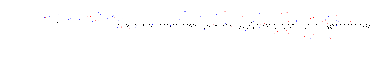

In [757]:
plt.figure(figsize=(12,8))
plot_tree(xgb_clf)
plt.show()

In [753]:
import os
os.environ["PATH"] += os.pathsep + 'D:/GraphViz/release/bin'